# Importamos Librerias y Datasets

In [ ]:
import pandas as pd
import numpy as np
import sklearn as skl



# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [3]:
path = '/content/weekly_data_for_python.csv'
path_events = '/content/daily_calendar_with_expanded_events.csv'

In [5]:
df = pd.read_csv(path)
df_events = pd.read_csv(path_events)

In [10]:
df_calendar = df_events.groupby('yearweek').agg({'date': 'min'}).reset_index()

In [6]:
#(6721786, 11)
df.shape

(6721786, 11)

In [8]:
df_events.shape

(1913, 8)

In [11]:
df_calendar.shape

(279, 2)

In [44]:
df_calendar['Year'] = pd.to_datetime(df_calendar['date']).dt.year
df_calendar['Quarter'] = pd.to_datetime(df_calendar['date']).dt.quarter

In [ ]:
df.head()

item store_code  category_x    department        region  \
0  ACCESORIES_1_004      BOS_1  ACCESORIES  ACCESORIES_1        Boston   
1  ACCESORIES_1_004      BOS_2  ACCESORIES  ACCESORIES_1        Boston   
2  ACCESORIES_1_004      NYC_2  ACCESORIES  ACCESORIES_1      New York   
3  ACCESORIES_1_004      NYC_4  ACCESORIES  ACCESORIES_1      New York   
4  ACCESORIES_1_004      PHI_1  ACCESORIES  ACCESORIES_1  Philadelphia   

             store  yearweek  sale  daily_revenue  sell_price  week_number  
0        South_End  201105.0    10        57.7220      5.7722          1.0  
1          Roxbury  201105.0    15        86.5830      5.7722          1.0  
2           Harlem  201105.0    33       190.4826      5.7722          1.0  
3         Brooklyn  201105.0     8        46.1776      5.7722          1.0  
4  Midtown_Village  201105.0     6        34.6332      5.7722          1.0

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6721786 entries, 0 to 6721785
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   item           object 
 1   store_code     object 
 2   category_x     object 
 3   department     object 
 4   region         object 
 5   store          object 
 6   yearweek       float64
 7   sale           int64  
 8   daily_revenue  float64
 9   sell_price     float64
 10  week_number    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 564.1+ MB


In [ ]:
df_events.head()

date    weekday  weekday_int    d event  yearweek Event_Name  \
0  2011-01-29   Saturday            1  d_1   NaN  201105.0   No Event   
1  2011-01-30     Sunday            2  d_2   NaN  201105.0   No Event   
2  2011-01-31     Monday            3  d_3   NaN  201105.0   No Event   
3  2011-02-01    Tuesday            4  d_4   NaN  201105.0   No Event   
4  2011-02-02  Wednesday            5  d_5   NaN  201105.0   No Event   

  Weekly_Event  
0     No Event  
1     No Event  
2     No Event  
3     No Event  
4     No Event

In [19]:
df.columns

Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'daily_revenue', 'sell_price', 'week_number'],
      dtype='object')

In [20]:
df_events.columns

Index(['date', 'weekday', 'weekday_int', 'd', 'event', 'yearweek',
       'Event_Name', 'Weekly_Event'],
      dtype='object')

In [21]:
df_events['Event_Name'].unique()

array(['No Event', 'Superbowl', "Valentine's Day", "Presidents' Day",
       "Patriots' Day (Boston)", 'Easter Sunday', 'Fleet Week NYC',
       'Memorial Day', 'Independence Day', 'Ramadam Start',
       'Hurricane Irene', 'Labor Day', 'NYC Marathon', 'Thanksgiving',
       'Black Friday', 'Cyber Monday', 'Christmas', "New Year's Day",
       'MLK Day', 'Memorial Day, Fleet Week NYC', 'Hurricane Sandy',
       "Patriots' Day (Boston), Boston Marathon Bombing",
       'Boston Marathon Bombing', 'Blizzard of 2015',
       'Papal Visit (Philly Lockdown)', 'Blizzard of 2016'], dtype=object)

In [22]:
df_events[df_events['Event_Name'] == 'Christmas']

date    weekday  weekday_int       d      event  yearweek  \
330   2011-12-25     Sunday            2   d_331  Christmas  201152.0   
696   2012-12-25    Tuesday            4   d_697  Christmas  201252.0   
1061  2013-12-25  Wednesday            5  d_1062  Christmas  201351.0   
1426  2014-12-25   Thursday            6  d_1427  Christmas  201451.0   
1791  2015-12-25     Friday            7  d_1792  Christmas  201551.0   

     Event_Name Weekly_Event  
330   Christmas    Christmas  
696   Christmas    Christmas  
1061  Christmas    Christmas  
1426  Christmas    Christmas  
1791  Christmas    Christmas

## TO DO: Propagar ramadam a 30 dias (Fecha Fin), tratar patriot's day y boombing, segmentar eventos: festivos (revisar vacaciones en USA), locales y climaticos

In [ ]:

#propagamos Ramadam en 4 registros (4 semanas)

df_events_ramadam = df_events[df_events['Event_Name'] == 'Ramadam Start']




In [ ]:
df_events[df_events['event'] == 'Ramadan starts']

date   weekday  weekday_int       d           event  yearweek  \
184   2011-08-01    Monday            3   d_185  Ramadan starts  201131.0   
538   2012-07-20    Friday            7   d_539  Ramadan starts  201229.0   
892   2013-07-09   Tuesday            4   d_893  Ramadan starts  201327.0   
1247  2014-06-29    Sunday            2  d_1248  Ramadan starts  201426.0   
1601  2015-06-18  Thursday            6  d_1602  Ramadan starts  201524.0   

         Event_Name                     Weekly_Event  
184   Ramadam Start                    Ramadam Start  
538   Ramadam Start                    Ramadam Start  
892   Ramadam Start                    Ramadam Start  
1247       No Event  Ramadam Start, Independence Day  
1601  Ramadam Start                    Ramadam Start

In [ ]:
df['department'].unique()

array(['ACCESORIES_1', 'ACCESORIES_2', 'HOME_&_GARDEN_1',
       'HOME_&_GARDEN_2', 'SUPERMARKET_1', 'SUPERMARKET_2',
       'SUPERMARKET_3'], dtype=object)

## Features para clustering

In [23]:
# shape = (articulos, features)

In [24]:
# Posibles Features

# Precio
  # Precio                                 * # Precio medio
  # Variabilidad general                   * # DESVIO_STANDAR/PROM
  # Variabilidad asociada a eventos         # PRECIO_PROM_DIAS_FESTIVOS/PRECIO_PROM_DIAS_NO_FESTIVOS
  # Clasificacion ABC Global                # ABC ITEM // PRECIO_ITEM / PRECIO_PROM_GENERAL
  # Clasificacion ABC por categoria         # ABC ITEM EN SU CATEGORY // PRECIO_ITEM / PRECIO_PROM_CATEGORY
  # Clasificacion ABC por department        # ABC ITEM EN SU DEPARTMENT // PRECIO_ITEM / PRECIO_PROM_DEPARTMENT [precio_relativo_al_departamento]

  # Elasticidad de precio                   # ln(Q) = B0 + B1*ln(P) + sum(Bn * OHEfn)

# Ventas
  # Cantidad                                                           * # Cantidad ventas promedio
  # Estables / Erraticos                                               * # DESVIO_STANDAR/PROM
  # Estacionalidad de año por item                                     * # Periodo Qmax - periodo Qmin

  # Ventas conjuntas                                                   * #  integrantes de cluster

  # Estacionalidad de año por categoria
  # Estacionalidad de año por departamento

  # Ventas relacionadas a fechas de eventos festivos por item           # PROM_DIARIO_FESTIVO/PROM_DIARIO_NO_FESTIVO

  # Ventas relacionadas a fechas de eventos festivos por categoria
  # Ventas relacionadas a fechas de eventos festivos por departamento

  # Ventas regionales                  * NY/TOT, BOS/TOT, PHI/TOT   [# Region Qmax - Region Qmin]

  # Ventas por eventos regionales

  # Ventas por incidencias climaticas         PROM_DIARIO_EVENTOS_CLIMATICOS/PROM_DIARIO_NO_FESTIVO

# Presencia de producto
    # Antiguedad de producto        ** #release_week
    # Presencia en tiendas           * #total_supply


# Preparamos las features

## Data set items

In [303]:
df.columns



Index(['item', 'store_code', 'category_x', 'department', 'region', 'store',
       'yearweek', 'sale', 'daily_revenue', 'sell_price', 'week_number'],
      dtype='object')

In [ ]:
df_items = (
    df.groupby('item')
.agg({'sell_price': ['mean','std'], 'sale': ['mean', 'std'], 'store': 'count','week_number': 'min' })
#.rename(columns={'mean': 'price_mean', 'std': 'price_std', 'mean': 'revenue_mean'})
.reset_index()
.set_axis(['item', 'price_mean', 'price_std', 'sale_mean', 'sale_std', 'store_count', 'week_number'], axis=1)
)


In [ ]:
df_items.head()

In [ ]:
df_items['price_relative_std'] = df_items['price_std'] / df_items['price_mean']

df_items['sale_relative_std'] = df_items['sale_std'] / df_items['sale_mean']

## Analisis de correlacion

In [96]:
#df_historial_sales = (


df_historial_sales = (

  df.pivot_table(index='item', columns='week_number', values='daily_revenue', aggfunc='sum')
  .dropna()
  .transpose()
#  .reset_index()


)

<Axes: xlabel='item', ylabel='item'>

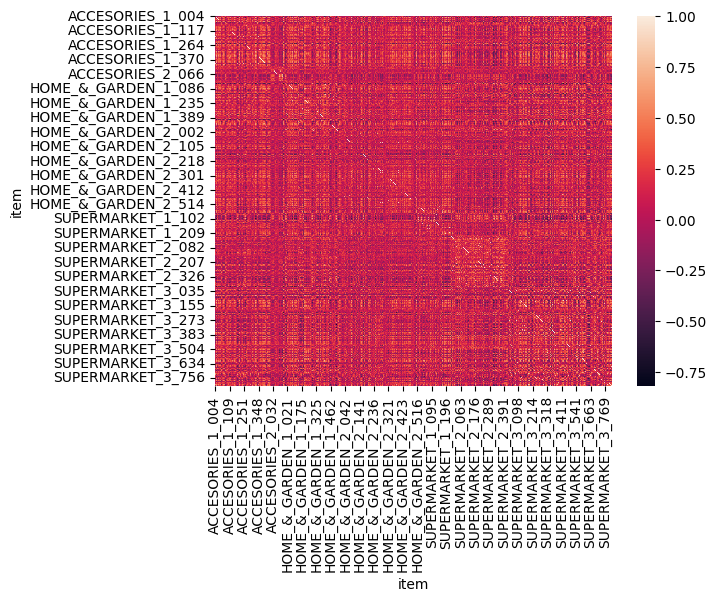

In [97]:
import seaborn as sns
#aplicamos heatmap de matriz de correlacion

sns.heatmap(df_historial_sales.corr())

In [182]:
corr_matrix_historial_sales = df_historial_sales.corr()

In [144]:
# 1457 filas, 2122849 registros

corr_matrix_historial_sales.shape

(1457, 1457)

In [145]:
#fijamos a na la diagonal inferior
for i in range(corr_matrix_historial_sales.shape[0]):
  for j in range(i):
    corr_matrix_historial_sales.iloc[i, j] = np.nan

In [183]:
#pasamos a data frame con formato (art_1, art_2, corr)
df_matrix_historial_sales = corr_matrix_historial_sales.stack()
df_matrix_historial_sales.index.names = ['item_1', 'item_2']
df_matrix_historial_sales = df_matrix_historial_sales.reset_index()
df_matrix_historial_sales.rename(columns={0: 'corr'}, inplace=True)


In [147]:
df_matrix_historial_sales

item_1             item_2      corr
0         ACCESORIES_1_004   ACCESORIES_1_004  1.000000
1         ACCESORIES_1_004   ACCESORIES_1_008  0.166780
2         ACCESORIES_1_004   ACCESORIES_1_009  0.037860
3         ACCESORIES_1_004   ACCESORIES_1_010  0.083446
4         ACCESORIES_1_004   ACCESORIES_1_012 -0.186870
...                    ...                ...       ...
1062148  SUPERMARKET_3_823  SUPERMARKET_3_824 -0.264823
1062149  SUPERMARKET_3_823  SUPERMARKET_3_825  0.038882
1062150  SUPERMARKET_3_824  SUPERMARKET_3_824  1.000000
1062151  SUPERMARKET_3_824  SUPERMARKET_3_825 -0.128118
1062152  SUPERMARKET_3_825  SUPERMARKET_3_825  1.000000

[1062153 rows x 3 columns]

In [184]:
df_matrix_historial_sales = df_matrix_historial_sales[df_matrix_historial_sales['item_1'] != df_matrix_historial_sales['item_2']]

In [185]:
df_matrix_historial_sales.sort_values(by='corr', ascending=False)

item_1             item_2      corr
1909877    SUPERMARKET_3_501  SUPERMARKET_3_295  0.981192
1759909    SUPERMARKET_3_295  SUPERMARKET_3_501  0.981192
1736626    SUPERMARKET_3_263  SUPERMARKET_3_572  0.979120
1952114    SUPERMARKET_3_572  SUPERMARKET_3_263  0.979120
1901034    SUPERMARKET_3_491  SUPERMARKET_3_090  0.975845
...                      ...                ...       ...
649579   HOME_&_GARDEN_1_512  SUPERMARKET_3_305 -0.774712
1161185    SUPERMARKET_1_096  SUPERMARKET_3_732 -0.804581
2059537    SUPERMARKET_3_732  SUPERMARKET_1_096 -0.804581
164597      ACCESORIES_1_261  SUPERMARKET_3_732 -0.819267
2058853    SUPERMARKET_3_732   ACCESORIES_1_261 -0.819267

[2121392 rows x 3 columns]

In [155]:
df_matrix_historial_sales['category_1'] = df_matrix_historial_sales['item_1'].apply(lambda x: x.split('_')[0])
df_matrix_historial_sales['department_1'] = df_matrix_historial_sales['item_1'].apply(lambda x: x.split('_')[1])
df_matrix_historial_sales['article_1'] = df_matrix_historial_sales['item_1'].apply(lambda x: x.split('_')[2])



/tmp/ipython-input-763570614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_historial_sales['category_1'] = df_matrix_historial_sales['item_1'].apply(lambda x: x.split('_')[0])
/tmp/ipython-input-763570614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_historial_sales['department_1'] = df_matrix_historial_sales['item_1'].apply(lambda x: x.split('_')[1])
/tmp/ipython-input-763570614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [167]:
df_matrix_historial_sales['category_2'] = df_matrix_historial_sales['item_2'].apply(lambda x: x.split('_')[0])
df_matrix_historial_sales['department_2'] = df_matrix_historial_sales['item_2'].apply(lambda x: x.split('_')[1])
df_matrix_historial_sales['article_2'] = df_matrix_historial_sales['item_2'].apply(lambda x: x.split('_')[2])


/tmp/ipython-input-3640960135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_historial_sales['category_2'] = df_matrix_historial_sales['item_2'].apply(lambda x: x.split('_')[0])
/tmp/ipython-input-3640960135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_historial_sales['department_2'] = df_matrix_historial_sales['item_2'].apply(lambda x: x.split('_')[1])
/tmp/ipython-input-3640960135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [168]:
df_matrix_historial_sales

item_1             item_2      corr   category_1  \
1         ACCESORIES_1_004   ACCESORIES_1_008  0.166780   ACCESORIES   
2         ACCESORIES_1_004   ACCESORIES_1_009  0.037860   ACCESORIES   
3         ACCESORIES_1_004   ACCESORIES_1_010  0.083446   ACCESORIES   
4         ACCESORIES_1_004   ACCESORIES_1_012 -0.186870   ACCESORIES   
5         ACCESORIES_1_004   ACCESORIES_1_015  0.284478   ACCESORIES   
...                    ...                ...       ...          ...   
1062145  SUPERMARKET_3_822  SUPERMARKET_3_824  0.021551  SUPERMARKET   
1062146  SUPERMARKET_3_822  SUPERMARKET_3_825 -0.268492  SUPERMARKET   
1062148  SUPERMARKET_3_823  SUPERMARKET_3_824 -0.264823  SUPERMARKET   
1062149  SUPERMARKET_3_823  SUPERMARKET_3_825  0.038882  SUPERMARKET   
1062151  SUPERMARKET_3_824  SUPERMARKET_3_825 -0.128118  SUPERMARKET   

        department_1 article_1   category_2 department_2 article_2  
1                  1       004   ACCESORIES            1       008  
2                  1       004   ACCESORIES            1       009  
3                  1       004   ACCESORIES            1       010  
4                  1       004   ACCESORIES            1       012  
5                  1       004   ACCESORIES            1       015  
...              ...       ...          ...          ...       ...  
1062145            3       822  SUPERMARKET            3       824  
1062146            3       822  SUPERMARKET            3       825  
1062148            3       823  SUPERMARKET            3       824  
1062149            3       823  SUPERMARKET            3       825  
1062151            3       824  SUPERMARKET            3       825  

[1060696 rows x 9 columns]

In [173]:
df_matrix_historial_sales.pivot_table(index=['category_1', 'department_1'], columns=['category_2', 'department_2'], values='corr', aggfunc='mean')

category_2               ACCESORIES                HOME SUPERMARKET            \
department_2                      1         2         &           1         2   
category_1  department_1                                                        
ACCESORIES  1              0.156941  0.072688  0.127155    0.118036  0.071236   
            2                   NaN  0.166147  0.067370    0.087793  0.068262   
HOME        &                   NaN       NaN  0.115044    0.108574  0.071059   
SUPERMARKET 1                   NaN       NaN       NaN    0.144541  0.092658   
            2                   NaN       NaN       NaN         NaN  0.173298   
            3                   NaN       NaN       NaN         NaN       NaN   

category_2                          
department_2                     3  
category_1  department_1            
ACCESORIES  1             0.117284  
            2             0.062853  
HOME        &             0.107181  
SUPERMARKET 1             0.108213  
            2             0.087131  
            3             0.130384

In [174]:
df_matrix_historial_sales.pivot_table(index=['category_1', 'department_1'], columns=['category_2', 'department_2'], values='corr', aggfunc='min')

category_2               ACCESORIES                HOME SUPERMARKET            \
department_2                      1         2         &           1         2   
category_1  department_1                                                        
ACCESORIES  1             -0.730331 -0.624950 -0.724898   -0.650483 -0.697579   
            2                   NaN -0.463502 -0.683885   -0.596334 -0.601338   
HOME        &                   NaN       NaN -0.739163   -0.702010 -0.700487   
SUPERMARKET 1                   NaN       NaN       NaN   -0.496282 -0.581190   
            2                   NaN       NaN       NaN         NaN -0.482605   
            3                   NaN       NaN       NaN         NaN       NaN   

category_2                          
department_2                     3  
category_1  department_1            
ACCESORIES  1            -0.819267  
            2            -0.603302  
HOME        &            -0.774712  
SUPERMARKET 1            -0.804581  
            2            -0.769102  
            3            -0.700676

In [175]:
df_matrix_historial_sales.pivot_table(index=['category_1', 'department_1'], columns=['category_2', 'department_2'], values='corr', aggfunc='max')

category_2               ACCESORIES                HOME SUPERMARKET            \
department_2                      1         2         &           1         2   
category_1  department_1                                                        
ACCESORIES  1              0.941596  0.717755  0.807966    0.854167  0.830444   
            2                   NaN  0.805184  0.772900    0.683818  0.696260   
HOME        &                   NaN       NaN  0.931763    0.788553  0.766873   
SUPERMARKET 1                   NaN       NaN       NaN    0.952418  0.853033   
            2                   NaN       NaN       NaN         NaN  0.967353   
            3                   NaN       NaN       NaN         NaN       NaN   

category_2                          
department_2                     3  
category_1  department_1            
ACCESORIES  1             0.811169  
            2             0.751986  
HOME        &             0.795478  
SUPERMARKET 1             0.796945  
            2             0.772043  
            3             0.981192

In [189]:
df_matrix_historial_sales.groupby('item_1').agg({'corr':['mean','min','max']}).reset_index().sort_values(by=('corr', 'max'), ascending=False).head(50)

item_1      corr                    
                             mean       min       max
1310  SUPERMARKET_3_501  0.101480 -0.384123  0.981192
1207  SUPERMARKET_3_295  0.096451 -0.408158  0.981192
1191  SUPERMARKET_3_263  0.076654 -0.529190  0.979120
1339  SUPERMARKET_3_572  0.065025 -0.542648  0.979120
1106  SUPERMARKET_3_090  0.059093 -0.501626  0.975845
1304  SUPERMARKET_3_491  0.066588 -0.541438  0.975845
1416  SUPERMARKET_3_738  0.068387 -0.540012  0.971215
1424  SUPERMARKET_3_755  0.118425 -0.550653  0.968951
1236  SUPERMARKET_3_351  0.113174 -0.543666  0.968951
1325  SUPERMARKET_3_541  0.089952 -0.626142  0.968296
1369  SUPERMARKET_3_635  0.088578 -0.619994  0.968296
949   SUPERMARKET_2_166  0.115058 -0.503451  0.967353
985   SUPERMARKET_2_240  0.103621 -0.503745  0.967353
1418  SUPERMARKET_3_742  0.056259 -0.498195  0.966690
1202  SUPERMARKET_3_285  0.054017 -0.498777  0.966690
1277  SUPERMARKET_3_432  0.023008 -0.390308  0.966174
1453  SUPERMARKET_3_822  0.016077 -0.430688  0.966174
1350  SUPERMARKET_3_590  0.090841 -0.382623  0.964913
1372  SUPERMARKET_3_646  0.097972 -0.390763  0.964913
1268  SUPERMARKET_3_406  0.090748 -0.416871  0.964911
1196  SUPERMARKET_3_271  0.057748 -0.485370  0.963704
1199  SUPERMARKET_3_276  0.053973 -0.501879  0.963704
1165  SUPERMARKET_3_213  0.085921 -0.594290  0.963461
1241  SUPERMARKET_3_360  0.092005 -0.599446  0.963461
1186  SUPERMARKET_3_249  0.088626 -0.403542  0.962149
1426  SUPERMARKET_3_757  0.079063 -0.393474  0.960384
1256  SUPERMARKET_3_387  0.075976 -0.374406  0.954919
1238  SUPERMARKET_3_355  0.110825 -0.493157  0.954162
782   SUPERMARKET_1_074  0.072374 -0.372939  0.952418
764   SUPERMARKET_1_041  0.082530 -0.354355  0.952418
1129  SUPERMARKET_3_136  0.117820 -0.233720  0.952212
1159  SUPERMARKET_3_202  0.098382 -0.244963  0.952212
1201  SUPERMARKET_3_281  0.038945 -0.494214  0.951293
1431  SUPERMARKET_3_769  0.053255 -0.482691  0.951293
927   SUPERMARKET_2_128  0.142642 -0.500876  0.951127
873   SUPERMARKET_2_021  0.146900 -0.533480  0.951127
1170  SUPERMARKET_3_224  0.034357 -0.455413  0.949795
1122  SUPERMARKET_3_118  0.144227 -0.638191  0.948762
1120  SUPERMARKET_3_116  0.148466 -0.668984  0.948762
832   SUPERMARKET_1_166  0.132192 -0.423866  0.948369
851   SUPERMARKET_1_201  0.126437 -0.431902  0.948369
1198  SUPERMARKET_3_274  0.068154 -0.523128  0.948318
1247  SUPERMARKET_3_373  0.085697 -0.404701  0.947410
1288  SUPERMARKET_3_465  0.085188 -0.446562  0.947410
1219  SUPERMARKET_3_318  0.078375 -0.372409  0.946317
1169  SUPERMARKET_3_219  0.087253 -0.425759  0.946317
1448  SUPERMARKET_3_808  0.078602 -0.553925  0.945847
1378  SUPERMARKET_3_663  0.079952 -0.404916  0.943909
1292  SUPERMARKET_3_470  0.074244 -0.425381  0.943909
1406  SUPERMARKET_3_718  0.077823 -0.428614  0.943851

In [207]:
df_matrix_historial_sales[df_matrix_historial_sales['item_1'] == 'SUPERMARKET_3_655'].sort_values(by='corr', ascending=False)

item_1               item_2      corr
2004826  SUPERMARKET_3_655    SUPERMARKET_3_819  0.934100
2004446  SUPERMARKET_3_655    SUPERMARKET_3_014  0.922460
2004537  SUPERMARKET_3_655    SUPERMARKET_3_207  0.913676
2004489  SUPERMARKET_3_655    SUPERMARKET_3_102  0.913483
2004515  SUPERMARKET_3_655    SUPERMARKET_3_155  0.911579
...                    ...                  ...       ...
2003679  SUPERMARKET_3_655  HOME_&_GARDEN_1_127 -0.567585
2004299  SUPERMARKET_3_655    SUPERMARKET_2_119 -0.570845
2004288  SUPERMARKET_3_655    SUPERMARKET_2_086 -0.595353
2003639  SUPERMARKET_3_655  HOME_&_GARDEN_1_018 -0.602731
2003444  SUPERMARKET_3_655     ACCESORIES_1_147 -0.609474

[1456 rows x 3 columns]

In [ ]:
#Generamos clustering basado en similitud de correlacion de items


In [199]:
df_matrix_historial_sales[df_matrix_historial_sales['item_1'] == 'SUPERMARKET_1_041'].sort_values(by='corr', ascending=False)

item_1               item_2      corr
1113930  SUPERMARKET_1_041    SUPERMARKET_1_074  0.952418
1113974  SUPERMARKET_1_041    SUPERMARKET_1_146  0.934818
1113995  SUPERMARKET_1_041    SUPERMARKET_1_195  0.932229
1114156  SUPERMARKET_1_041    SUPERMARKET_2_291  0.449453
1113406  SUPERMARKET_1_041  HOME_&_GARDEN_1_004  0.447001
...                    ...                  ...       ...
1113213  SUPERMARKET_1_041     ACCESORIES_1_143 -0.318579
1113422  SUPERMARKET_1_041  HOME_&_GARDEN_1_048 -0.325800
1113507  SUPERMARKET_1_041  HOME_&_GARDEN_1_297 -0.326146
1113233  SUPERMARKET_1_041     ACCESORIES_1_194 -0.351144
1113960  SUPERMARKET_1_041    SUPERMARKET_1_127 -0.354355

[1456 rows x 3 columns]

In [200]:
df_matrix_historial_sales[df_matrix_historial_sales['item_1'] == 'SUPERMARKET_1_146'].sort_values(by='corr', ascending=False)

item_1               item_2      corr
1204246  SUPERMARKET_1_146    SUPERMARKET_1_041  0.934818
1204264  SUPERMARKET_1_146    SUPERMARKET_1_074  0.926836
1204329  SUPERMARKET_1_146    SUPERMARKET_1_195  0.924701
1204421  SUPERMARKET_1_146    SUPERMARKET_2_149  0.471160
1203740  SUPERMARKET_1_146  HOME_&_GARDEN_1_004  0.459290
...                    ...                  ...       ...
1203547  SUPERMARKET_1_146     ACCESORIES_1_143 -0.315468
1203841  SUPERMARKET_1_146  HOME_&_GARDEN_1_297 -0.318063
1204263  SUPERMARKET_1_146    SUPERMARKET_1_073 -0.318393
1203756  SUPERMARKET_1_146  HOME_&_GARDEN_1_048 -0.333769
1204294  SUPERMARKET_1_146    SUPERMARKET_1_127 -0.381037

[1456 rows x 3 columns]

In [201]:
df_matrix_historial_sales[df_matrix_historial_sales['item_1'] == 'SUPERMARKET_1_195'].sort_values(by='corr', ascending=False)

item_1               item_2      corr
1234843  SUPERMARKET_1_195    SUPERMARKET_1_041  0.932229
1234861  SUPERMARKET_1_195    SUPERMARKET_1_074  0.930470
1234905  SUPERMARKET_1_195    SUPERMARKET_1_146  0.924701
1235087  SUPERMARKET_1_195    SUPERMARKET_2_291  0.466941
1234848  SUPERMARKET_1_195    SUPERMARKET_1_049  0.440892
...                    ...                  ...       ...
1234164  SUPERMARKET_1_195     ACCESORIES_1_194 -0.326052
1234860  SUPERMARKET_1_195    SUPERMARKET_1_073 -0.334271
1234444  SUPERMARKET_1_195  HOME_&_GARDEN_1_313 -0.345740
1234353  SUPERMARKET_1_195  HOME_&_GARDEN_1_048 -0.350334
1234891  SUPERMARKET_1_195    SUPERMARKET_1_127 -0.385692

[1456 rows x 3 columns]

In [212]:
import networkx as nx

# 1. Filtramos primero tu DF original
# Solo nos quedamos con las relaciones fuertes que te interesan
df_filtrado = df_matrix_historial_sales[df_matrix_historial_sales['corr'] > 0.8]

# 2. Crear el Grafo
G = nx.from_pandas_edgelist(df_filtrado, 'item_1', 'item_2')

# 3. Encontrar "Componentes Conectados" (tus clusters)
# Esto busca islas de productos conectados entre sí
componentes = list(nx.connected_components(G))

# 4. Convertir a un formato legible
cluster_list = []
for i, nodes in enumerate(componentes):
    for node in nodes:
        cluster_list.append({'Item': node, 'Cluster_ID': i})

df_clusters_grafo = pd.DataFrame(cluster_list)

# 5. Identificar items "Solitarios" (Outliers)
# Los items que no están en df_clusters_grafo son los que no tenían ninguna corr > 0.9
all_items = set(df_matrix_historial_sales['item_1'].unique())
clustered_items = set(df_clusters_grafo['Item'].unique())
outliers = all_items - clustered_items

print(f"Items agrupados: {len(clustered_items)}")
print(f"Items sin grupo fuerte: {len(outliers)}")
print(df_clusters_grafo.head())

Items agrupados: 417
Items sin grupo fuerte: 1040
               Item  Cluster_ID
0  ACCESORIES_1_371           0
1  ACCESORIES_1_008           0
2  ACCESORIES_1_244           0
3  ACCESORIES_1_341           0
4  ACCESORIES_1_295           0


In [213]:
df_clusters_grafo

Item  Cluster_ID
0     ACCESORIES_1_371           0
1     ACCESORIES_1_008           0
2     ACCESORIES_1_244           0
3     ACCESORIES_1_341           0
4     ACCESORIES_1_295           0
..                 ...         ...
412  SUPERMARKET_3_729         112
413  SUPERMARKET_3_594         113
414  SUPERMARKET_3_614         113
415  SUPERMARKET_3_628         114
416  SUPERMARKET_3_634         114

[417 rows x 2 columns]

In [221]:
df_clusters_grafo['Cluster_ID'].max()

114

array([[<Axes: title={'center': 'Item'}>]], dtype=object)

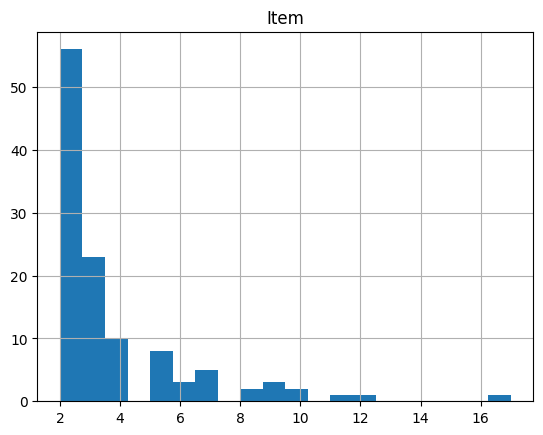

In [223]:
df_clusters_grafo.groupby('Cluster_ID').agg({'Item': 'count'}).hist(bins=20)

In [214]:
df_clusters_grafo.shape

(417, 2)

In [216]:
df_clusters_grafo.groupby('Cluster_ID').agg({'Item': 'count'}).sort_values(by='Item', ascending=False)

Item
Cluster_ID      
64            17
70            12
0             11
3             10
42            10
...          ...
107            2
110            2
111            2
113            2
114            2

[115 rows x 1 columns]

In [238]:
df_clusters_grafo_size = df_clusters_grafo.groupby('Cluster_ID').agg({'Item': 'count'}).sort_values(by='Item', ascending=False).reset_index().rename(columns={'Item': 'size'})

In [240]:
df_clusters_grafo = df_clusters_grafo.merge(df_clusters_grafo_size, on='Cluster_ID', how='left')

In [244]:
df_clusters_grafo.rename(columns={'Item': 'item'}, inplace=True)

In [251]:
df_items = df_items.merge(df_clusters_grafo, on='item', how='left')

In [253]:
df_items.loc[~df_items['size'].isnull(), 'Sociability'] = df_items['size']

In [254]:
df_items.loc[df_items['item'].isin(outliers), 'Sociability'] = 1

In [255]:
df_items['Sociability'].fillna(0, inplace=True)

/tmp/ipython-input-3621370016.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_items['Sociability'].fillna(0, inplace=True)


In [260]:
df_items.drop(columns=['size', 'Cluster_ID'], inplace=True)

In [261]:
df_items

item  price_mean  price_std  sale_mean   sale_std  \
0      ACCESORIES_1_001   11.032755   0.223408   2.769283   2.375445   
1      ACCESORIES_1_002    5.275708   0.104185   1.881369   2.244799   
2      ACCESORIES_1_003    3.944125   0.198990   1.266549   1.624542   
3      ACCESORIES_1_004    5.983299   0.273154  14.152818  13.022962   
4      ACCESORIES_1_005    3.832119   0.228278   5.559316   5.210088   
...                 ...         ...        ...        ...        ...   
3044  SUPERMARKET_3_823    3.344609   0.228907   5.767616   9.765913   
3045  SUPERMARKET_3_824    3.026692   0.255940   2.983871   3.609093   
3046  SUPERMARKET_3_825    4.934385   0.241628   4.853247   5.543762   
3047  SUPERMARKET_3_826    1.535790   0.008397   7.612742   5.736065   
3048  SUPERMARKET_3_827    1.199395   0.019060  11.480323  15.125381   

      total_supply  release_week  price_relative_std  sale_relative_std  \
0             1478           131            0.020250           0.857783   
1             2689             6            0.019748           1.193173   
2             1133           161            0.050452           1.282652   
3             2768             1            0.045653           0.920167   
4             2630            14            0.059570           0.937182   
...            ...           ...                 ...                ...   
3044          2668             1            0.068441           1.693232   
3045          2790             1            0.084561           1.209534   
3046          2787             1            0.048968           1.142279   
3047          1601           116            0.005468           0.753482   
3048           991           165            0.015891           1.317505   

      cluster  Sociability  
0           0            0  
1           5            0  
2           0            0  
3           1            1  
4           1            0  
...       ...          ...  
3044        6            1  
3045        5            9  
3046        5           17  
3047        0            0  
3048        0            0  

[3049 rows x 11 columns]

### Variables agregacion del df original

In [31]:
df_items.rename(columns={'store_count': 'total_supply', 'week_number': 'release_week'}, inplace=True)

In [262]:
df_items.columns

Index(['item', 'price_mean', 'price_std', 'sale_mean', 'sale_std',
       'total_supply', 'release_week', 'price_relative_std',
       'sale_relative_std', 'cluster', 'Sociability'],
      dtype='object')

#### Visualizamos features generadas

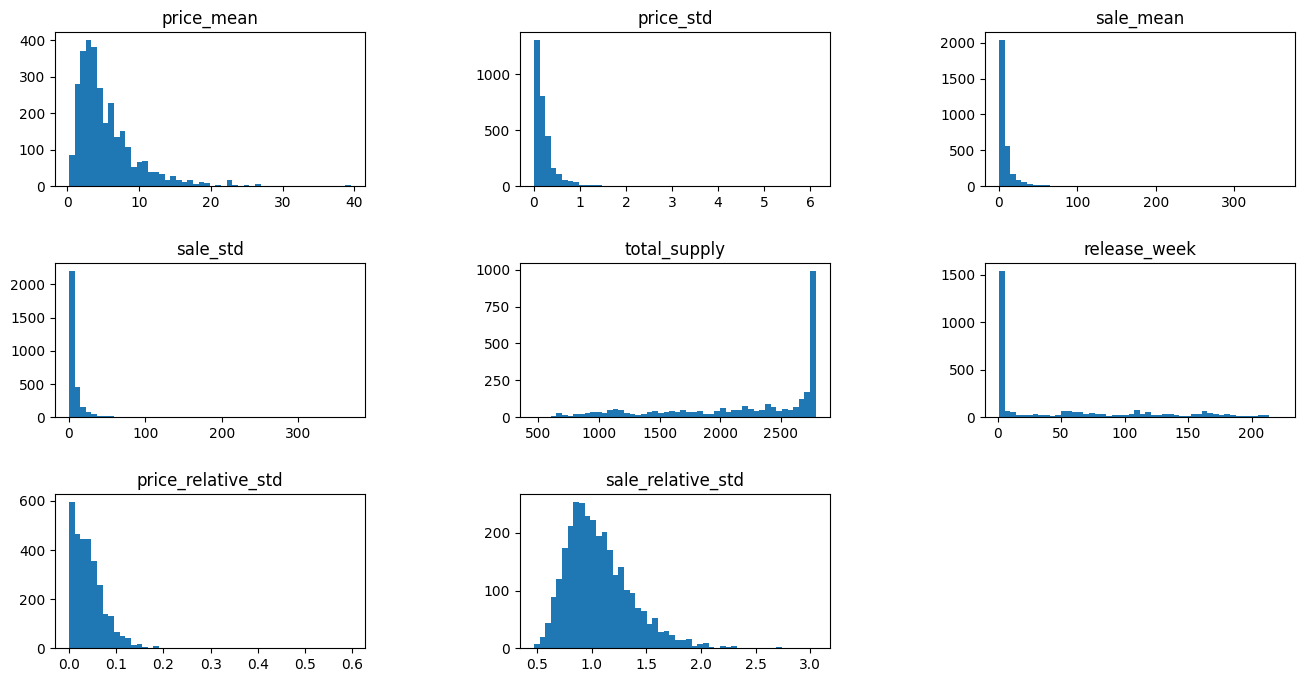

In [33]:
## Graficamos los histogramas de las columnas de tipo no object

fig = plt.figure(figsize= (16,8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

j = 0
for i in df_items.columns:
  if df_items[i].dtype != 'object':
    j += 1
    fig.add_subplot(3, 3, j)
    plt.hist(df_items[i], bins = 50)
    plt.title(i)

### Variables df anchos, pivot tables

In [34]:
df_region_sales = (
    df
 .pivot_table(index='item', columns='region', values='daily_revenue', aggfunc='sum')
)
df_region_sales['New York'] *= 0.75 #Normalizamos por cantidad de stores
df_region_sales_normalized = df_region_sales.div(df_region_sales.sum(axis=1), axis=0)
df_region_sales_normalized = df_region_sales_normalized.reset_index()

In [35]:
df_region_sales_normalized

region               item    Boston  New York  Philadelphia
0        ACCESORIES_1_001  0.302943  0.548978      0.148079
1        ACCESORIES_1_002  0.188383  0.256821      0.554795
2        ACCESORIES_1_003  0.300438  0.438881      0.260681
3        ACCESORIES_1_004  0.286276  0.514809      0.198915
4        ACCESORIES_1_005  0.310560  0.450841      0.238599
...                   ...       ...       ...           ...
3044    SUPERMARKET_3_823  0.176659  0.602843      0.220499
3045    SUPERMARKET_3_824  0.221786  0.477101      0.301114
3046    SUPERMARKET_3_825  0.313512  0.386961      0.299527
3047    SUPERMARKET_3_826  0.281754  0.410520      0.307726
3048    SUPERMARKET_3_827  0.123644  0.386945      0.489411

[3049 rows x 4 columns]

In [36]:
df_region_sales_normalized['Regionality'] = df_region_sales_normalized[['Boston', 'New York', 'Philadelphia']].max(axis=1) - df_region_sales_normalized[['Boston', 'New York', 'Philadelphia']].min(axis=1)

In [37]:
df_region_sales_normalized

region               item    Boston  New York  Philadelphia  Regionality
0        ACCESORIES_1_001  0.302943  0.548978      0.148079     0.400899
1        ACCESORIES_1_002  0.188383  0.256821      0.554795     0.366412
2        ACCESORIES_1_003  0.300438  0.438881      0.260681     0.178200
3        ACCESORIES_1_004  0.286276  0.514809      0.198915     0.315894
4        ACCESORIES_1_005  0.310560  0.450841      0.238599     0.212243
...                   ...       ...       ...           ...          ...
3044    SUPERMARKET_3_823  0.176659  0.602843      0.220499     0.426184
3045    SUPERMARKET_3_824  0.221786  0.477101      0.301114     0.255315
3046    SUPERMARKET_3_825  0.313512  0.386961      0.299527     0.087434
3047    SUPERMARKET_3_826  0.281754  0.410520      0.307726     0.128765
3048    SUPERMARKET_3_827  0.123644  0.386945      0.489411     0.365767

[3049 rows x 5 columns]

In [64]:
df_region_sales_normalized.sort_values(by='Regionality', ascending=True)

region                 item    Boston  New York  Philadelphia  Regionality
1810      SUPERMARKET_1_202  0.335177  0.332375      0.332448     0.002801
69         ACCESORIES_1_072  0.338188  0.331496      0.330316     0.007872
1748      SUPERMARKET_1_139  0.329756  0.332293      0.337951     0.008194
1582    HOME_&_GARDEN_2_487  0.330647  0.330013      0.339340     0.009327
727     HOME_&_GARDEN_1_167  0.327386  0.336862      0.335751     0.009476
...                     ...       ...       ...           ...          ...
1812      SUPERMARKET_1_204  0.051521  0.132031      0.816448     0.764927
2224      SUPERMARKET_2_398  0.083406  0.066299      0.850295     0.783996
2035      SUPERMARKET_2_209  0.061047  0.042796      0.896157     0.853361
2082      SUPERMARKET_2_256  0.059187  0.038162      0.902651     0.864489
1943      SUPERMARKET_2_117  0.059824  0.034078      0.906098     0.872020

[3049 rows x 5 columns]

In [39]:
df_region_sales_normalized.sort_values(by='New York', ascending=True)

region                 item    Boston  New York  Philadelphia  Regionality
1943      SUPERMARKET_2_117  0.059824  0.034078      0.906098     0.872020
2082      SUPERMARKET_2_256  0.059187  0.038162      0.902651     0.864489
2035      SUPERMARKET_2_209  0.061047  0.042796      0.896157     0.853361
1706      SUPERMARKET_1_096  0.322386  0.043685      0.633929     0.590244
1859      SUPERMARKET_2_032  0.332510  0.053777      0.613713     0.559935
...                     ...       ...       ...           ...          ...
2366      SUPERMARKET_3_142  0.105559  0.697227      0.197214     0.591668
1248    HOME_&_GARDEN_2_152  0.185915  0.705621      0.108464     0.597157
764     HOME_&_GARDEN_1_204  0.204359  0.739339      0.056302     0.683037
2401      SUPERMARKET_3_177  0.145424  0.749984      0.104592     0.645392
2675      SUPERMARKET_3_451  0.157378  0.756201      0.086421     0.669780

[3049 rows x 5 columns]

<Axes: >

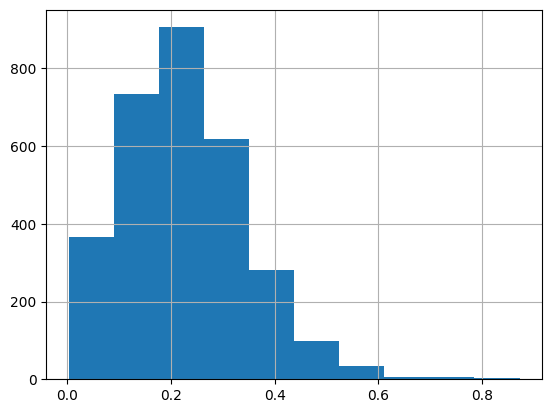

In [40]:
df_region_sales_normalized['Regionality'].hist()

In [51]:
df.head()

item store_code  category_x    department        region  \
0  ACCESORIES_1_004      BOS_1  ACCESORIES  ACCESORIES_1        Boston   
1  ACCESORIES_1_004      BOS_2  ACCESORIES  ACCESORIES_1        Boston   
2  ACCESORIES_1_004      NYC_2  ACCESORIES  ACCESORIES_1      New York   
3  ACCESORIES_1_004      NYC_4  ACCESORIES  ACCESORIES_1      New York   
4  ACCESORIES_1_004      PHI_1  ACCESORIES  ACCESORIES_1  Philadelphia   

             store  yearweek  sale  daily_revenue  sell_price  week_number  
0        South_End  201105.0    10        57.7220      5.7722            1  
1          Roxbury  201105.0    15        86.5830      5.7722            1  
2           Harlem  201105.0    33       190.4826      5.7722            1  
3         Brooklyn  201105.0     8        46.1776      5.7722            1  
4  Midtown_Village  201105.0     6        34.6332      5.7722            1

In [52]:
df_events.head()

date    weekday  weekday_int    d event  yearweek Event_Name  \
0  2011-01-29   Saturday            1  d_1   NaN  201105.0   No Event   
1  2011-01-30     Sunday            2  d_2   NaN  201105.0   No Event   
2  2011-01-31     Monday            3  d_3   NaN  201105.0   No Event   
3  2011-02-01    Tuesday            4  d_4   NaN  201105.0   No Event   
4  2011-02-02  Wednesday            5  d_5   NaN  201105.0   No Event   

  Weekly_Event  
0     No Event  
1     No Event  
2     No Event  
3     No Event  
4     No Event

In [41]:
df_calendar.columns

Index(['yearweek', 'date', 'Quarter'], dtype='object')

In [52]:
df_seasson_sales = df.merge(df_calendar[['yearweek','Year','Quarter']], on='yearweek', how='left')

In [53]:
df_seasson_sales.head()

item store_code  category_x    department        region  \
0  ACCESORIES_1_004      BOS_1  ACCESORIES  ACCESORIES_1        Boston   
1  ACCESORIES_1_004      BOS_2  ACCESORIES  ACCESORIES_1        Boston   
2  ACCESORIES_1_004      NYC_2  ACCESORIES  ACCESORIES_1      New York   
3  ACCESORIES_1_004      NYC_4  ACCESORIES  ACCESORIES_1      New York   
4  ACCESORIES_1_004      PHI_1  ACCESORIES  ACCESORIES_1  Philadelphia   

             store  yearweek  sale  daily_revenue  sell_price  week_number  \
0        South_End  201105.0    10        57.7220      5.7722            1   
1          Roxbury  201105.0    15        86.5830      5.7722            1   
2           Harlem  201105.0    33       190.4826      5.7722            1   
3         Brooklyn  201105.0     8        46.1776      5.7722            1   
4  Midtown_Village  201105.0     6        34.6332      5.7722            1   

   Year  Quarter  
0  2011        1  
1  2011        1  
2  2011        1  
3  2011        1  
4  2011        1

In [45]:
df_calendar['Year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016], dtype=int32)

In [57]:
df_seasson_sales = (
    df_seasson_sales
    [(df_seasson_sales['Year'] > 2011) & (df_seasson_sales['Year'] < 2016)]  #Retenemos años completos
 .pivot_table(index='item', columns='Quarter', values='daily_revenue', aggfunc='sum')
 .fillna(0)
)


In [58]:
df_seasson_sales_normalized = df_seasson_sales.div(df_seasson_sales.sum(axis=1), axis=0)
df_seasson_sales_normalized = df_seasson_sales_normalized.reset_index()

In [59]:
df_seasson_sales_normalized

Quarter               item         1         2         3         4
0         ACCESORIES_1_001  0.192323  0.195178  0.269890  0.342609
1         ACCESORIES_1_002  0.197202  0.217097  0.261050  0.324651
2         ACCESORIES_1_003  0.193798  0.240921  0.267175  0.298107
3         ACCESORIES_1_004  0.262926  0.252666  0.232330  0.252078
4         ACCESORIES_1_005  0.231958  0.211545  0.247695  0.308801
...                    ...       ...       ...       ...       ...
3044     SUPERMARKET_3_823  0.266627  0.156674  0.241350  0.335348
3045     SUPERMARKET_3_824  0.247879  0.337521  0.258779  0.155821
3046     SUPERMARKET_3_825  0.269116  0.233945  0.299630  0.197309
3047     SUPERMARKET_3_826  0.173373  0.314959  0.269672  0.241996
3048     SUPERMARKET_3_827  0.160313  0.258309  0.275660  0.305718

[3049 rows x 5 columns]

In [63]:
quarters = df_calendar['Quarter'].unique()
df_seasson_sales_normalized['Seasonality'] = df_seasson_sales_normalized[quarters].max(axis=1) - df_seasson_sales_normalized[quarters].min(axis=1)

In [68]:
df_seasson_sales_normalized.sort_values(by='Seasonality', ascending=True)

Quarter                 item         1         2         3         4  \
1270     HOME_&_GARDEN_2_174  0.249108  0.250297  0.250297  0.250297   
67          ACCESORIES_1_069  0.249041  0.250398  0.250051  0.250510   
2602       SUPERMARKET_3_378  0.252060  0.246911  0.250569  0.250459   
105         ACCESORIES_1_110  0.252029  0.251127  0.250676  0.246168   
269         ACCESORIES_1_277  0.252160  0.251012  0.250806  0.246022   
...                      ...       ...       ...       ...       ...   
2163       SUPERMARKET_2_337  0.321472  0.005867  0.597927  0.074735   
3017       SUPERMARKET_3_796  0.147886  0.000000  0.252373  0.599741   
2080       SUPERMARKET_2_254  0.301953  0.000988  0.612779  0.084279   
1904       SUPERMARKET_2_077  0.300245  0.006963  0.621273  0.071519   
1435     HOME_&_GARDEN_2_340  0.049525  0.655171  0.268267  0.027037   

Quarter  Seasonality  
1270        0.001189  
67          0.001469  
2602        0.005149  
105         0.005861  
269         0.006138  
...              ...  
2163        0.592060  
3017        0.599741  
2080        0.611791  
1904        0.614309  
1435        0.628134  

[3049 rows x 6 columns]

<Axes: >

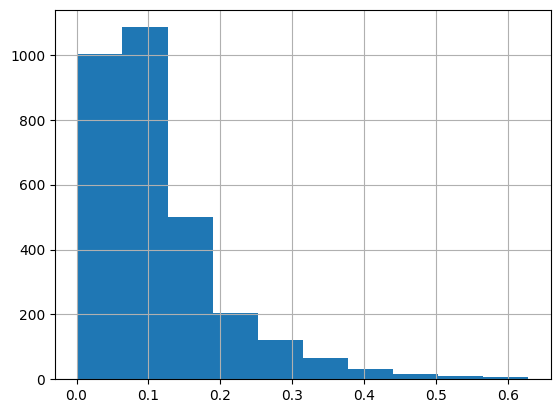

In [69]:
df_seasson_sales_normalized['Seasonality'].hist()

### Anexamos df, generamos df_cluster

In [263]:
df_cluster = df_items[['item', 'sale_mean', 'sale_relative_std', 'price_mean', 'price_relative_std', 'total_supply', 'Sociability']]

In [264]:
df_cluster = df_cluster.merge(df_region_sales_normalized[['item', 'Regionality']], on='item', how='left')

In [265]:
df_cluster = df_cluster.merge(df_seasson_sales_normalized[['item', 'Seasonality']], on='item', how='left')

In [266]:
df_cluster

item  sale_mean  sale_relative_std  price_mean  \
0      ACCESORIES_1_001   2.769283           0.857783   11.032755   
1      ACCESORIES_1_002   1.881369           1.193173    5.275708   
2      ACCESORIES_1_003   1.266549           1.282652    3.944125   
3      ACCESORIES_1_004  14.152818           0.920167    5.983299   
4      ACCESORIES_1_005   5.559316           0.937182    3.832119   
...                 ...        ...                ...         ...   
3044  SUPERMARKET_3_823   5.767616           1.693232    3.344609   
3045  SUPERMARKET_3_824   2.983871           1.209534    3.026692   
3046  SUPERMARKET_3_825   4.853247           1.142279    4.934385   
3047  SUPERMARKET_3_826   7.612742           0.753482    1.535790   
3048  SUPERMARKET_3_827  11.480323           1.317505    1.199395   

      price_relative_std  total_supply  Sociability  Regionality  Seasonality  
0               0.020250          1478            0     0.400899     0.150287  
1               0.019748          2689            0     0.366412     0.127449  
2               0.050452          1133            0     0.178200     0.104309  
3               0.045653          2768            1     0.315894     0.030596  
4               0.059570          2630            0     0.212243     0.097256  
...                  ...           ...          ...          ...          ...  
3044            0.068441          2668            1     0.426184     0.178674  
3045            0.084561          2790            9     0.255315     0.181700  
3046            0.048968          2787           17     0.087434     0.102321  
3047            0.005468          1601            0     0.128765     0.141586  
3048            0.015891           991            0     0.365767     0.145406  

[3049 rows x 9 columns]

In [267]:
df_cluster.shape

(3049, 9)

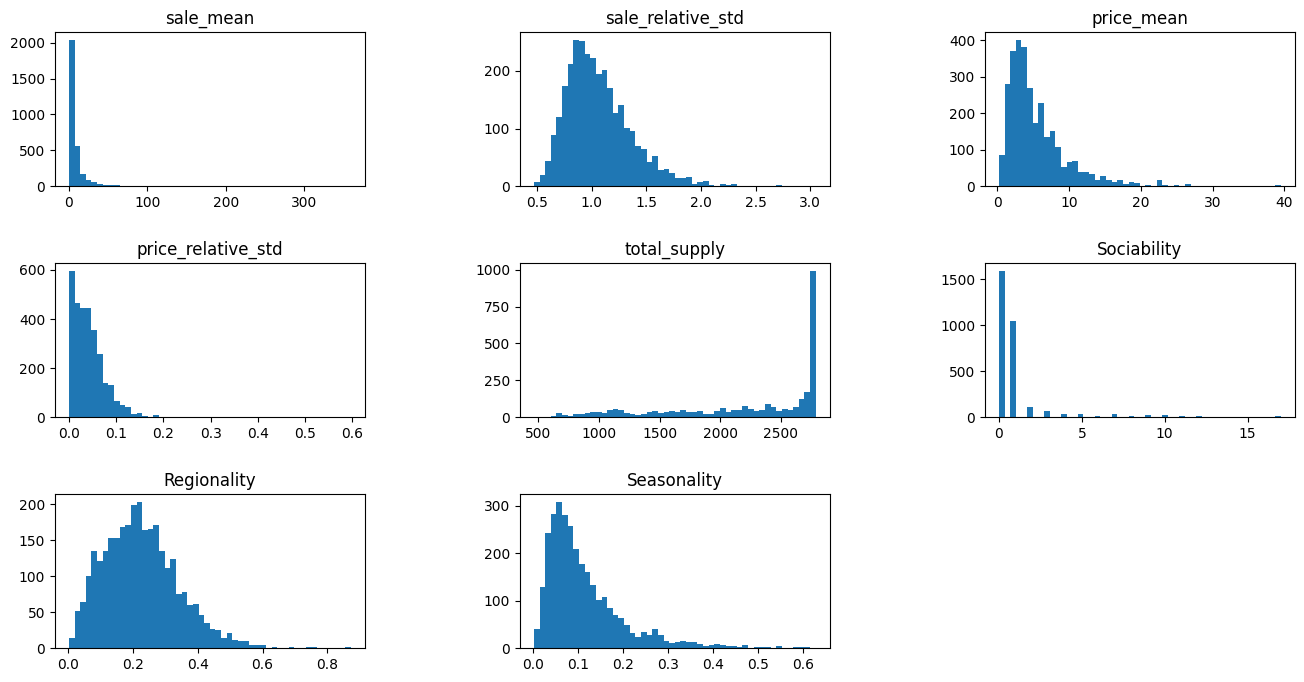

In [302]:
## Graficamos los histogramas de las columnas de tipo no object

fig = plt.figure(figsize= (16,8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

j = 0
for i in df_cluster.columns:
  if df_cluster[i].dtype != 'object':
    j += 1
    fig.add_subplot(3, 3, j)
    plt.hist(df_cluster[i], bins = 50)
    plt.title(i)

## Entrenamos K-means

In [ ]:
if 'item' in df_cluster.columns:
  df_cluster.drop(columns='item', inplace=True)
if 'cluster' in df_cluster.columns:
  df_cluster.drop(columns='cluster', inplace=True)

In [ ]:
#Escalamos las features en pipe line

pipe_line = Pipeline([('scaler', StandardScaler())])
df_cluster_scaled = pipe_line.fit_transform(df_cluster)

In [ ]:
df_cluster_scaled

sale_mean  price_mean  price_relative_std  total_supply  Regionality
0     -0.386089    1.204557           -0.583191     -1.123454     1.477515
1     -0.439109   -0.064152           -0.596675      0.749002     1.185091
2     -0.475822   -0.357600            0.228747     -1.656895    -0.410825
3      0.293660    0.091783            0.099724      0.871153     0.756729
4     -0.219487   -0.382283            0.473854      0.657776    -0.122163
...         ...         ...                 ...           ...          ...
3044  -0.207048   -0.489718            0.712334      0.716532     1.691913
3045  -0.373275   -0.559779            1.145696      0.905169     0.243063
3046  -0.261648   -0.139371            0.188853      0.900531    -1.180459
3047  -0.096870   -0.888337           -0.980570     -0.933270    -0.829994
3048   0.134076   -0.962470           -0.700361     -1.876456     1.179621

[3049 rows x 5 columns]

In [ ]:
set_k = range(3, 13)
dict_clustering = {}
for k in set_k:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster_scaled)
    dict_clustering[k] = [kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_]


Text(0, 0.5, 'inertia')

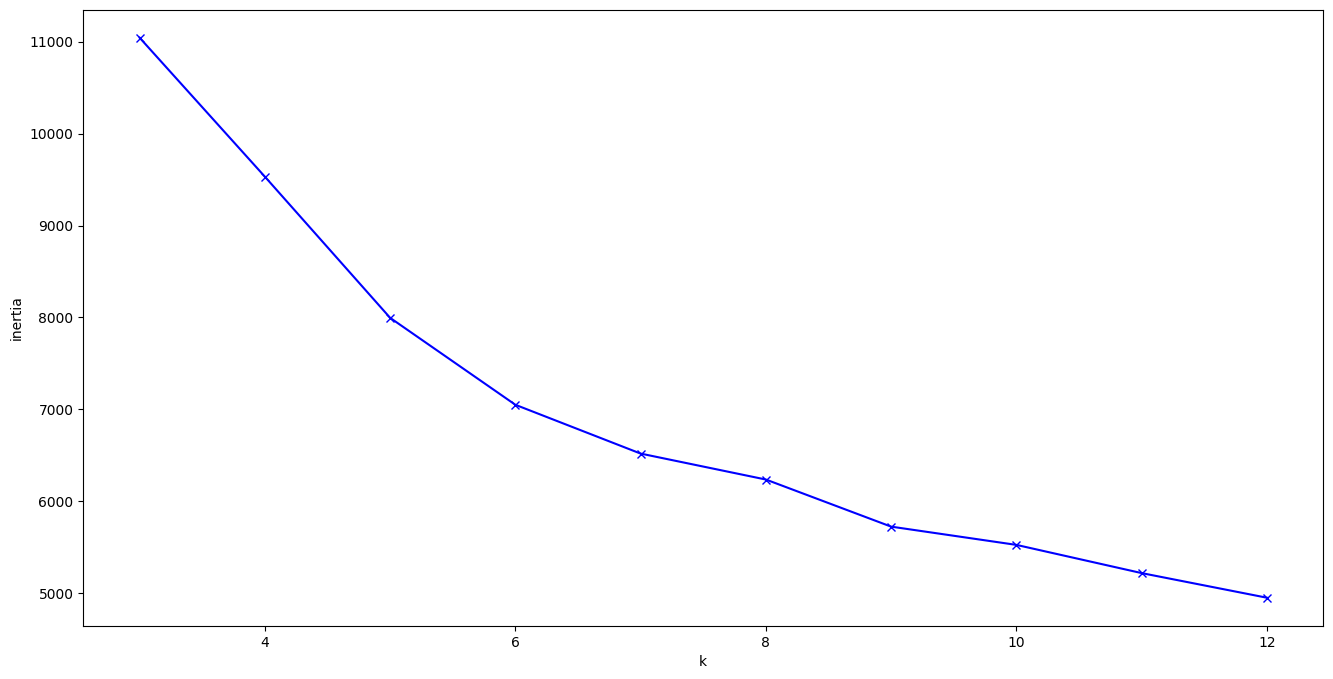

In [ ]:
import matplotlib.pyplot as plt
#graficamos elbow

fig = plt.figure(figsize= (16,8))
plt.plot(set_k, [dict_clustering[k][0] for k in set_k], 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')


In [ ]:
# exploramos el resultado de 9 clusters
# observamos los centroides

kmeans = KMeans(n_clusters=9, random_state=0).fit(df_cluster_scaled)


df_items['cluster'] = kmeans.labels_
df_cluster['cluster'] = kmeans.labels_
df_cluster['item'] = df_items['item']


In [ ]:

df_cluster.groupby('cluster').agg({'item': 'count', 'sale_mean': 'mean', 'price_mean': 'mean', 'price_relative_std': 'mean', 'total_supply': 'mean', 'Regionality': 'mean' })

item   sale_mean  price_mean  price_relative_std  total_supply  \
cluster                                                                   
0         331    7.709854    4.140675            0.112888   2434.534743   
1         531    6.000616    4.384614            0.022426   1305.694915   
2         424    3.626447   10.081136            0.033832   2565.018868   
3         857    7.472649    3.840505            0.036308   2578.791132   
4          10  187.853444    2.495151            0.043955   2597.100000   
5         278    6.559298    5.157563            0.024047   1347.679856   
6         386    8.703049    4.498438            0.044554   2616.808290   
7         106    3.741401   21.565094            0.027630   1888.500000   
8         126   55.710584    1.806775            0.046812   2493.206349   

         Regionality  
cluster               
0           0.221657  
1           0.150201  
2           0.247314  
3           0.153776  
4           0.289747  
5           0.357757  
6           0.380588  
7           0.278343  
8           0.178711

## REFACTORIZAMOS K-MEANS

best try 0
best try 1
best try 6
best try 0
best try 1
best try 3
best try 5
best try 0
best try 43
best try 0
best try 1
best try 0
best try 5
best try 45
best try 0
best try 14
best try 0
best try 5
best try 7
best try 9
best try 10
best try 0
best try 3
best try 5
best try 9
best try 24
best try 0
best try 1
best try 3
best try 5
best try 16
best try 20
best try 24
best try 0
best try 1
best try 6
Iteracion 1, cantidad de features: 7, features: ['price_mean', 'Seasonality', 'total_supply', 'Regionality', 'sale_mean', 'Sociability', 'price_relative_std']
best try 0
best try 1
best try 3
best try 5
best try 7
best try 0
best try 1
best try 5
best try 7
best try 0
best try 1
best try 4
best try 5
best try 16
best try 0
best try 37
best try 41
best try 0
best try 1
best try 5
best try 14
best try 27
best try 0
best try 1
best try 2
best try 3
best try 6
best try 10
best try 16
best try 0
best try 1
best try 2
best try 3
best try 10
best try 0
best try 1
best try 3
best try 36
best try 0

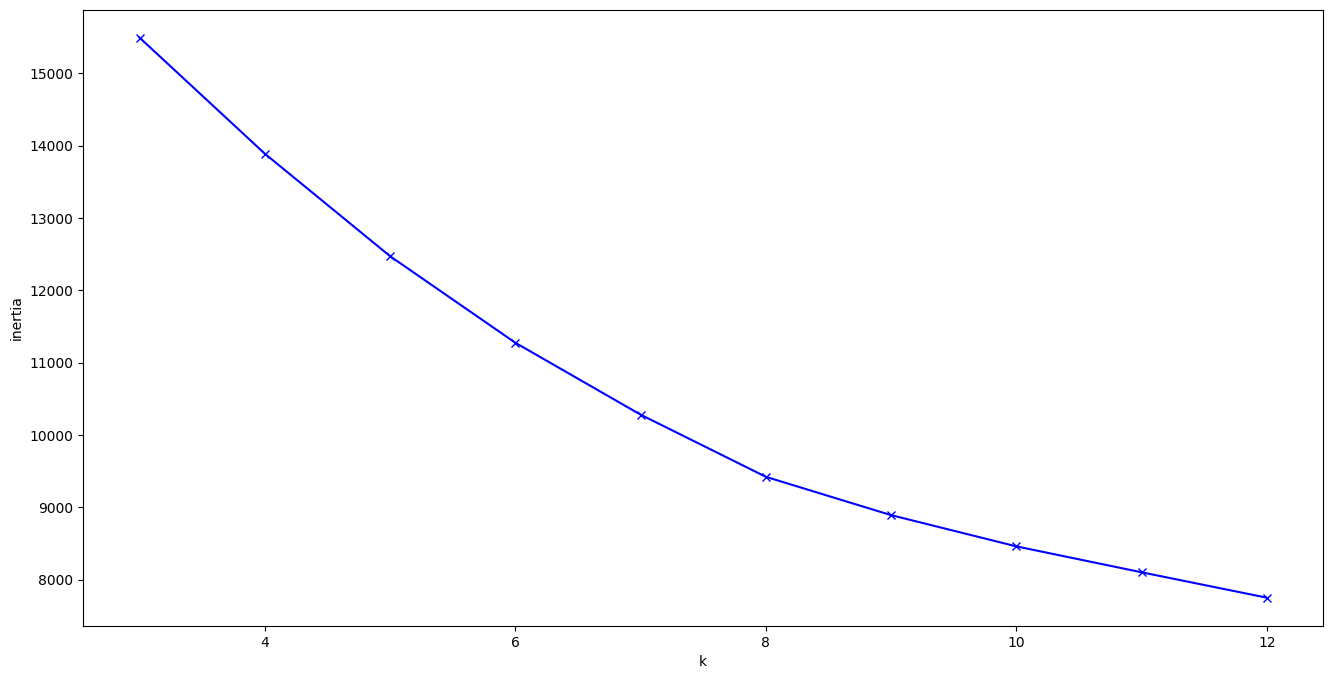

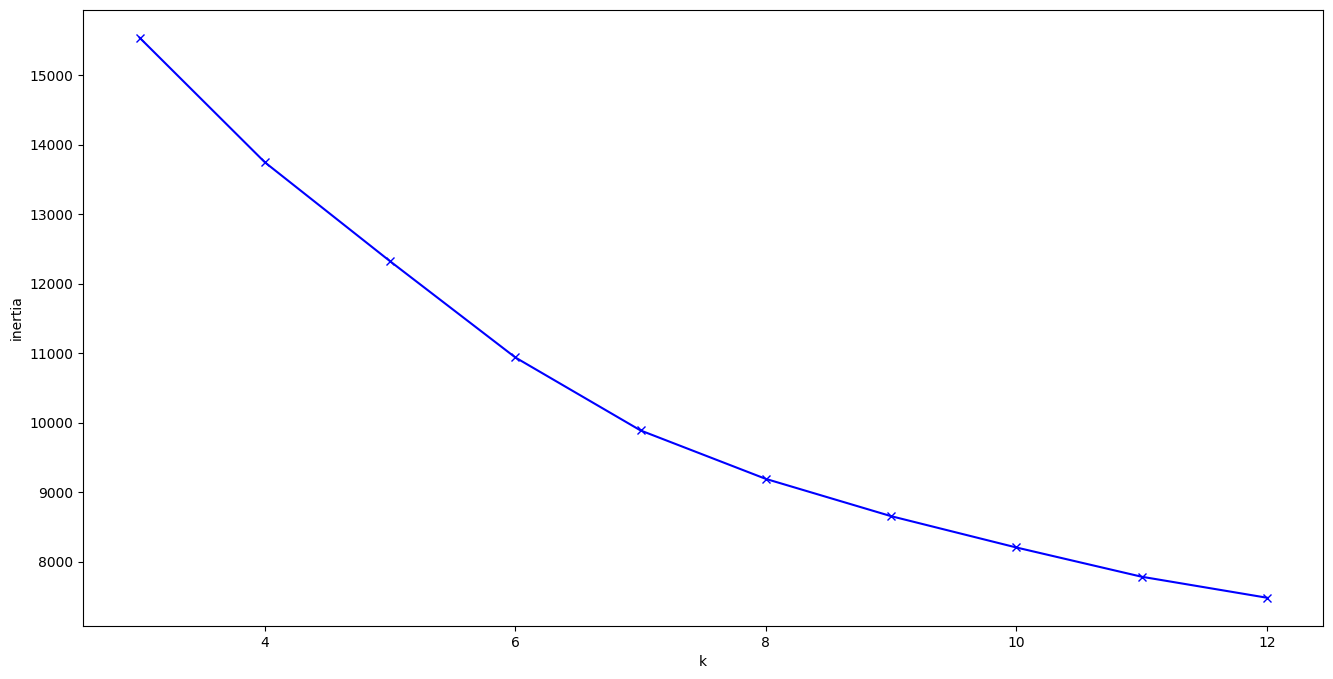

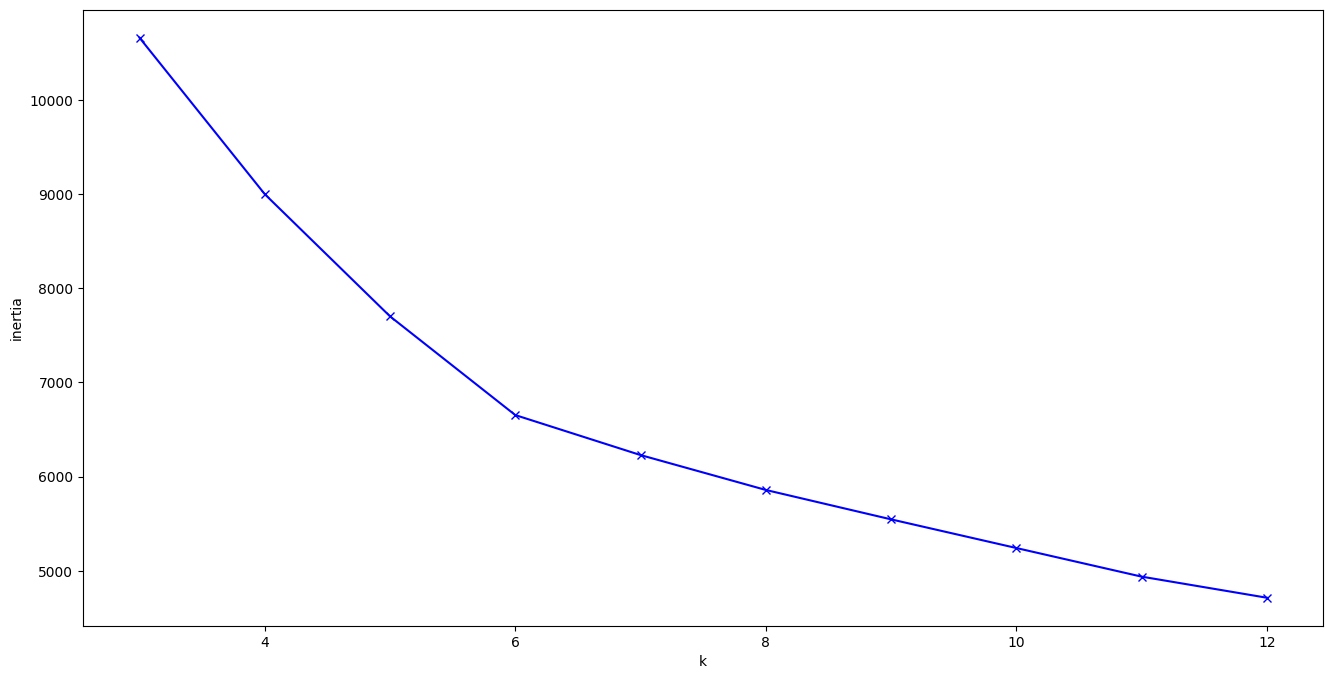

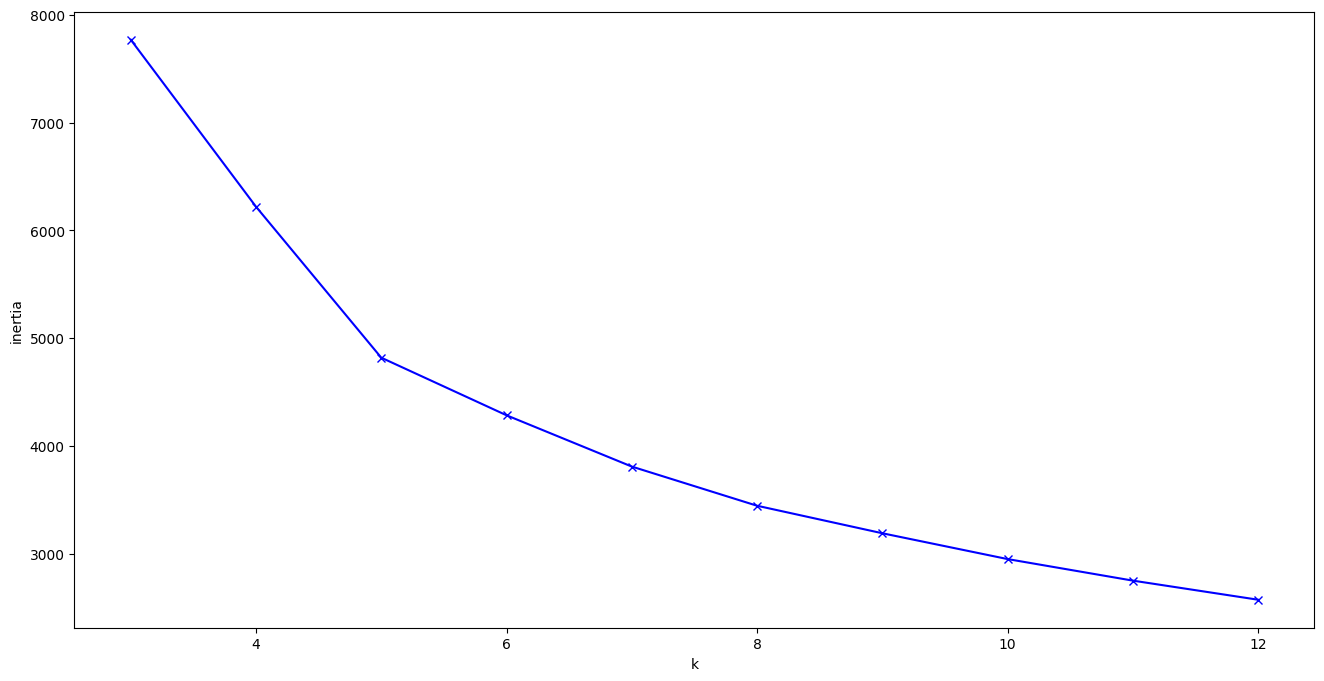

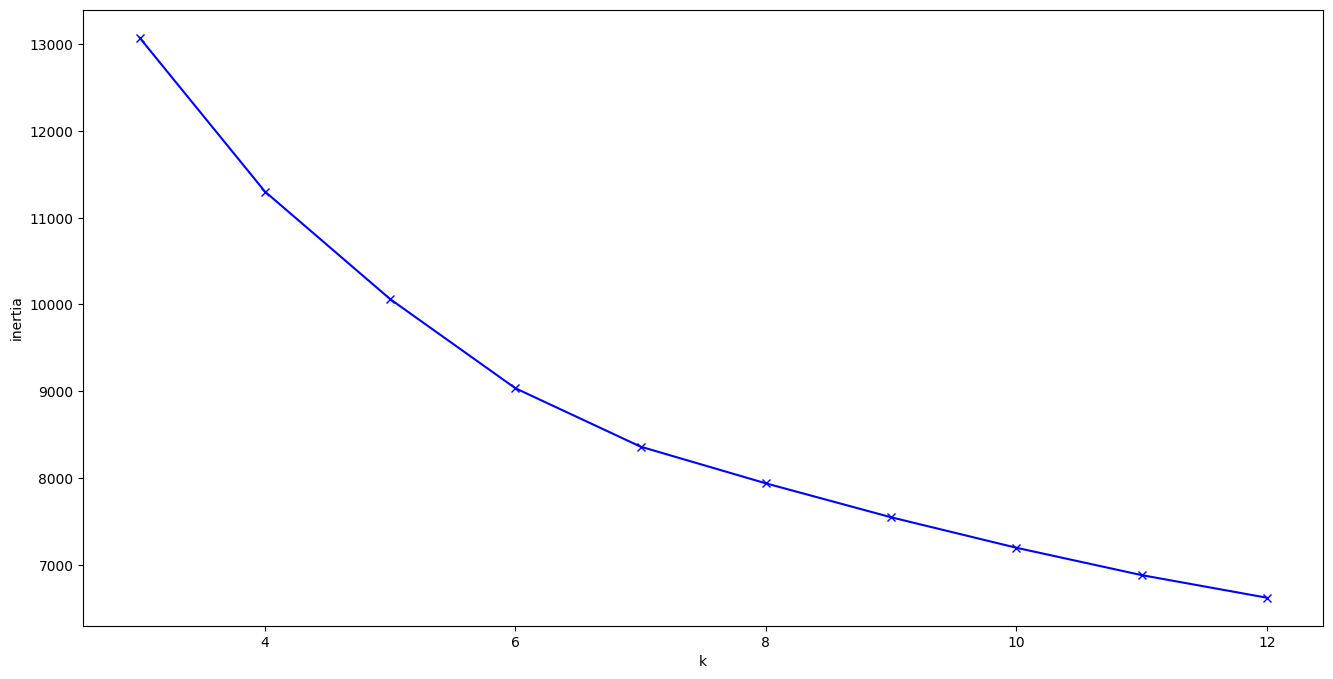

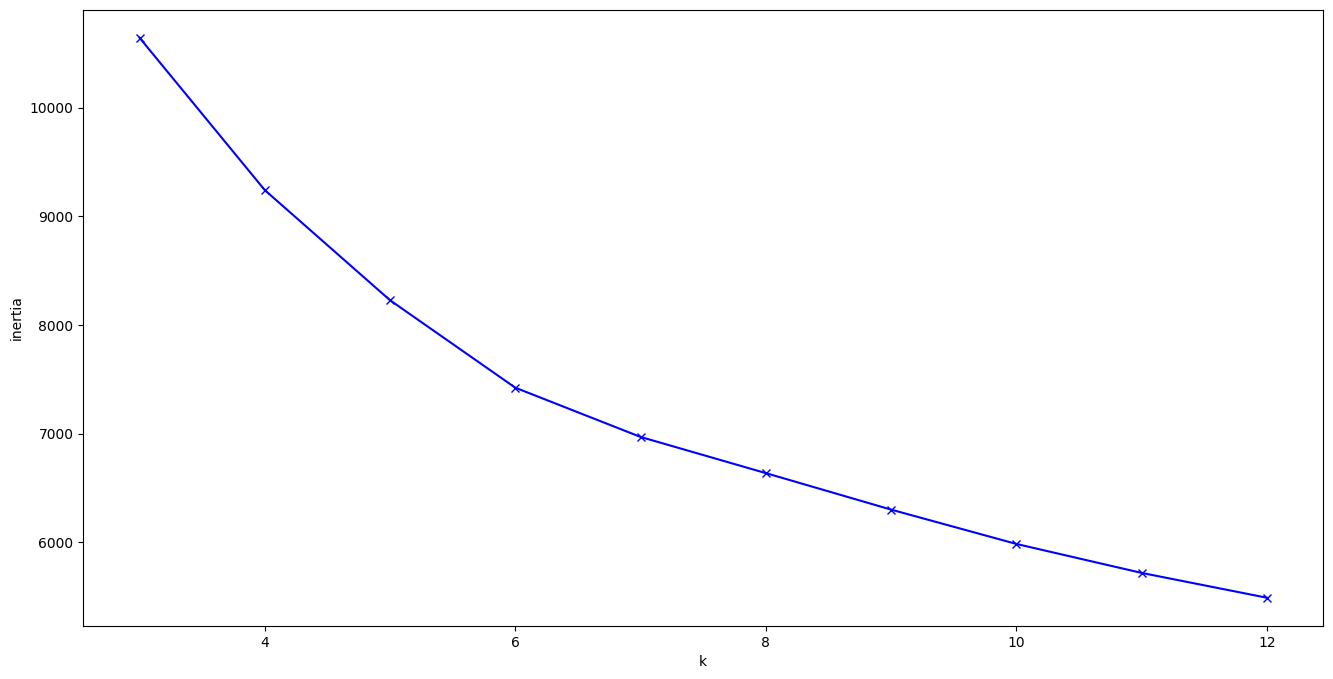

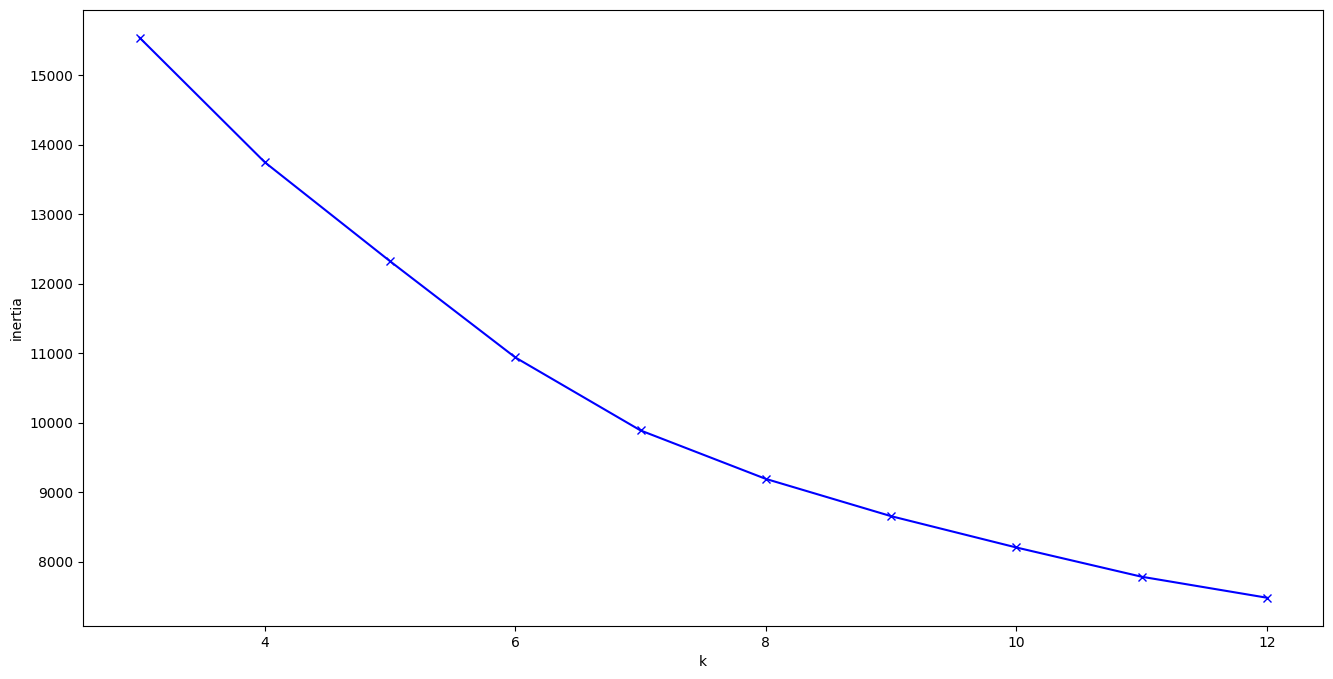

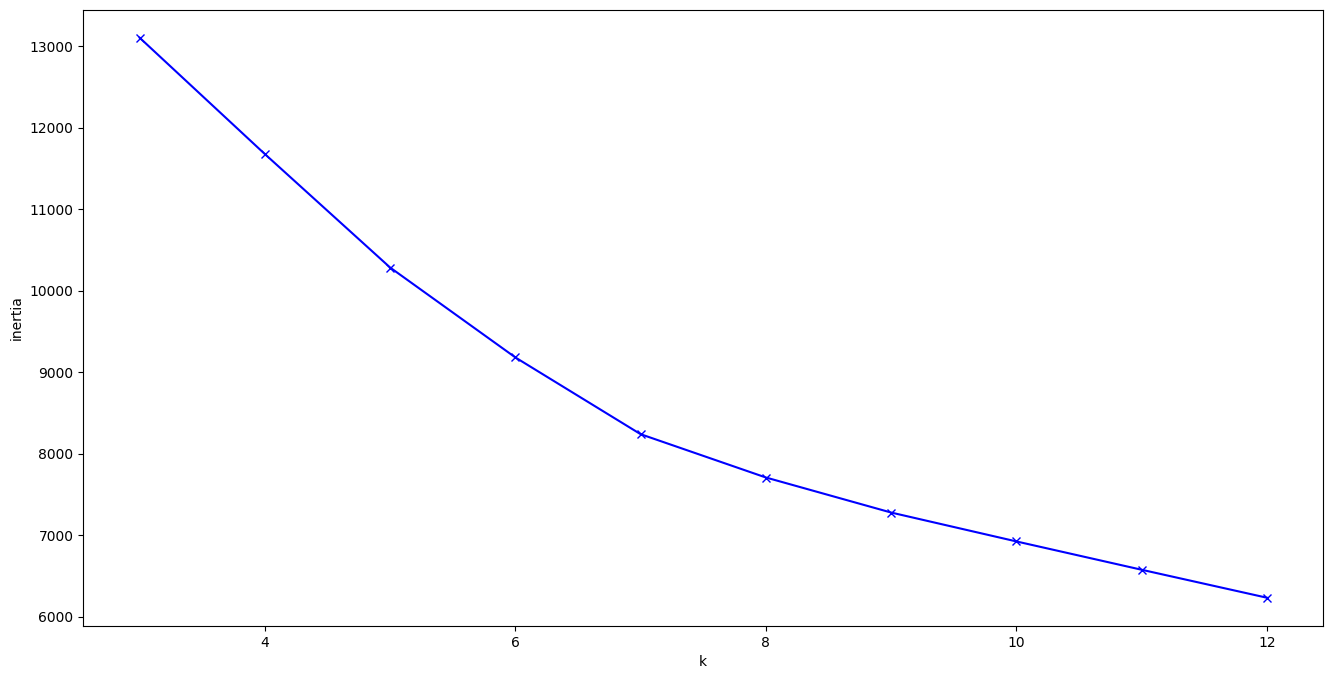

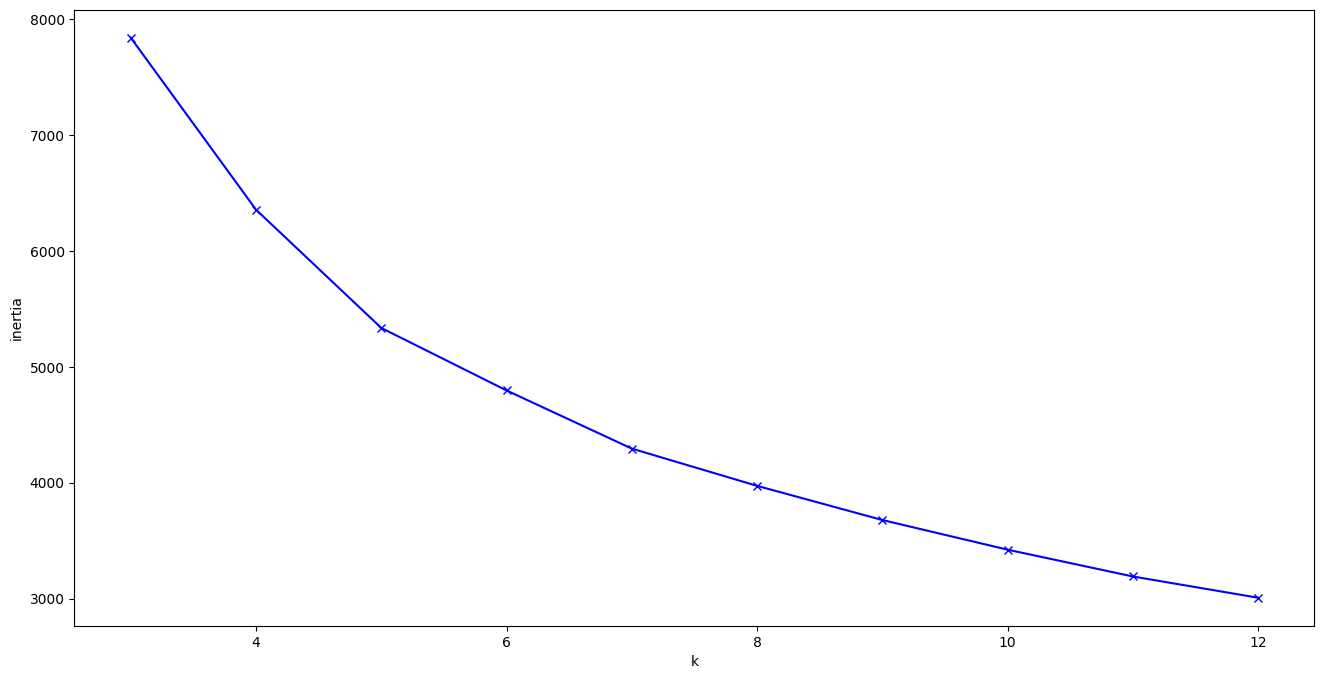

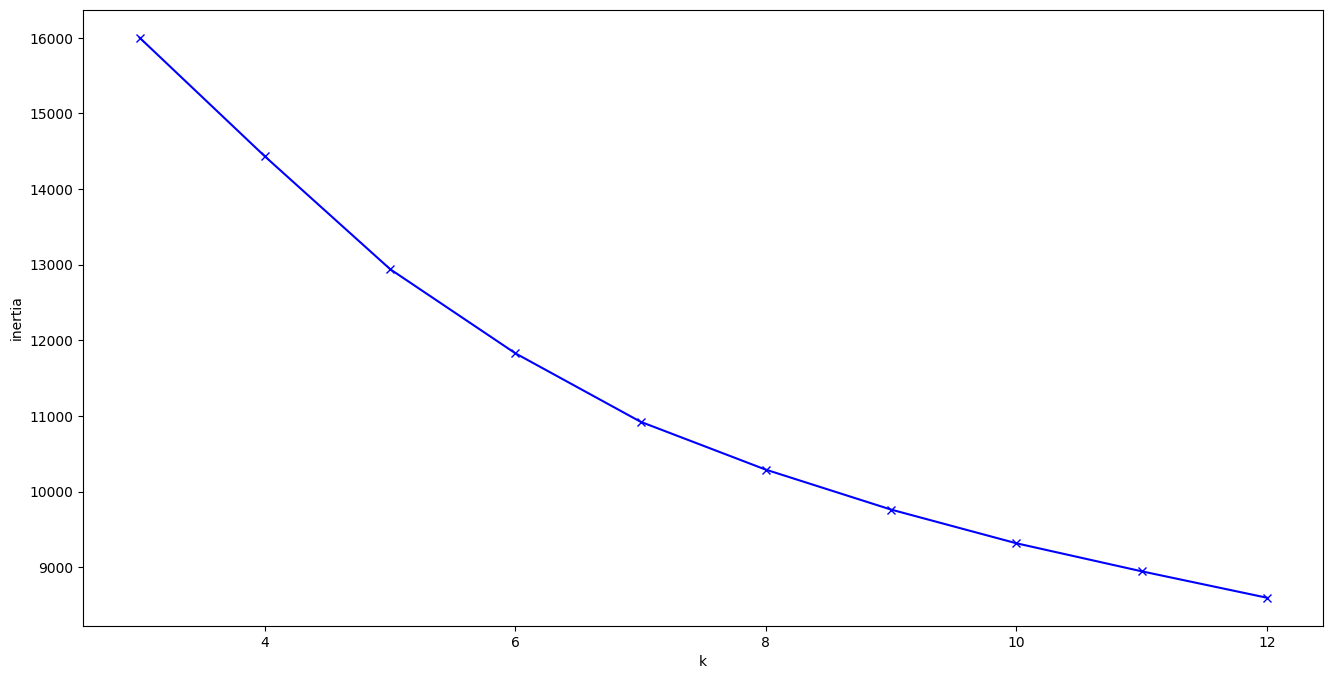

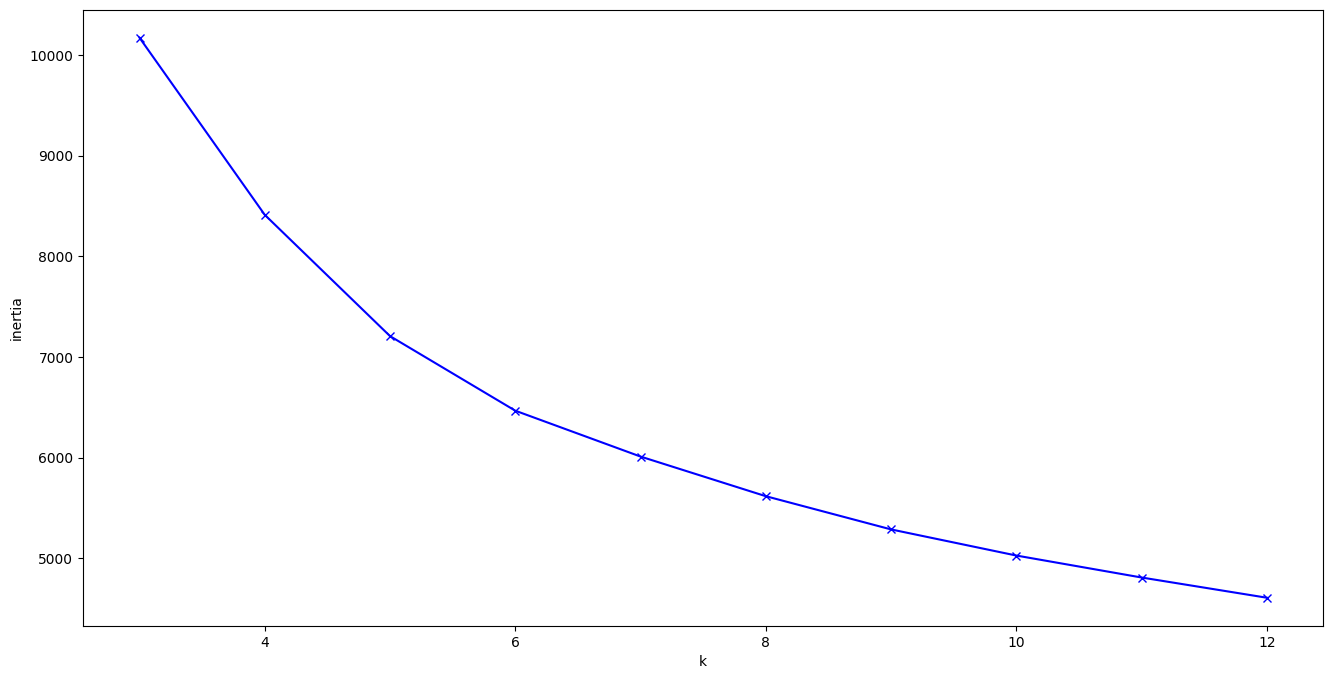

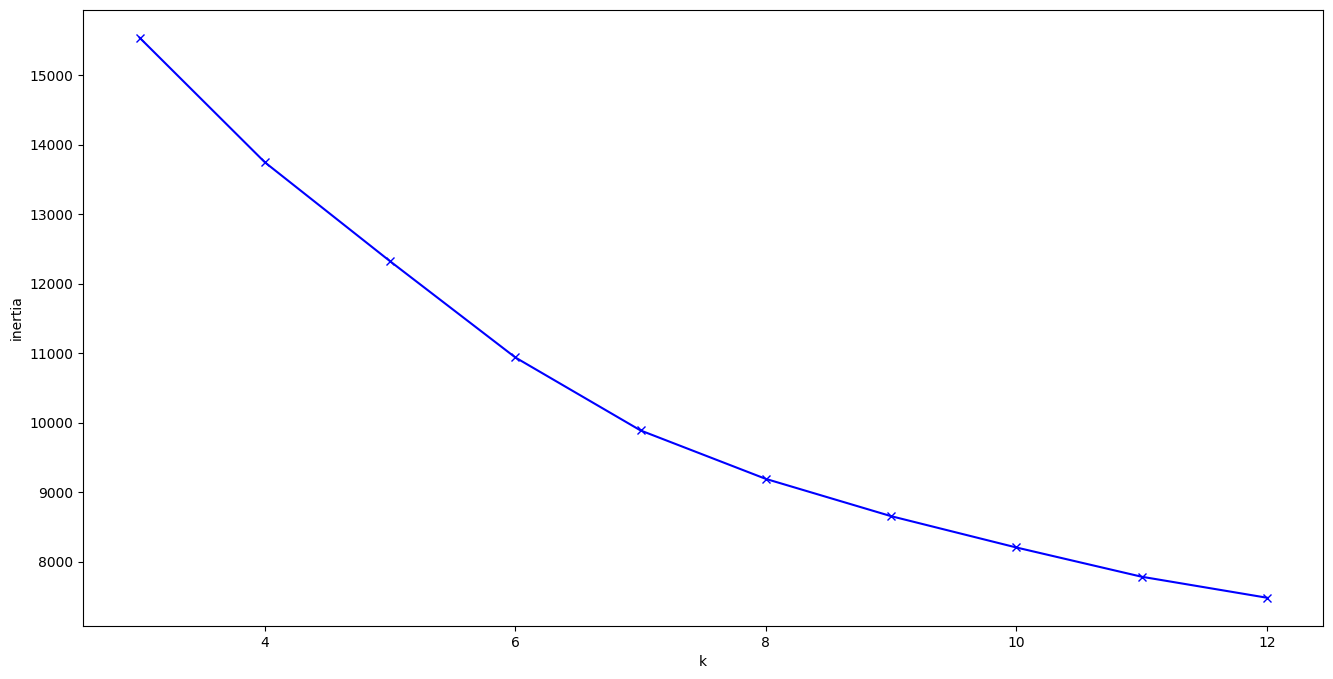

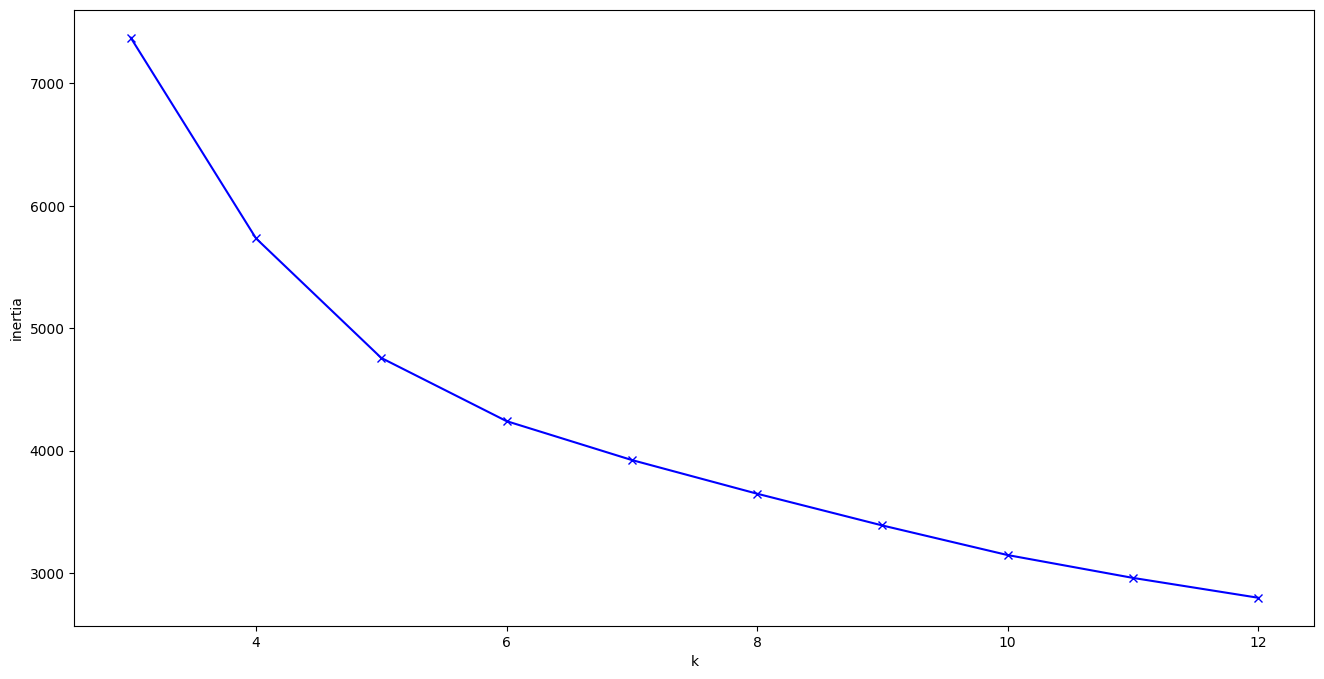

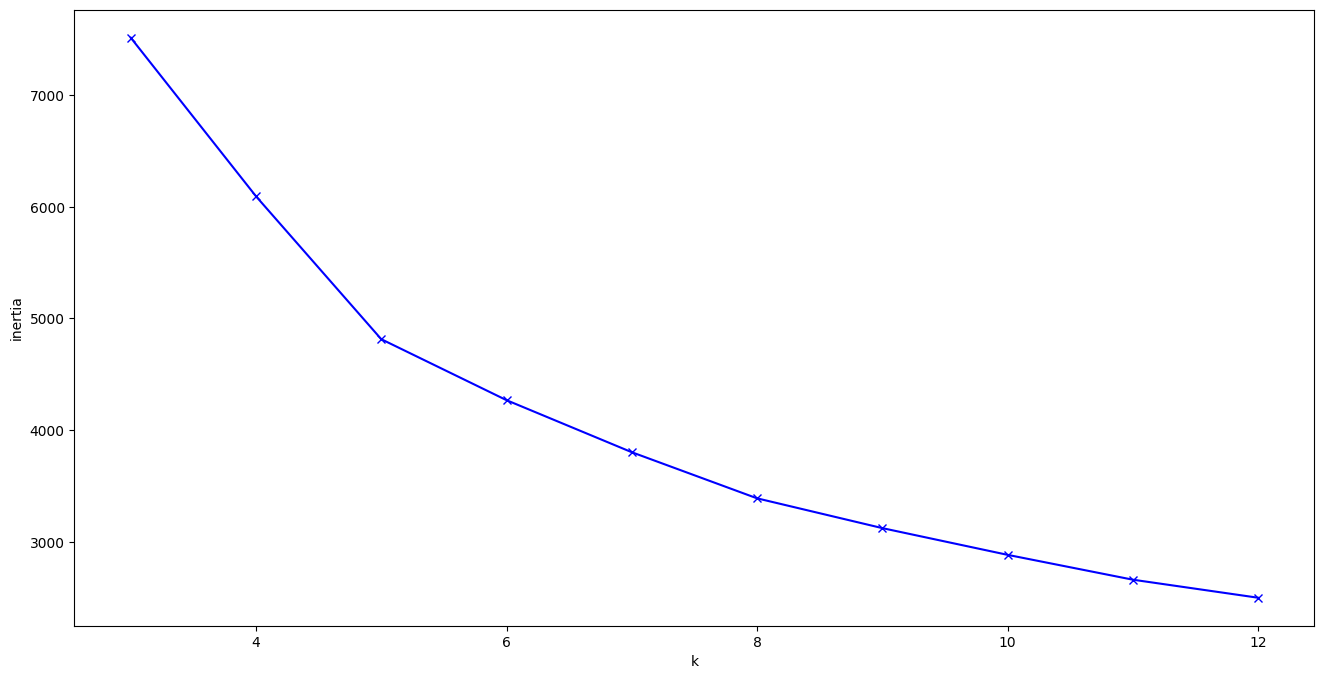

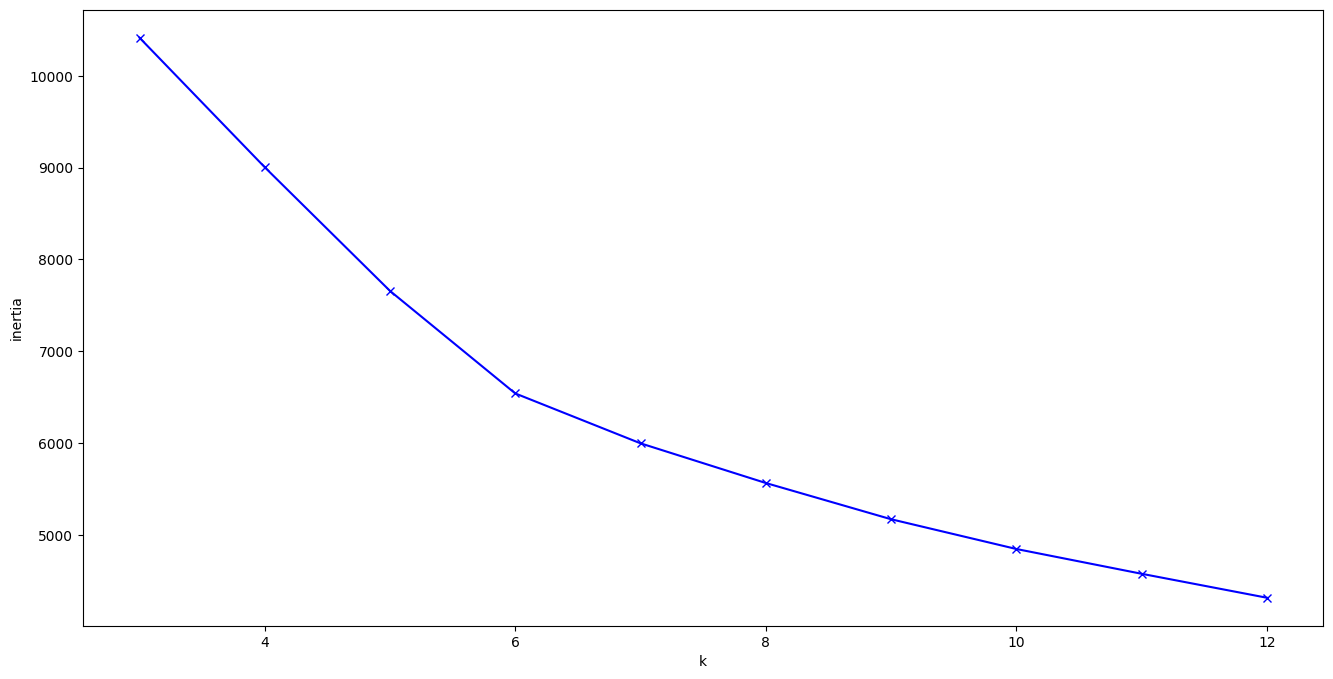

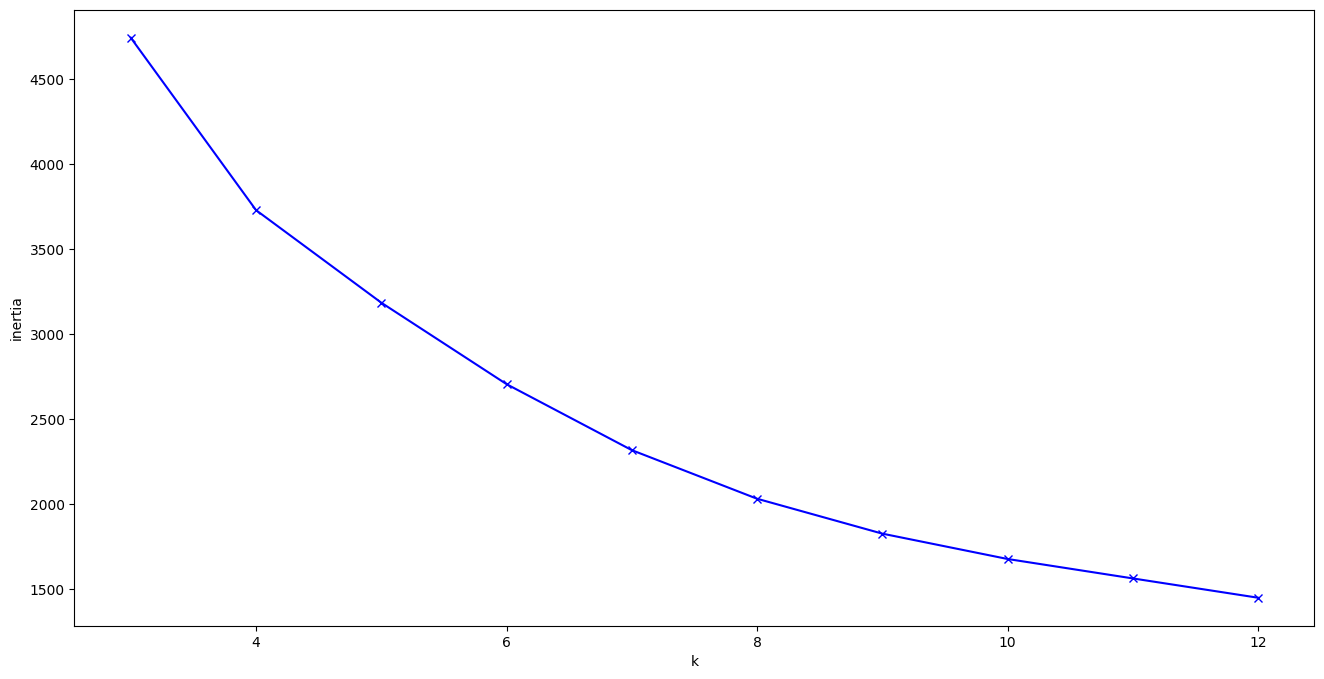

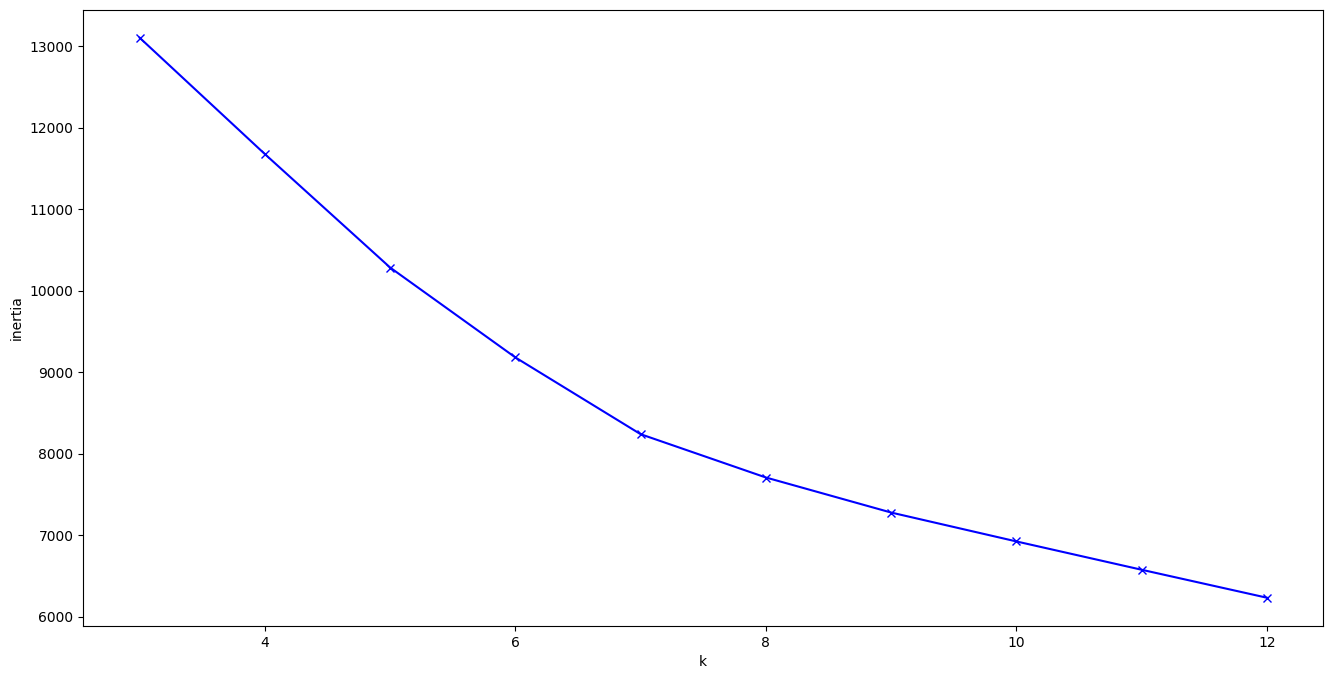

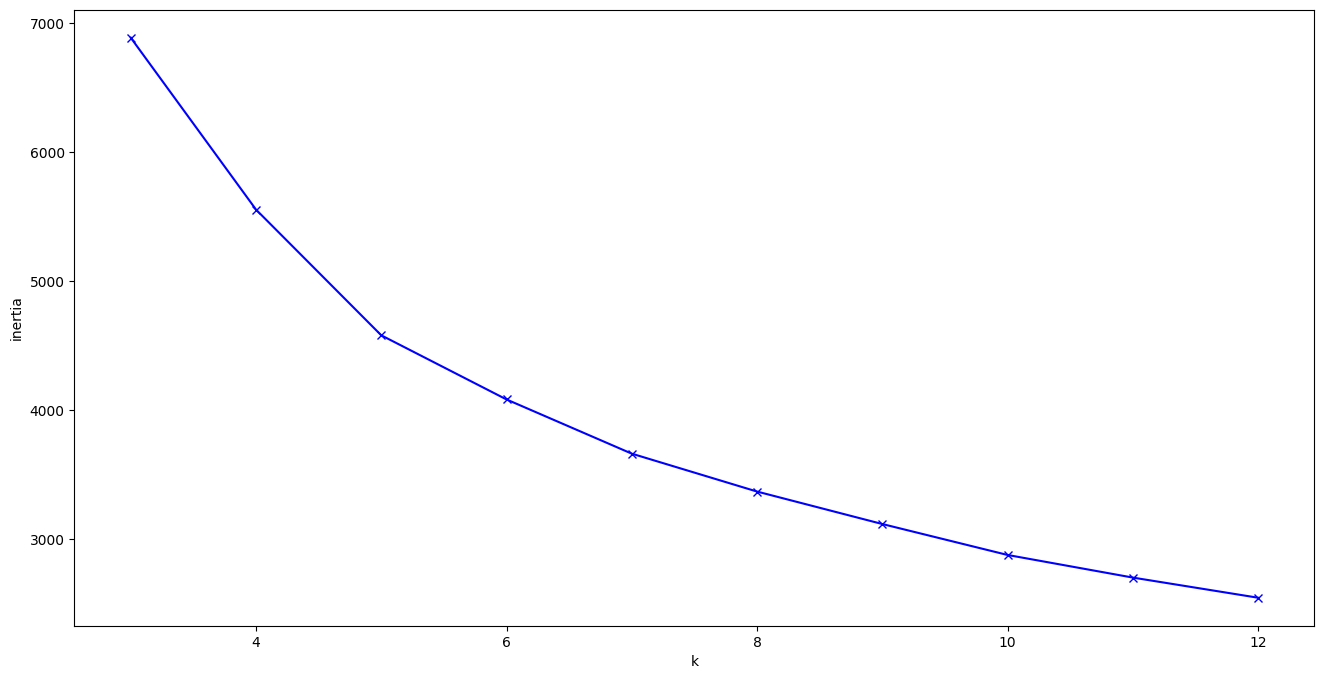

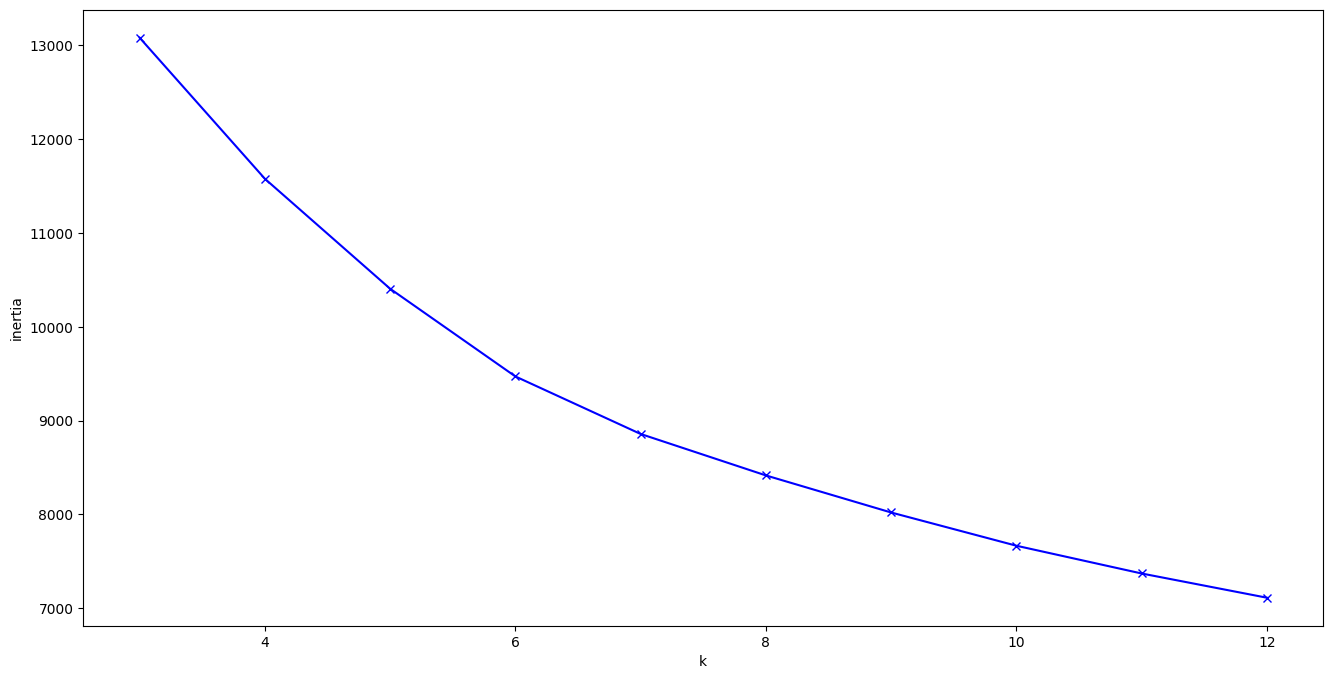

In [285]:
import time
import random

if 'item' in df_cluster.columns:
  df_cluster.drop(columns='item', inplace=True)
if 'cluster' in df_cluster.columns:
  df_cluster.drop(columns='cluster', inplace=True)

features_clusters = df_cluster.columns

pipe_line = Pipeline([('scaler', StandardScaler())])

df_cluster_scaled = pipe_line.fit_transform(df_cluster)

n_tries = 19
set_k = range(3, 13)
dict_clustering = {}
dict_try = {}
n_inizializations = 50
full_experiment = 0


for i_try in range(n_tries):
  n_features = random.randint(3, len(features_clusters) - full_experiment)
  if (n_features == len(features_clusters) and (full_experiment == 0)) :
    full_experiment = 1
  selected_features = random.sample(list(features_clusters), n_features)
  df_cluster_reduced = df_cluster_scaled[selected_features]
  dict_clustering = {}
  inertia = 0
  for k in set_k:
    for i in range(n_inizializations):
      kmeans = KMeans(n_clusters=k, random_state=i).fit(df_cluster_reduced)
      if (i == 0 or kmeans.inertia_ < inertia):
#        print(f'best try {i}')
        inertia = kmeans.inertia_
        best_kmeans = kmeans
        dict_clustering[k] = [kmeans.inertia_, n_features, i, selected_features]

  #    dict_clustering[k] = [kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_, selected_features]
  #    dict_try[i_try] = [k, kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_, selected_features]

  dict_try[i_try] = dict_clustering

  fig = plt.figure(figsize= (16,8))
  plt.plot(set_k, [dict_clustering[k][0] for k in set_k], 'bx-')
  plt.xlabel('k')
  plt.ylabel('inertia')
  print(f'Iteracion {i_try + 1}, cantidad de features: {n_features}, features: {selected_features}')





In [ ]:
print(dict_try)

{0: {3: [11042.197266374318, 5, ['price_relative_std', 'price_mean', 'total_supply', 'Regionality', 'sale_mean']], 4: [9530.866959701161, 5, ['price_relative_std', 'price_mean', 'total_supply', 'Regionality', 'sale_mean']], 5: [7995.803479191562, 5, ['price_relative_std', 'price_mean', 'total_supply', 'Regionality', 'sale_mean']], 6: [7050.261793220757, 5, ['price_relative_std', 'price_mean', 'total_supply', 'Regionality', 'sale_mean']], 7: [6519.599687976398, 5, ['price_relative_std', 'price_mean', 'total_supply', 'Regionality', 'sale_mean']], 8: [6237.384795693292, 5, ['price_relative_std', 'price_mean', 'total_supply', 'Regionality', 'sale_mean']], 9: [5725.22810322402, 5, ['price_relative_std', 'price_mean', 'total_supply', 'Regionality', 'sale_mean']], 10: [5526.694424676434, 5, ['price_relative_std', 'price_mean', 'total_supply', 'Regionality', 'sale_mean']], 11: [5219.938307644862, 5, ['price_relative_std', 'price_mean', 'total_supply', 'Regionality', 'sale_mean']], 12: [4952.18

In [291]:
df_tries = pd.DataFrame(dict_try)
df_tries.transpose()

3   \
0   [15493.310489865446, 7, 6, [price_mean, Season...   
1   [15539.322132406705, 7, 7, [total_supply, Regi...   
2   [10658.037137078585, 5, 16, [Seasonality, pric...   
3   [7769.566127490813, 4, 32, [Regionality, sale_...   
4   [13075.014727180189, 6, 7, [price_relative_std...   
5   [10642.310223148119, 5, 4, [price_relative_std...   
6   [15539.322132406705, 7, 7, [price_mean, Sociab...   
7   [13103.91194350308, 6, 34, [sale_relative_std,...   
8   [7839.9139965803115, 4, 5, [Regionality, sale_...   
9   [16001.559129921883, 7, 47, [Regionality, sale...   
10  [10169.679362495055, 5, 14, [Sociability, sale...   
11  [15539.322132406705, 7, 7, [Sociability, total...   
12  [7373.544149185217, 4, 17, [total_supply, Regi...   
13  [7513.271015221556, 4, 7, [Sociability, price_...   
14  [10414.057673480796, 5, 26, [price_mean, price...   
15  [4741.0499300093215, 3, 2, [Seasonality, sale_...   
16  [13103.91194350308, 6, 34, [Sociability, price...   
17  [6885.522051959818, 4, 5, [Regionality, Season...   
18  [13080.872101172432, 6, 25, [sale_relative_std...   

                                                   4   \
0   [13888.825763521338, 7, 5, [price_mean, Season...   
1   [13746.125433422734, 7, 7, [total_supply, Regi...   
2   [8997.737258674855, 5, 35, [Seasonality, price...   
3   [6220.065426893368, 4, 4, [Regionality, sale_m...   
4   [11302.25508578415, 6, 24, [price_relative_std...   
5   [9240.31482921835, 5, 20, [price_relative_std,...   
6   [13746.125433422734, 7, 7, [price_mean, Sociab...   
7   [11675.720080408502, 6, 10, [sale_relative_std...   
8   [6355.90487938719, 4, 43, [Regionality, sale_m...   
9   [14432.081053296055, 7, 47, [Regionality, sale...   
10  [8411.070730365895, 5, 7, [Sociability, sale_r...   
11  [13746.12543342273, 7, 7, [Sociability, total_...   
12  [5734.051060018221, 4, 2, [total_supply, Regio...   
13  [6093.425666064372, 4, 17, [Sociability, price...   
14  [9003.284457120655, 5, 31, [price_mean, price_...   
15  [3727.515028935522, 3, 1, [Seasonality, sale_m...   
16  [11675.720080408502, 6, 10, [Sociability, pric...   
17  [5553.621391740229, 4, 8, [Regionality, Season...   
18  [11577.199280805531, 6, 7, [sale_relative_std,...   

                                                   5   \
0   [12471.448245907375, 7, 43, [price_mean, Seaso...   
1   [12321.870163409734, 7, 16, [total_supply, Reg...   
2   [7701.036113110734, 5, 0, [Seasonality, price_...   
3   [4819.31181697356, 4, 19, [Regionality, sale_m...   
4   [10062.115713964502, 6, 34, [price_relative_st...   
5   [8227.06602177574, 5, 34, [price_relative_std,...   
6   [12321.870163409734, 7, 16, [price_mean, Socia...   
7   [10283.395921787815, 6, 7, [sale_relative_std,...   
8   [5335.41155312709, 4, 48, [Regionality, sale_m...   
9   [12940.86332427208, 7, 19, [Regionality, sale_...   
10  [7206.944479539526, 5, 2, [Sociability, sale_r...   
11  [12321.870163409734, 7, 16, [Sociability, tota...   
12  [4757.1949669482865, 4, 21, [total_supply, Reg...   
13  [4814.255278423912, 4, 19, [Sociability, price...   
14  [7656.658060248422, 5, 10, [price_mean, price_...   
15  [3183.4985051271333, 3, 45, [Seasonality, sale...   
16  [10283.395921787815, 6, 7, [Sociability, price...   
17  [4579.295421589628, 4, 11, [Regionality, Seaso...   
18  [10404.802683753676, 6, 2, [sale_relative_std,...   

                                                   6   \
0   [11274.489965592189, 7, 1, [price_mean, Season...   
1   [10937.52556341619, 7, 41, [total_supply, Regi...   
2   [6653.356403279336, 5, 23, [Seasonality, price...   
3   [4284.905582699836, 4, 48, [Regionality, sale_...   
4   [9034.477418106337, 6, 27, [price_relative_std...   
5   [7422.354503554924, 5, 43, [price_relative_std...   
6   [10937.52556341619, 7, 41, [price_mean, Sociab...   
7   [9180.049758098798, 6, 18, [sale_relative_std,...   
8   [4796.031064887479, 4, 47, [Regionality, sale_...   
9   [11827.928406003277, 7, 36, [Regionality, sale...   
1

In [297]:
dict_try[14][6]

[6540.4197442687,
 5,
 3,
 ['price_mean',
  'price_relative_std',
  'Sociability',
  'Regionality',
  'sale_mean']]

In [298]:
# Examinamos un cluster particular

set_features_selected =   ['price_mean',
  'price_relative_std',
  'Sociability',
  'Regionality',
  'sale_mean']

k_selected = 5
seed = 3

print(set_features_selected)


df_cluster_selected = df_cluster_scaled[set_features_selected]
kmeans = KMeans(n_clusters=k_selected, random_state=seed).fit(df_cluster_selected)

df_items['cluster'] = kmeans.labels_
df_cluster['cluster'] = kmeans.labels_
df_cluster['item'] = df_items['item']
df_cluster.groupby('cluster').agg({'item': 'count', 'sale_mean': 'mean', 'sale_relative_std': 'mean', 'price_mean': 'mean', 'price_relative_std': 'mean', 'total_supply': 'mean', 'Regionality': 'mean', 'Seasonality': 'mean', 'Sociability': 'mean' })


['price_mean', 'price_relative_std', 'Sociability', 'Regionality', 'sale_mean']


item  sale_mean  sale_relative_std  price_mean  price_relative_std  \
cluster                                                                       
0         206  30.669654           1.125879    2.922902            0.066895   
1         419   9.861533           1.146516    4.175272            0.102900   
2         339   3.462626           1.114563   15.281667            0.033315   
3        1363   8.420994           0.996129    4.253558            0.026598   
4         722   7.002637           1.120669    5.046497            0.032468   

         total_supply  Regionality  Seasonality  Sociability  
cluster                                                       
0         2696.048544     0.232372     0.119787     8.092233  
1         2349.176611     0.212155     0.123682     0.852029  
2         2139.805310     0.262159     0.116080     0.560472  
3         2115.999266     0.151382     0.110588     0.469552  
4         2178.108033     0.358847     0.115581     0.630194

In [284]:
df_items[df_items['cluster'] == 3]

item  price_mean  price_std  sale_mean   sale_std  \
1      ACCESORIES_1_002    5.275708   0.104185   1.881369   2.244799   
3      ACCESORIES_1_004    5.983299   0.273154  14.152818  13.022962   
4      ACCESORIES_1_005    3.832119   0.228278   5.559316   5.210088   
5      ACCESORIES_1_006    1.334332   0.052577   5.994495   6.201598   
8      ACCESORIES_1_009    2.290728   0.099509   5.826945   5.328052   
...                 ...         ...        ...        ...        ...   
3030  SUPERMARKET_3_809    1.200000   0.000000  27.649356  25.559931   
3031  SUPERMARKET_3_810    2.990382   0.145742   8.777463   9.051242   
3033  SUPERMARKET_3_812    3.389424   0.108926   9.477778   6.399067   
3038  SUPERMARKET_3_817    3.383001   0.124454   4.670136   3.715843   
3041  SUPERMARKET_3_820    2.364426   0.073059  11.915691   7.709480   

      total_supply  release_week  price_relative_std  sale_relative_std  \
1             2689             6            0.019748           1.193173   
3             2768             1            0.045653           0.920167   
4             2630            14            0.059570           0.937182   
5             2180            60            0.039404           1.034549   
8             2687             1            0.043440           0.914382   
...            ...           ...                 ...                ...   
3030          2407            37            0.000000           0.924431   
3031          2121            63            0.048737           1.031191   
3033          2790             1            0.032137           0.675165   
3038          2786             1            0.036788           0.795660   
3041          2562             1            0.030899           0.647002   

      cluster  Sociability  
1           3            0  
3           3            1  
4           3            0  
5           3            0  
8           3            1  
...       ...          ...  
3030        3            0  
3031        3            0  
3033        3            1  
3038        3            1  
3041        3            1  

[1257 rows x 11 columns]

### Generamos funciones

In [ ]:
import time
import random

if 'item' in df_cluster.columns:
  df_cluster.drop(columns='item', inplace=True)
if 'cluster' in df_cluster.columns:
  df_cluster.drop(columns='cluster', inplace=True)

features_clusters = df_cluster.columns

df_cluster_scaled = pipe_line.fit_transform(df_cluster)


set_k = range(3, 13)
dict_clustering = {}
dict_try = {}


for i_try in range(n_tries):
  n_features = random.randint(3, len(features_clusters))
  selected_features = random.sample(list(features_clusters), n_features)
  df_cluster_reduced = df_cluster_scaled[selected_features]
  dict_clustering = {}
  for k in set_k:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster_reduced)
#    dict_clustering[k] = [kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_, selected_features]
#    dict_try[i_try] = [k, kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_, selected_features]
    dict_clustering[k] = [kmeans.inertia_, n_features, selected_features]

  dict_try[i_try] = dict_clustering

  fig = plt.figure(figsize= (16,8))
  plt.plot(set_k, [dict_clustering[k][0] for k in set_k], 'bx-')
  plt.xlabel('k')
  plt.ylabel('inertia')
  print(f'Iteracion {i_try}')


In [ ]:
def try_clustering(n_tries, set_k= set_k, df_cluster=df_cluster, sclaed=True, df_items=df_items):

  if 'item' in df_cluster.columns:
    df_cluster.drop(columns='item', inplace=True)
  if 'cluster' in df_cluster.columns:
    df_cluster.drop(columns='cluster', inplace=True)

  features_clusters = df_cluster.columns

  df_cluster_scaled = df_cluster.copy()
  if scaled:
    df_cluster_scaled = pipe_line.fit_transform(df_cluster_scaled)


  dict_try = {}

  all_features_tried = 0

  for i_try in range(n_tries):
    n_features = random.randint(3, len(features_clusters) - all_features_tried)
    if (n_features == len(features_clusters) or (all_features_tried == 1) ) :
      all_features_tried = 1
    selected_features = random.sample(list(features_clusters), n_features)
    df_cluster_reduced = df_cluster_scaled[selected_features]
    dict_clustering = {}

    for k in set_k:
      kmeans = KMeans(n_clusters=k, random_state=0).fit(df_cluster_reduced)
#    dict_clustering[k] = [kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_, selected_features]
#    dict_try[i_try] = [k, kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_, selected_features]
      dict_clustering[k] = [kmeans.inertia_, n_features, selected_features]

    dict_try[i_try] = dict_clustering
    fig = plt.figure(figsize= (16,8))
    plt.plot(set_k, [dict_clustering[k][0] for k in set_k], 'bx-')
    plt.xlabel('k')
    plt.ylabel('inertia')
    print(f'Iteracion {i_try}')






In [ ]:
##try_clustering(

In [ ]:
def examinar_clustering(set_features_selected, k_selected, df_cluster=df_cluster, sclaed=True, df_items=df_items ):
  df_cluster_selected = df_cluster[set_features_selected]
  if sclaed:
    df_cluster_selected = pipe_line.fit_transform(df_cluster_selected)

  kmeans = KMeans(n_clusters=k_selected, random_state=0).fit(df_cluster_selected)
  df_cluster['cluster'] = kmeans.labels_
  df_cluster['item'] = df_items['item']
  df_gb = df_cluster.groupby('cluster').agg({'item': 'count', 'sale_mean': 'mean', 'price_mean': 'mean', 'price_relative_std': 'mean', 'total_supply': 'mean', 'Regionality': 'mean' })
  return df_gb

In [ ]:
dict_try[8]

{3: [7985.343006346051,
  4,
  0,
  ['total_supply', 'price_mean', 'Regionality', 'sale_mean']],
 4: [6417.695279393761,
  4,
  0,
  ['total_supply', 'price_mean', 'Regionality', 'sale_mean']],
 5: [5250.59749298691,
  4,
  0,
  ['total_supply', 'price_mean', 'Regionality', 'sale_mean']],
 6: [4782.515023523837,
  4,
  0,
  ['total_supply', 'price_mean', 'Regionality', 'sale_mean']],
 7: [4440.017126420263,
  4,
  0,
  ['total_supply', 'price_mean', 'Regionality', 'sale_mean']],
 8: [3881.713549834415,
  4,
  0,
  ['total_supply', 'price_mean', 'Regionality', 'sale_mean']],
 9: [3663.126410653606,
  4,
  0,
  ['total_supply', 'price_mean', 'Regionality', 'sale_mean']],
 10: [3360.9630615203646,
  4,
  0,
  ['total_supply', 'price_mean', 'Regionality', 'sale_mean']],
 11: [3147.9593555215524,
  4,
  0,
  ['total_supply', 'price_mean', 'Regionality', 'sale_mean']],
 12: [2969.720690932287,
  4,
  0,
  ['total_supply', 'price_mean', 'Regionality', 'sale_mean']]}

In [ ]:
features = ['total_supply', 'price_mean', 'Regionality', 'sale_mean']
n_clusters = 8

examinar_clustering(features, n_clusters)

item   sale_mean  price_mean  price_relative_std  total_supply  \
cluster                                                                   
0         696    8.315669    3.584889            0.048891   2601.241379   
1         270    8.791031    5.003891            0.044855   2064.348148   
2         667    5.824446    4.536901            0.028910   1253.679160   
3         126   55.757718    1.811074            0.046776   2473.158730   
4         441    3.573743   10.281325            0.043903   2545.480726   
5          10  187.853444    2.495151            0.043955   2597.100000   
6         105    3.645671   21.577441            0.028286   1854.047619   
7         734    7.150501    4.152757            0.046047   2538.042234   

         Regionality  
cluster               
0           0.267895  
1           0.457943  
2           0.188342  
3           0.178839  
4           0.259866  
5           0.289747  
6           0.274060  
7           0.117879

In [ ]:
## 1 hay que ver el codo, como lo hacemos de forma automatica
## 2 comparar experimentos con distintas cantidades de features

In [ ]:
# generamos kmeans con sillouete score

from sklearn.metrics import silhouette_score

if 'item' in df_cluster.columns:
  df_cluster.drop(columns='item', inplace=True)
if 'cluster' in df_cluster.columns:
  df_cluster.drop(columns='cluster', inplace=True)

features_clusters = df_cluster.columns

df_cluster_scaled = pipe_line.fit_transform(df_cluster)





## Intentamos df filtrado por total_supply y reducido

Iteracion 1, cantidad de features: 5, features: ['price_relative_std', 'Sociability', 'Seasonality', 'Regionality', 'sale_relative_std']
Iteracion 2, cantidad de features: 3, features: ['Sociability', 'price_relative_std', 'sale_relative_std']
Iteracion 3, cantidad de features: 4, features: ['sale_relative_std', 'price_relative_std', 'Seasonality', 'Regionality']
Iteracion 4, cantidad de features: 4, features: ['Regionality', 'Sociability', 'Seasonality', 'price_relative_std']
Iteracion 5, cantidad de features: 4, features: ['sale_relative_std', 'Regionality', 'price_relative_std', 'Sociability']
Iteracion 6, cantidad de features: 3, features: ['price_relative_std', 'Regionality', 'Seasonality']
Iteracion 7, cantidad de features: 4, features: ['Regionality', 'price_relative_std', 'sale_relative_std', 'Seasonality']
Iteracion 8, cantidad de features: 3, features: ['Sociability', 'sale_relative_std', 'Regionality']
Iteracion 9, cantidad de features: 4, features: ['price_relative_std', 's

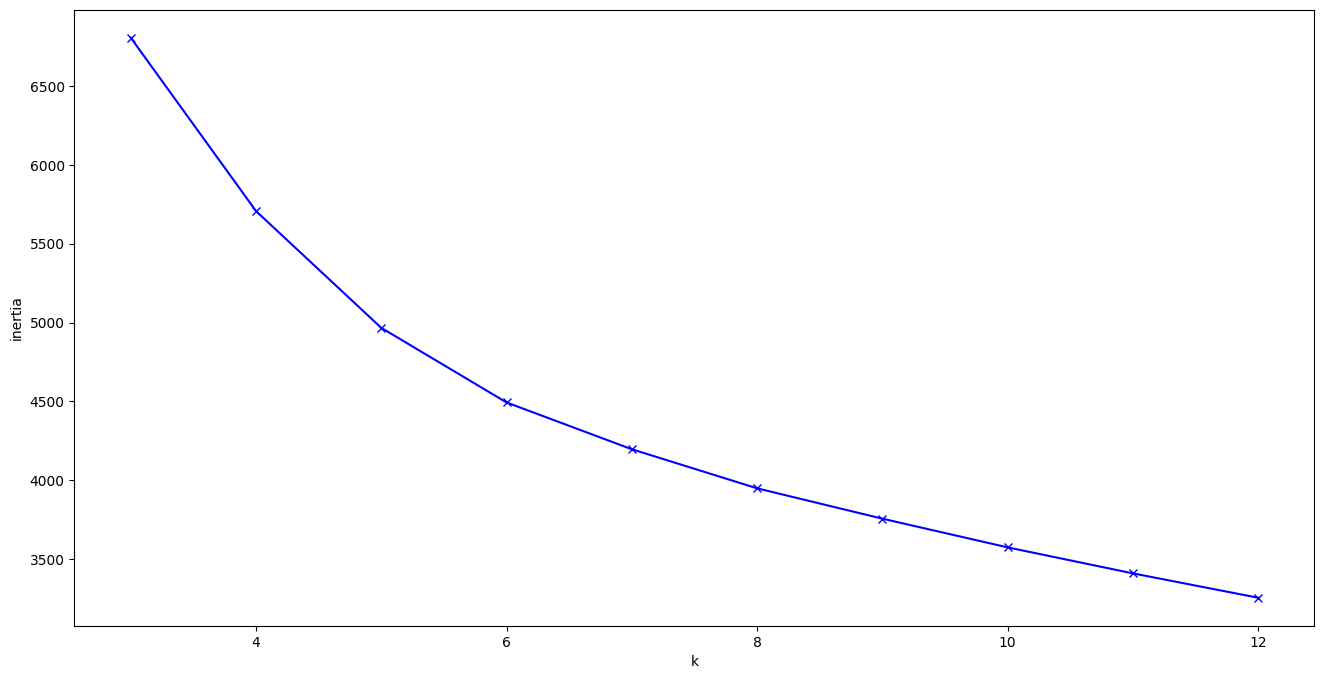

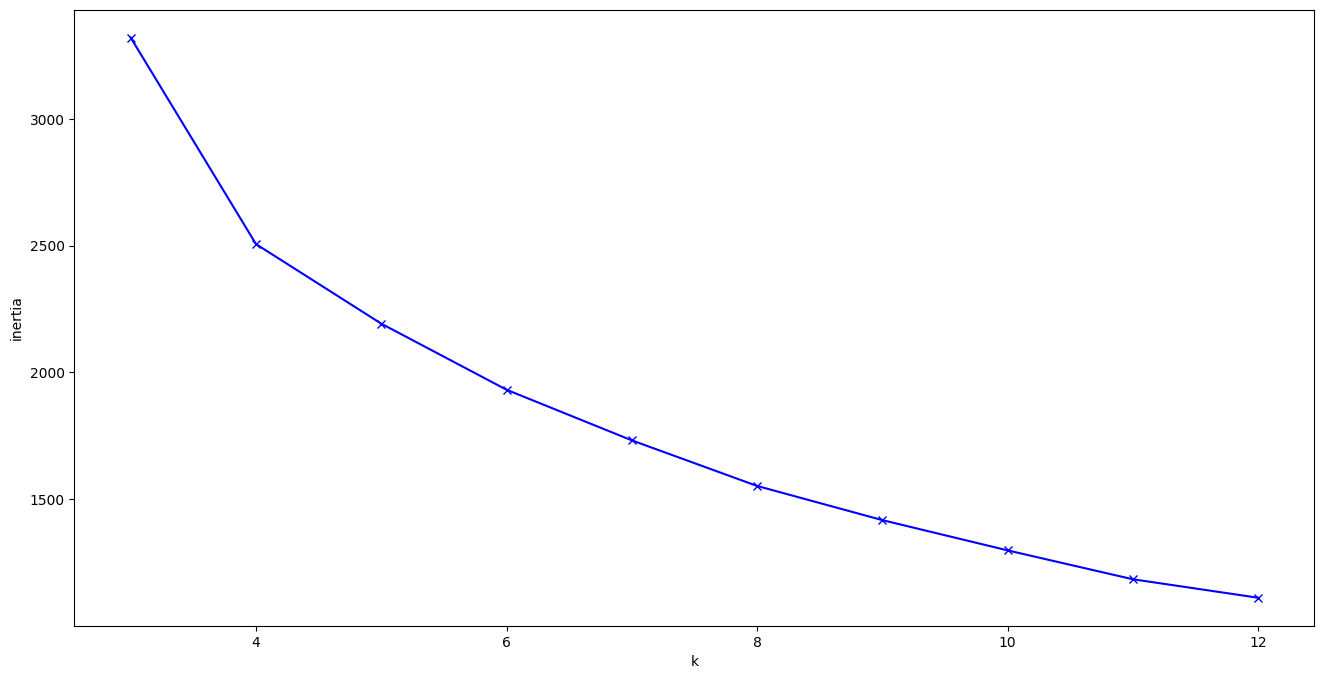

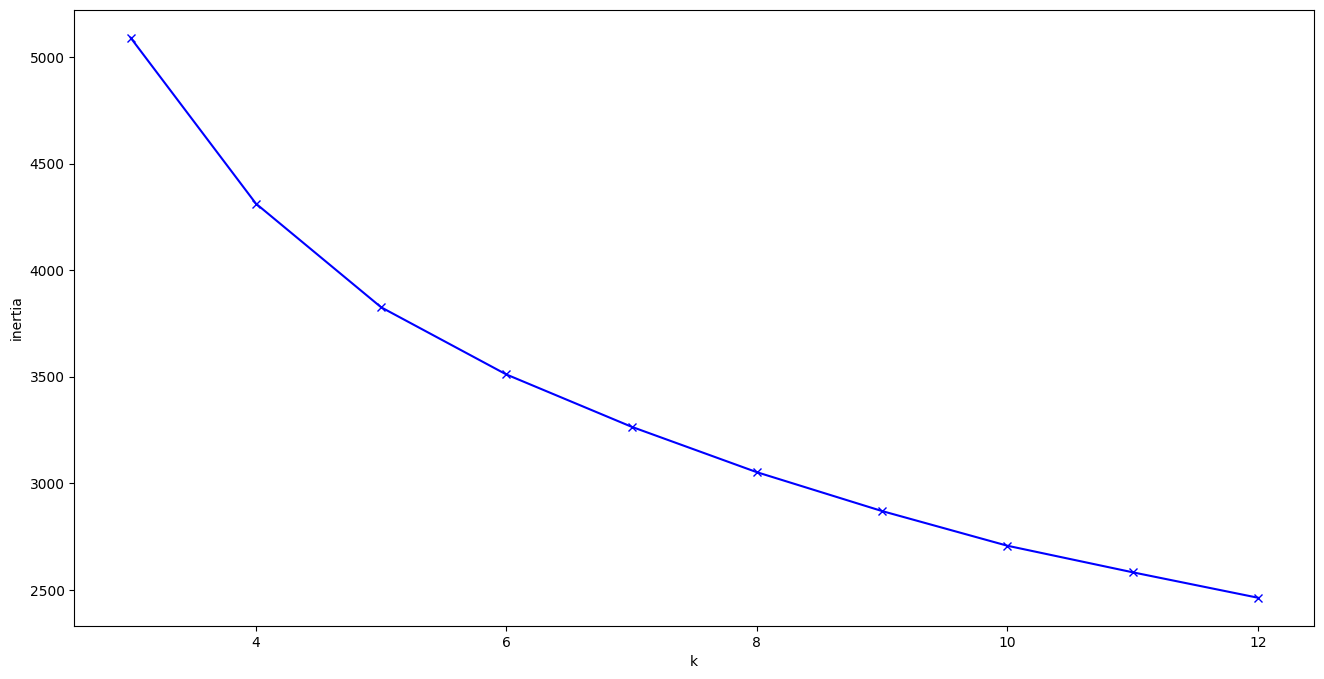

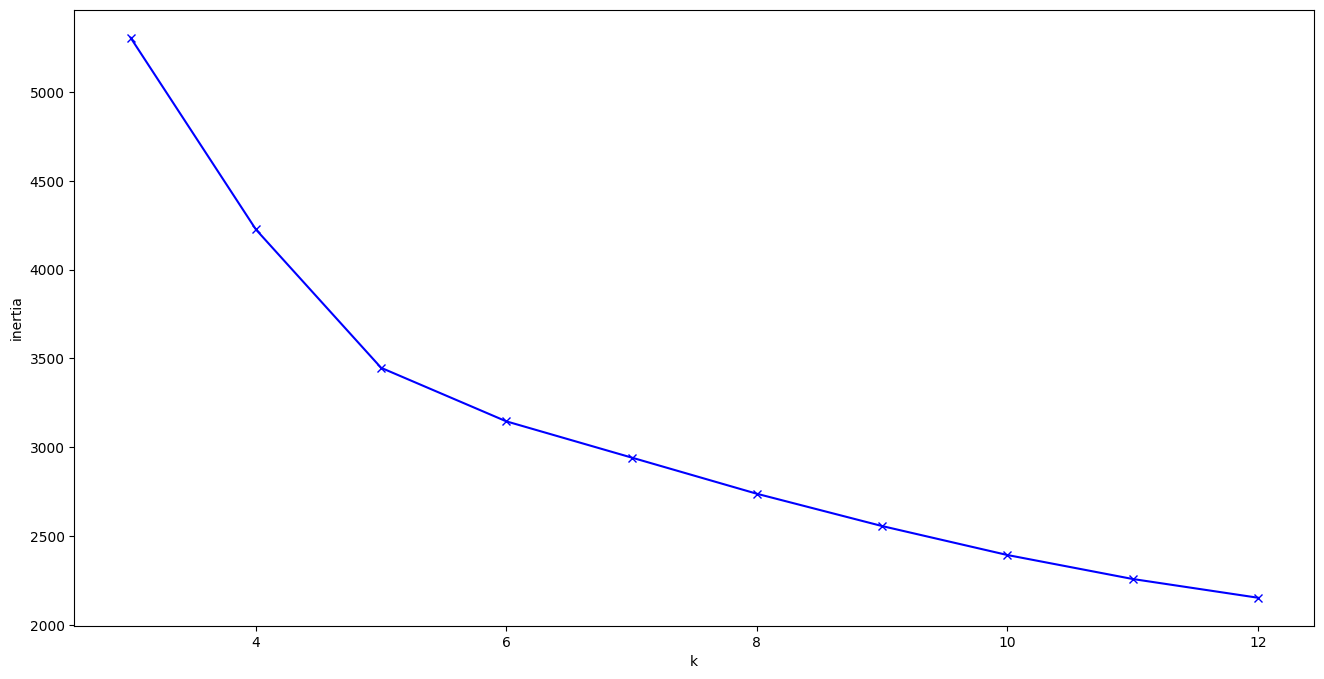

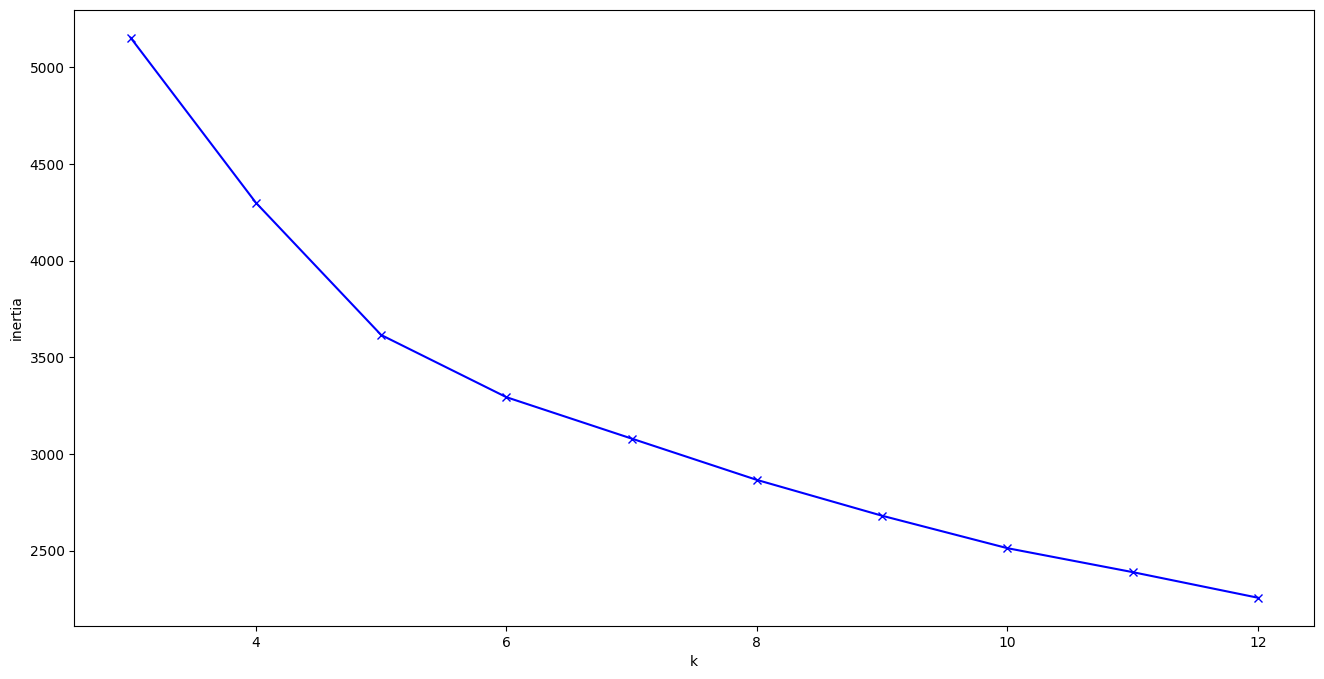

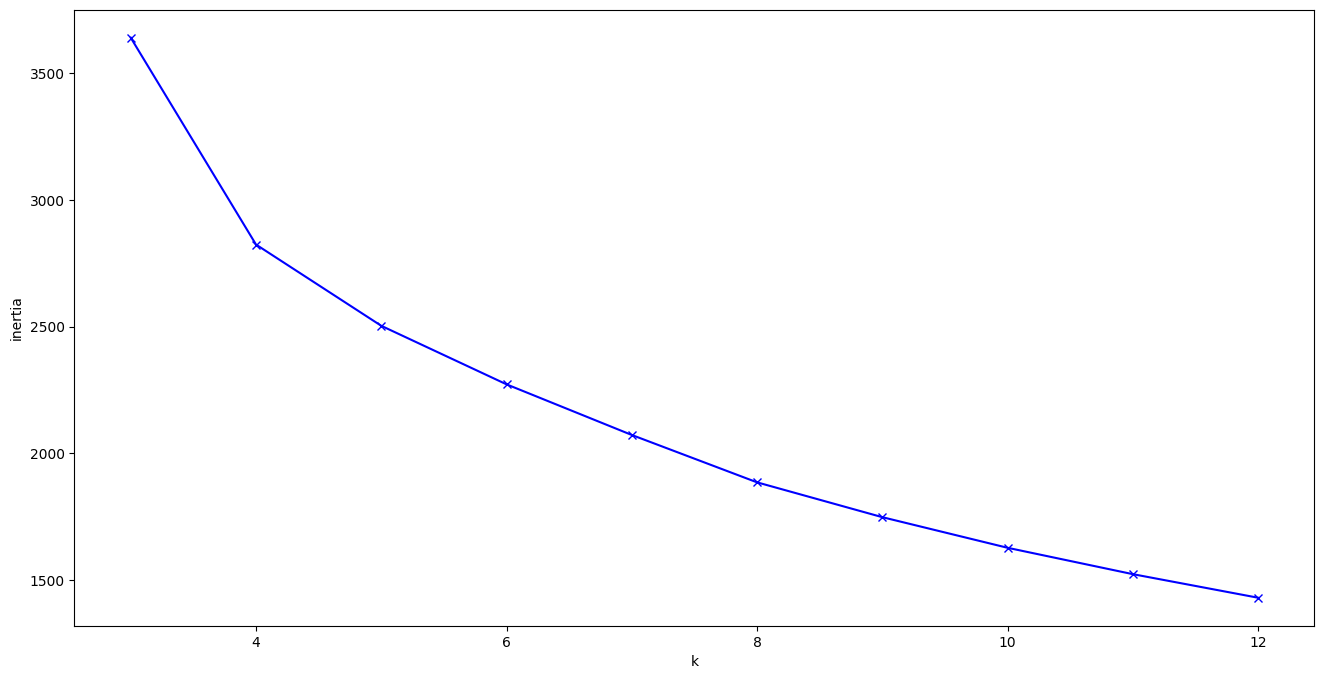

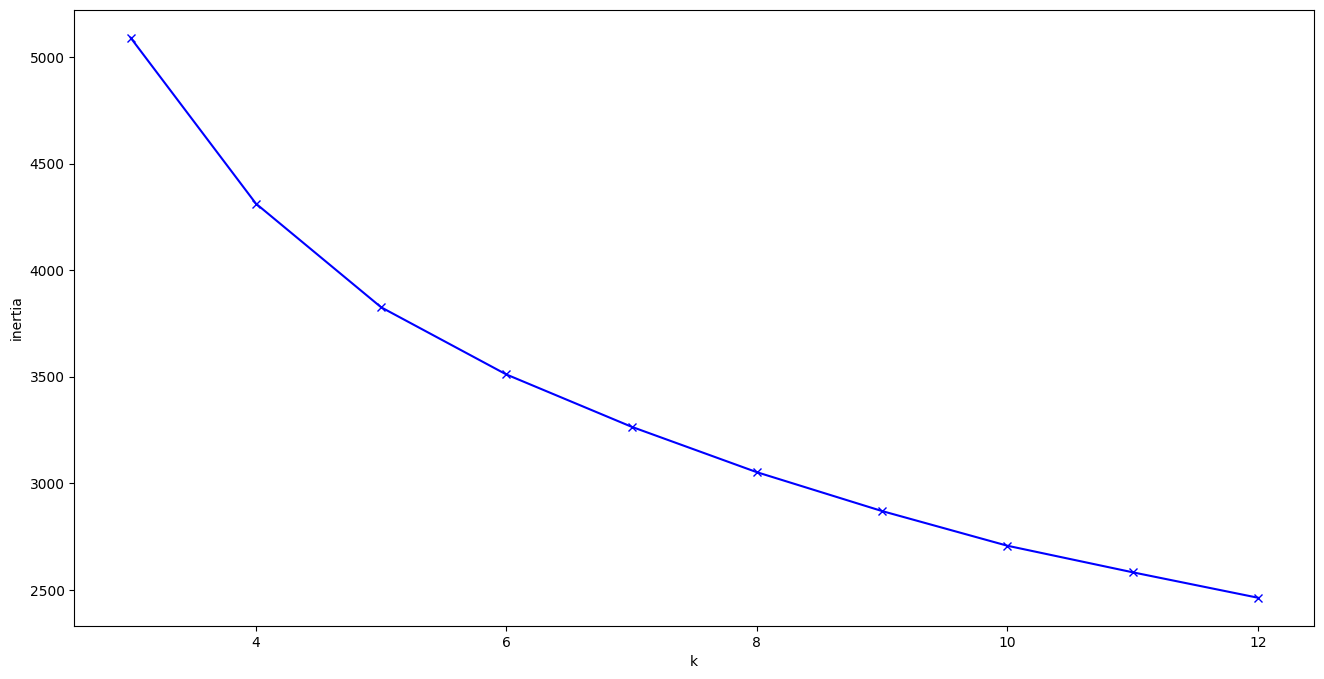

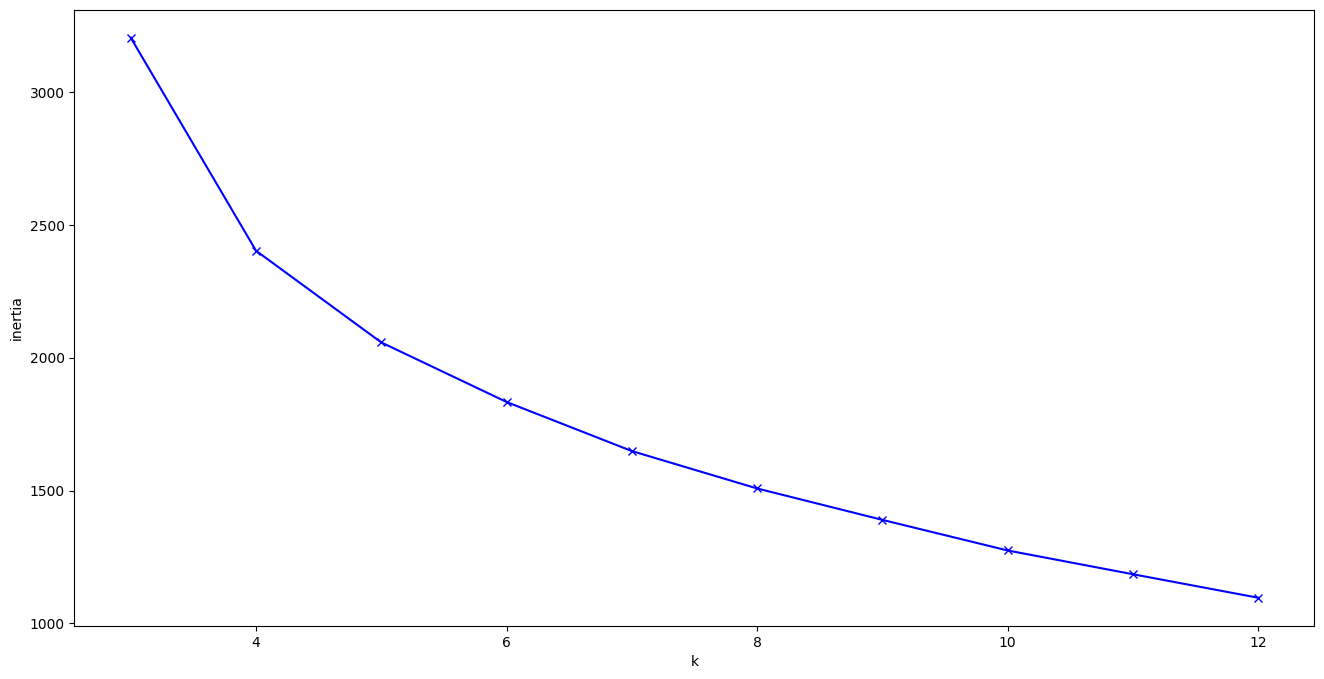

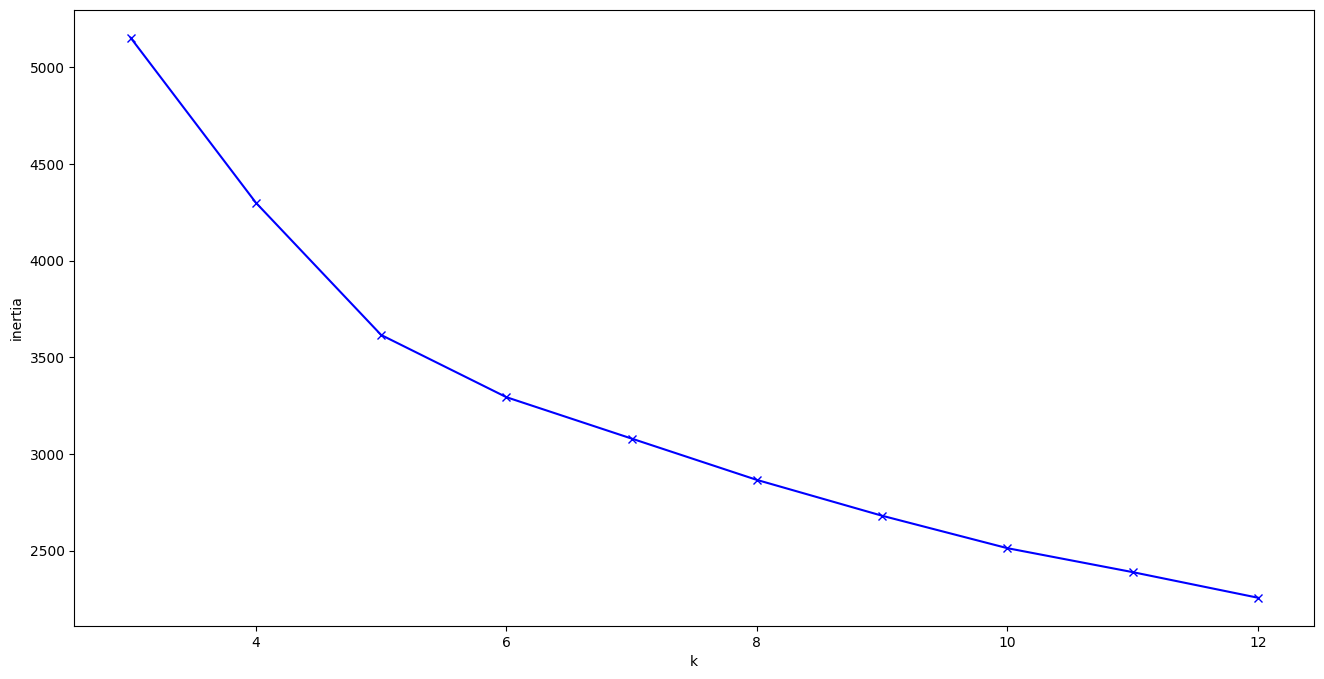

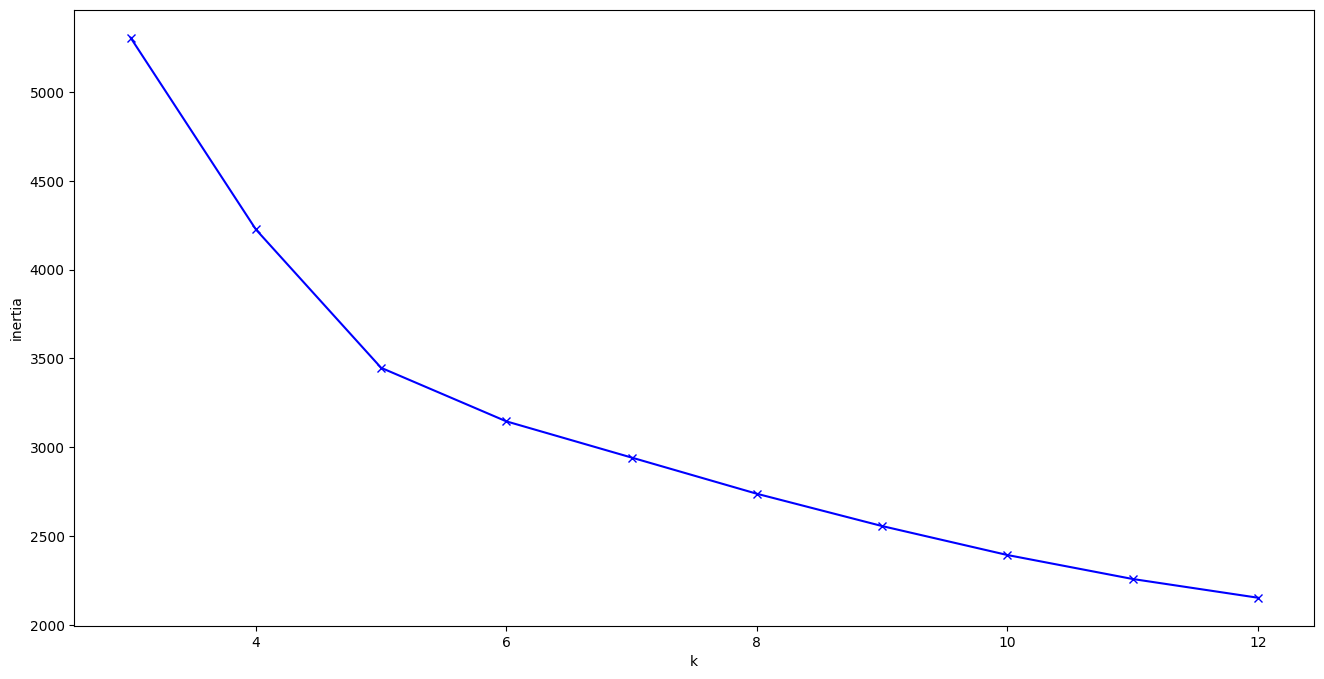

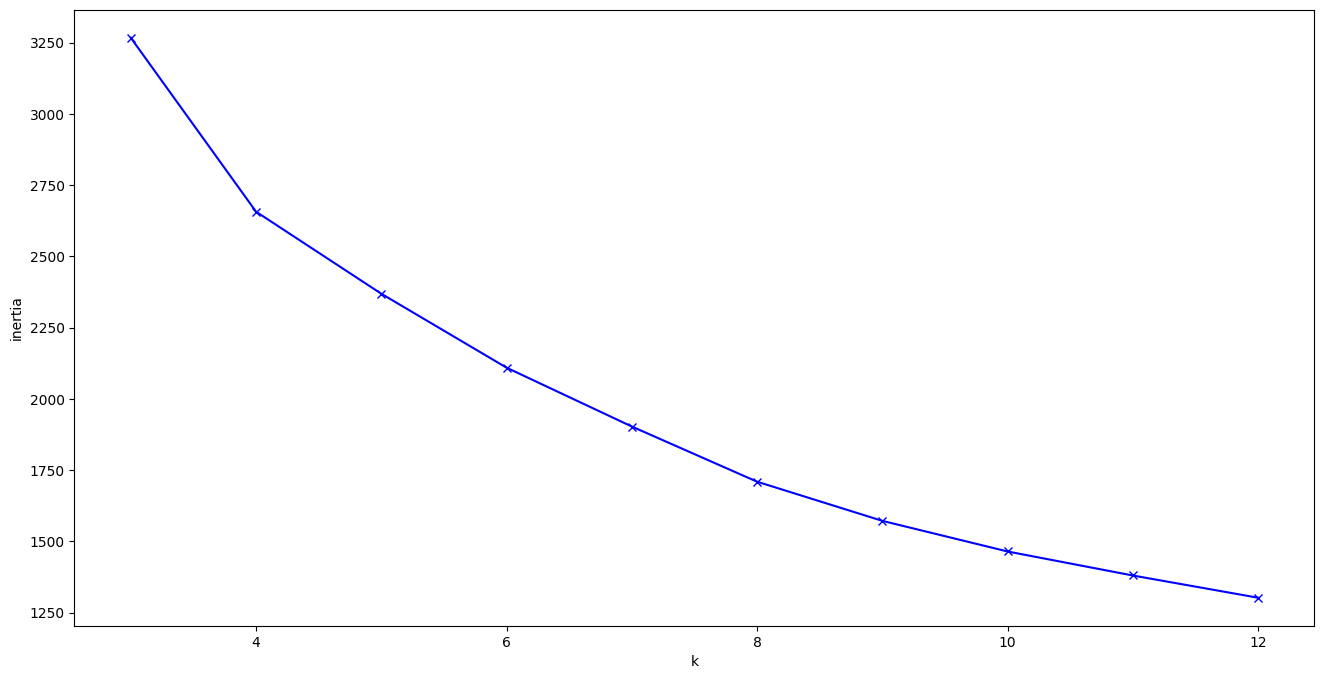

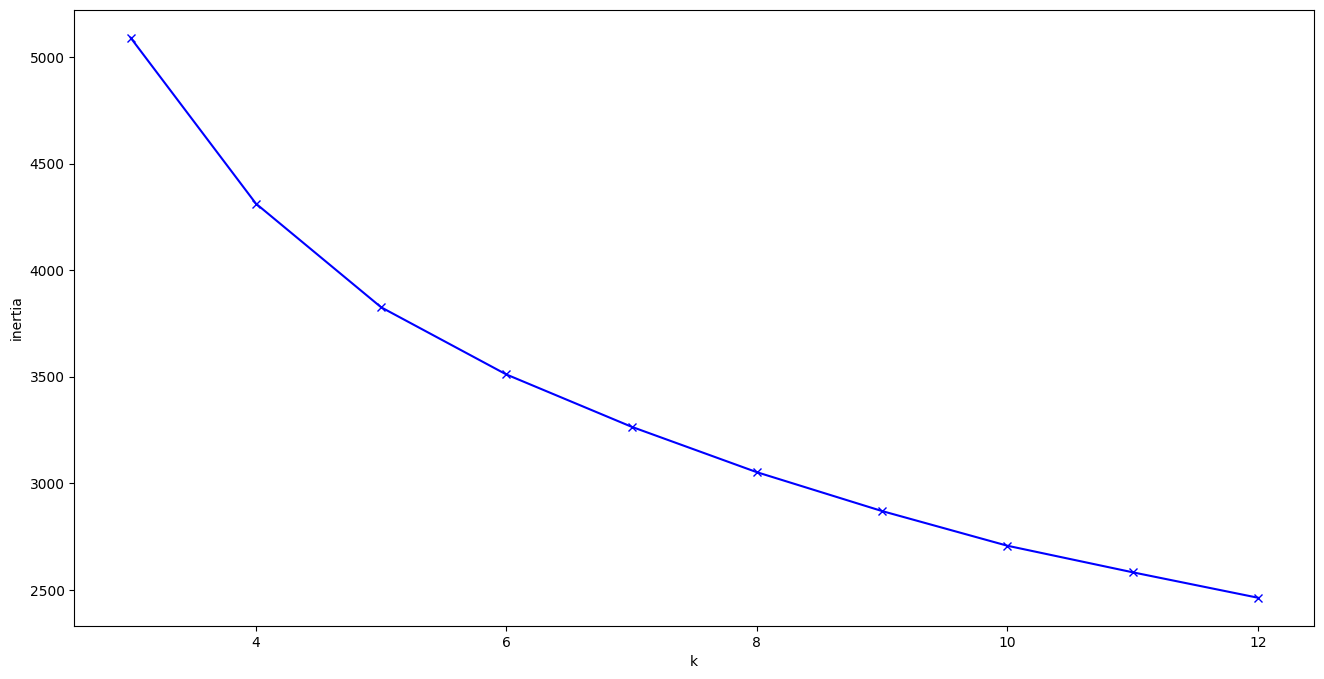

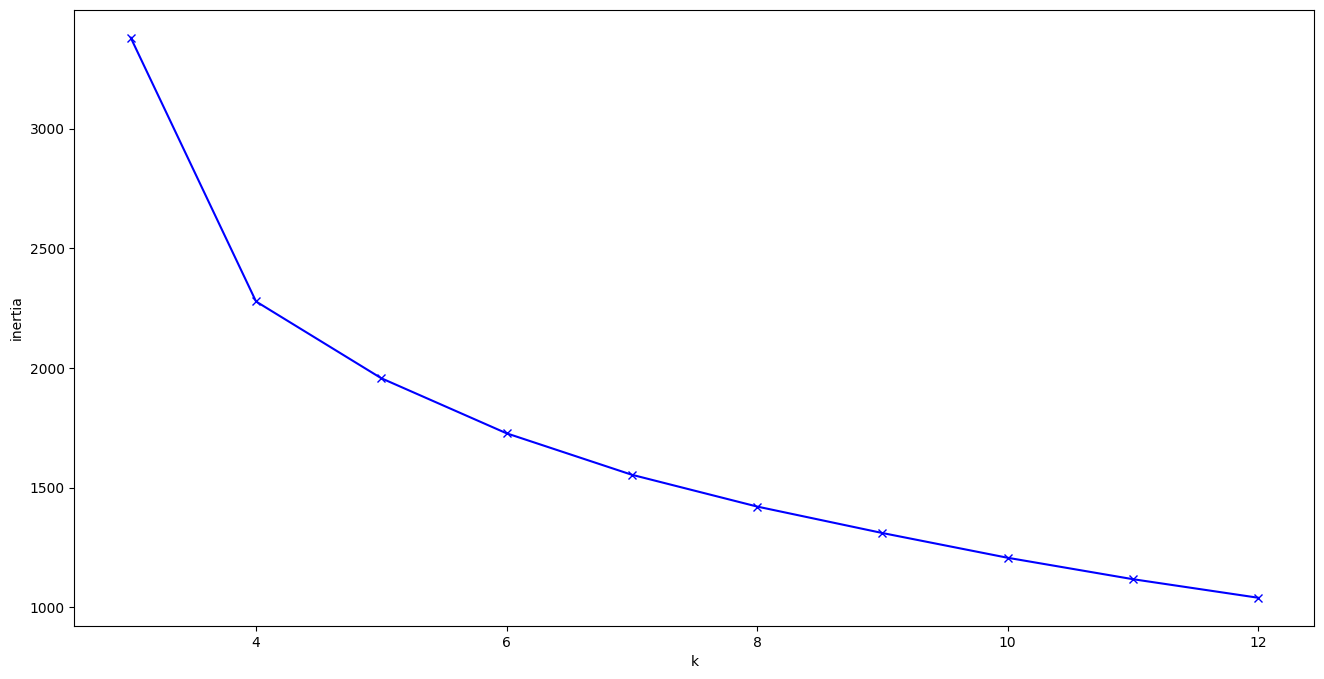

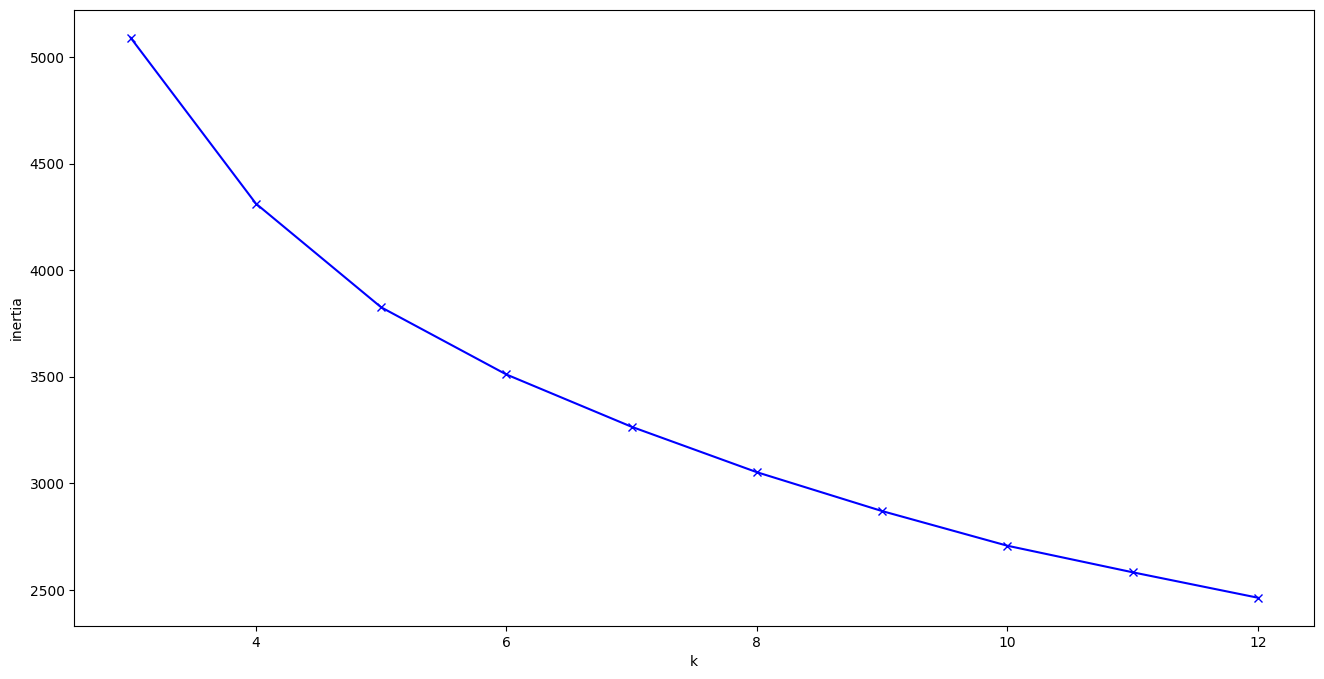

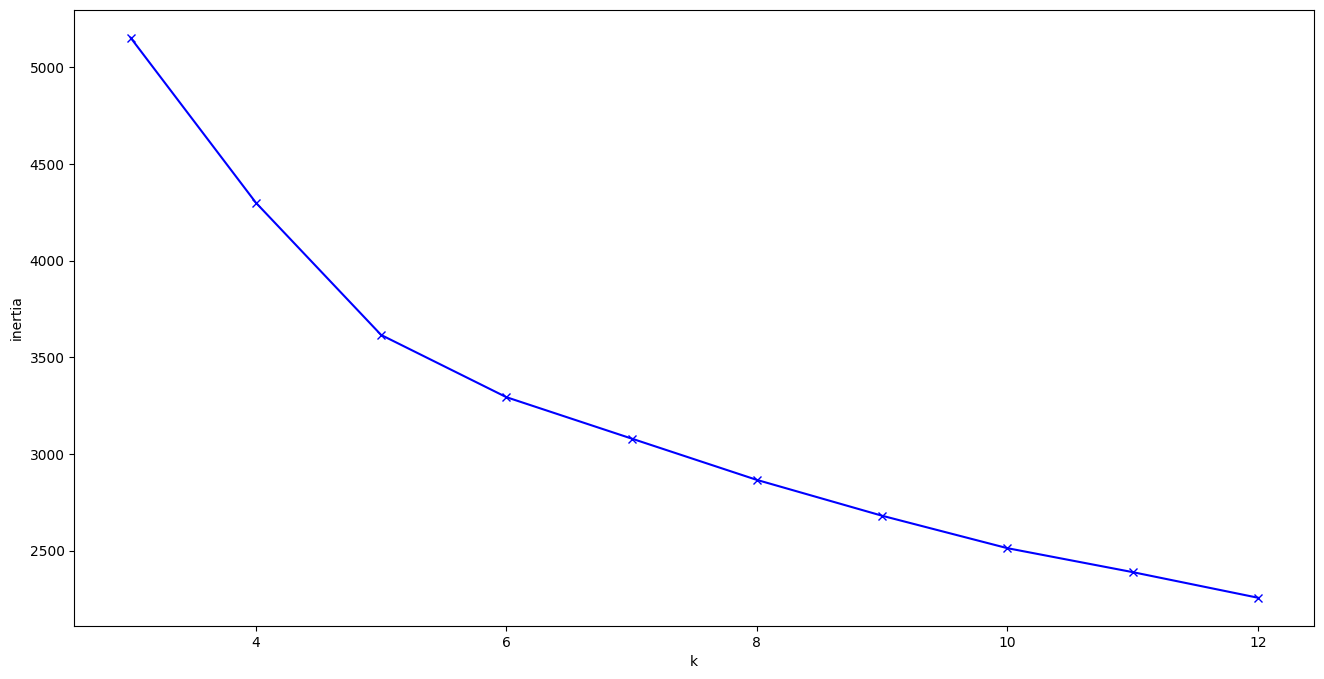

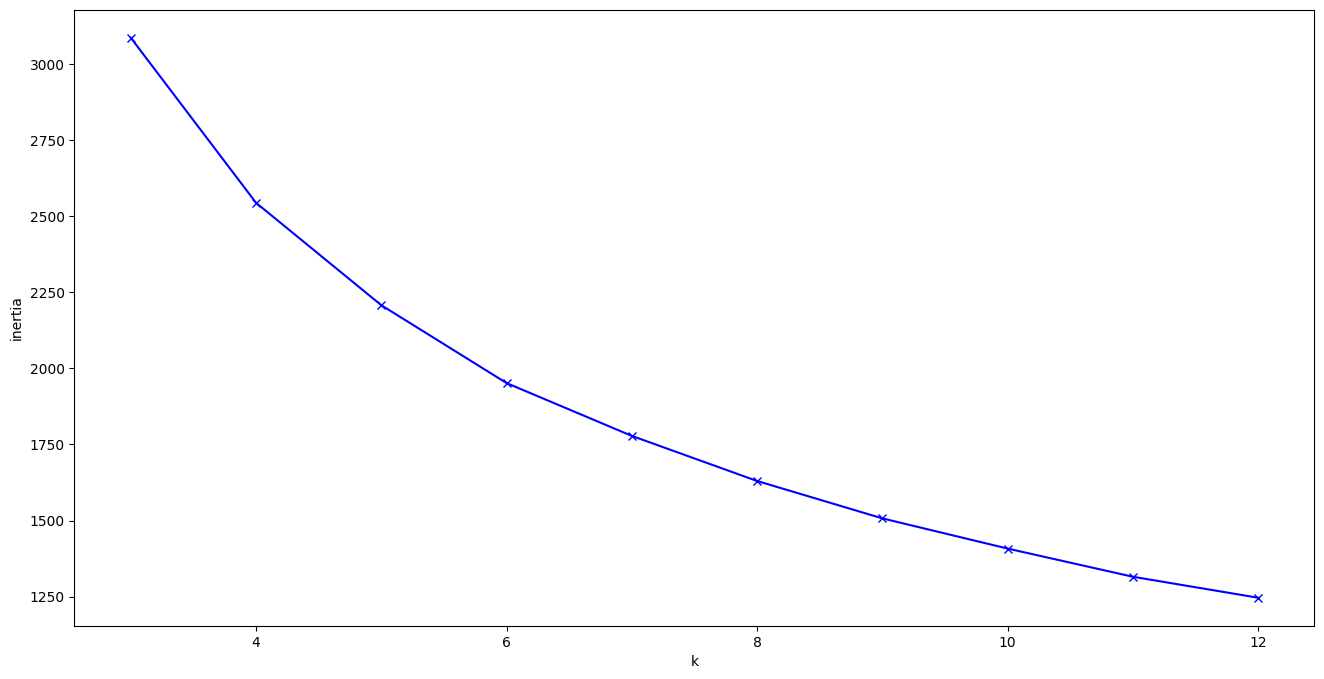

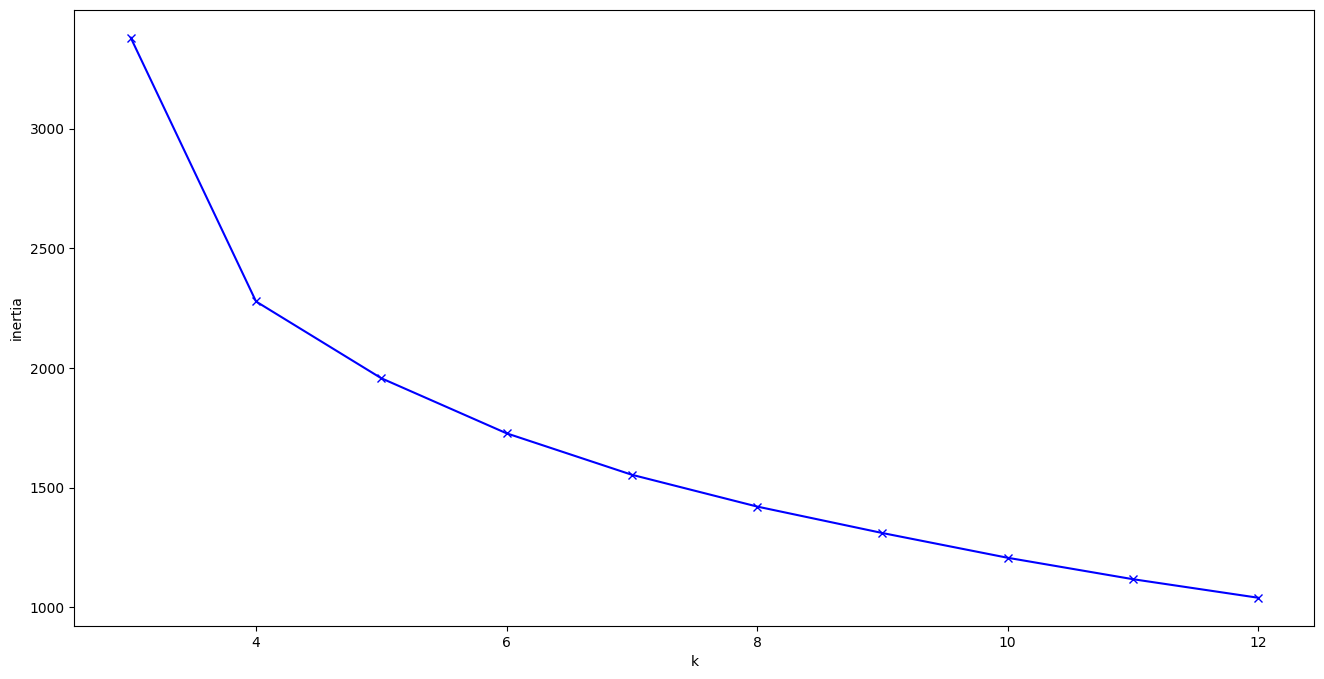

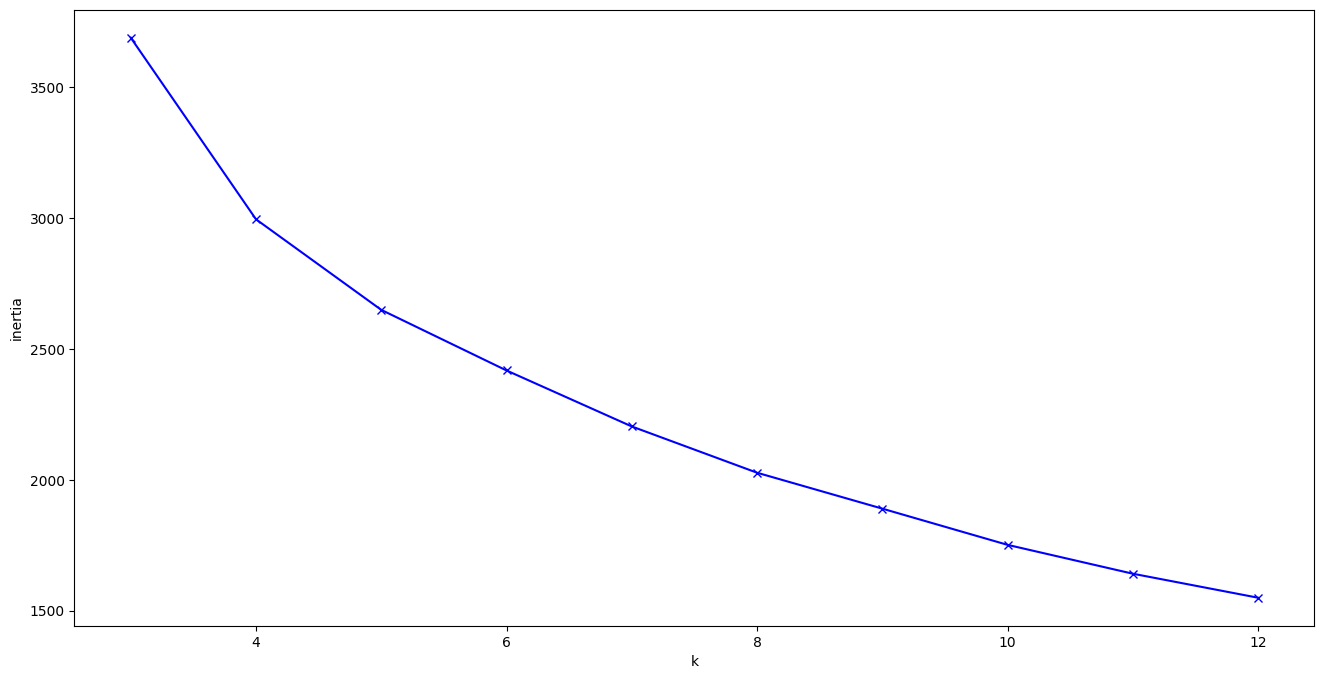

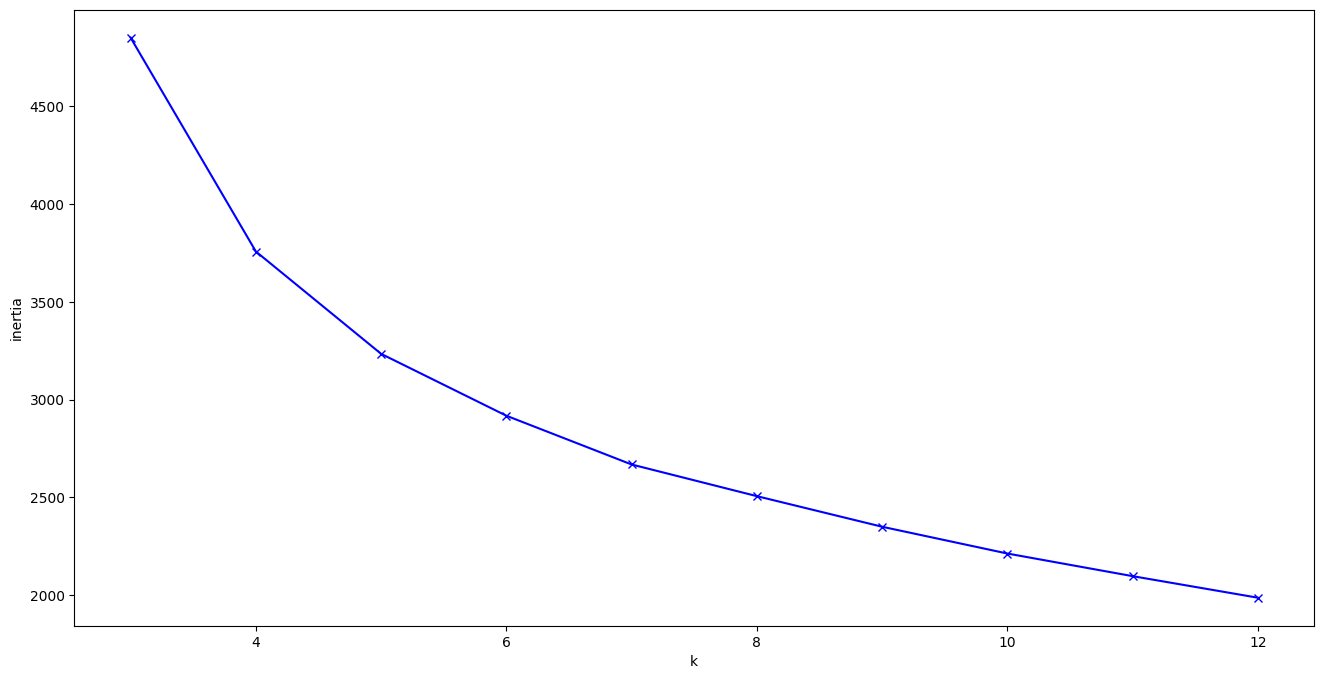

In [327]:
import time
import random

df_cluster['item'] = df_items['item']
df_cluster.set_index('item', inplace=True)

if 'cluster' in df_cluster.columns:
  df_cluster.drop(columns='cluster', inplace=True)

features_clusters = df_cluster.columns

forbidden_features = ['total_supply', 'price_mean', 'sale_mean']

features_clusters = list(set(features_clusters) - set(forbidden_features))

df_cluster_filtred = df_cluster[df_cluster['total_supply'] > 2000]

pipe_line = Pipeline([('scaler', StandardScaler())])

df_cluster_scaled_filtred = pipe_line.fit_transform(df_cluster_filtred)

n_tries = 19
set_k = range(3, 13)
dict_clustering = {}
dict_try = {}
n_inizializations = 50
full_experiment = 0


for i_try in range(n_tries):
  n_features = random.randint(3, len(features_clusters) - full_experiment)
  if (n_features == len(features_clusters) and (full_experiment == 0)) :
    full_experiment = 1
  selected_features = random.sample(list(features_clusters), n_features)
  df_cluster_reduced_filtred = df_cluster_scaled_filtred[selected_features]
  dict_clustering = {}
  inertia = 0
  for k in set_k:
    for i in range(n_inizializations):
      kmeans = KMeans(n_clusters=k, random_state=i).fit(df_cluster_reduced_filtred)
      if (i == 0 or kmeans.inertia_ < inertia):
#        print(f'best try {i}')
        inertia = kmeans.inertia_
        best_kmeans = kmeans
        dict_clustering[k] = [kmeans.inertia_, n_features, i, selected_features]

  #    dict_clustering[k] = [kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_, selected_features]
  #    dict_try[i_try] = [k, kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_, selected_features]

  dict_try[i_try] = dict_clustering

  fig = plt.figure(figsize= (16,8))
  plt.plot(set_k, [dict_clustering[k][0] for k in set_k], 'bx-')
  plt.xlabel('k')
  plt.ylabel('inertia')
  print(f'Iteracion {i_try + 1}, cantidad de features: {n_features}, features: {selected_features}')


In [329]:
df_tries = pd.DataFrame(dict_try)
df_tries.transpose()

3   \
0   [6804.715613584081, 5, 47, [price_relative_std...   
1   [3319.3842238591938, 3, 38, [Sociability, pric...   
2   [5090.4487737719255, 4, 8, [sale_relative_std,...   
3   [5305.114259136818, 4, 20, [Regionality, Socia...   
4   [5152.420745229626, 4, 1, [sale_relative_std, ...   
5   [3639.2646783193895, 3, 33, [price_relative_st...   
6   [5090.4487737719255, 4, 8, [Regionality, price...   
7   [3203.7853609515764, 3, 0, [Sociability, sale_...   
8   [5152.420745229626, 4, 1, [price_relative_std,...   
9   [5305.114259136818, 4, 20, [Seasonality, price...   
10  [3267.2642095183883, 3, 45, [price_relative_st...   
11  [5090.4487737719255, 4, 8, [sale_relative_std,...   
12  [3379.5402986144363, 3, 5, [Regionality, Seaso...   
13  [5090.448773771925, 4, 8, [Regionality, Season...   
14  [5152.420745229626, 4, 1, [Sociability, sale_r...   
15  [3086.3764667909413, 3, 17, [sale_relative_std...   
16  [3379.5402986144363, 3, 5, [Seasonality, Regio...   
17  [3689.136687072183, 3, 0, [sale_relative_std, ...   
18  [4851.051631974664, 4, 41, [Regionality, Seaso...   

                                                   4   \
0   [5706.2942888268935, 5, 9, [price_relative_std...   
1   [2505.941847041612, 3, 4, [Sociability, price_...   
2   [4312.236934315121, 4, 32, [sale_relative_std,...   
3   [4225.9098950807165, 4, 0, [Regionality, Socia...   
4   [4299.153830808702, 4, 18, [sale_relative_std,...   
5   [2823.637283764661, 3, 19, [price_relative_std...   
6   [4312.236934315122, 4, 32, [Regionality, price...   
7   [2402.3331556851676, 3, 45, [Sociability, sale...   
8   [4299.153830808702, 4, 18, [price_relative_std...   
9   [4225.9098950807165, 4, 0, [Seasonality, price...   
10  [2656.8438088359258, 3, 35, [price_relative_st...   
11  [4312.23693431512, 4, 32, [sale_relative_std, ...   
12  [2277.842913307196, 3, 37, [Regionality, Seaso...   
13  [4312.236934315121, 4, 32, [Regionality, Seaso...   
14  [4299.153830808702, 4, 18, [Sociability, sale_...   
15  [2544.054347771912, 3, 8, [sale_relative_std, ...   
16  [2277.842913307196, 3, 37, [Seasonality, Regio...   
17  [2995.235775013065, 3, 6, [sale_relative_std, ...   
18  [3757.1955658603715, 4, 21, [Regionality, Seas...   

                                                   5   \
0   [4966.524816784428, 5, 45, [price_relative_std...   
1   [2192.5118302427277, 3, 7, [Sociability, price...   
2   [3825.584079988931, 4, 13, [sale_relative_std,...   
3   [3447.1294492777592, 4, 22, [Regionality, Soci...   
4   [3615.1097756995587, 4, 5, [sale_relative_std,...   
5   [2503.2589270865938, 3, 13, [price_relative_st...   
6   [3825.584079988931, 4, 13, [Regionality, price...   
7   [2057.321868332649, 3, 22, [Sociability, sale_...   
8   [3615.1097756995587, 4, 5, [price_relative_std...   
9   [3447.129449277759, 4, 22, [Seasonality, price...   
10  [2368.8911698337433, 3, 9, [price_relative_std...   
11  [3825.58407998893, 4, 13, [sale_relative_std, ...   
12  [1957.1717571446343, 3, 21, [Regionality, Seas...   
13  [3825.58407998893, 4, 13, [Regionality, Season...   
14  [3615.1097756995587, 4, 5, [Sociability, sale_...   
15  [2207.628104308582, 3, 49, [sale_relative_std,...   
16  [1957.1717571446343, 3, 21, [Seasonality, Regi...   
17  [2649.1485136782794, 3, 47, [sale_relative_std...   
18  [3233.580432527667, 4, 45, [Regionality, Seaso...   

                                                   6   \
0   [4493.983542935251, 5, 26, [price_relative_std...   
1   [1932.0371474799456, 3, 49, [Sociability, pric...   
2   [3510.2621560750176, 4, 2, [sale_relative_std,...   
3   [3145.8093945263, 4, 29, [Regionality, Sociabi...   
4   [3293.3696958834216, 4, 2, [sale_relative_std,...   
5   [2272.436474519596, 3, 32, [price_relative_std...   
6   [3510.2621560750176, 4, 2, [Regionality, price...   
7   [1833.319231156392, 3, 29, [Sociability, sale_...   
8   [3293.3696958834216, 4, 2, [price_relative_std...   
9   [3145.8093945263, 4, 29, [Seasonality, price_r...   
1

In [330]:
dict_try[16][6]

[1727.1637743627555, 3, 22, ['Seasonality', 'Regionality', 'Sociability']]

In [345]:
# Examinamos un cluster particular

set_features_selected =    ['Seasonality', 'Regionality', 'Sociability']

k_selected = 6
seed = 22

print(set_features_selected)


df_cluster_filtered = df_cluster[df_cluster['total_supply'] > 2000]

pipe_line = Pipeline([('scaler', StandardScaler())])

df_cluster_scaled_filtered = pipe_line.fit_transform(df_cluster_filtered)


df_cluster_selected_filtered = df_cluster_scaled_filtered[set_features_selected]
kmeans = KMeans(n_clusters=k_selected, random_state=seed).fit(df_cluster_selected_filtered)

df_cluster_filtered['cluster'] = kmeans.labels_
df_cluster_filtered.reset_index(inplace=True)
df_cluster_filtered.groupby('cluster').agg({'item': 'count', 'sale_mean': 'mean', 'sale_relative_std': 'mean', 'price_mean': 'mean', 'price_relative_std': 'mean', 'total_supply': 'mean', 'Regionality': 'mean', 'Seasonality': 'mean', 'Sociability': 'mean' })


['Seasonality', 'Regionality', 'Sociability']


/tmp/ipython-input-4233827231.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_filtered['cluster'] = kmeans.labels_


item  sale_mean  sale_relative_std  price_mean  price_relative_std  \
cluster                                                                       
0         684   8.585822           0.989641    5.828956            0.042542   
1         138  16.955080           1.178023    3.442295            0.068150   
2         112   8.256385           1.525127    5.989782            0.060421   
3         611  10.946818           0.960241    4.983016            0.042386   
4         262  12.167185           1.169629    6.530220            0.048356   
5         268   7.965700           1.226900    5.728569            0.053712   

         total_supply  Regionality  Seasonality  Sociability  
cluster                                                       
0         2609.501462     0.257179     0.055484     0.909357  
1         2679.746377     0.215274     0.114775     9.811594  
2         2624.107143     0.237747     0.339661     1.598214  
3         2566.217676     0.112510     0.066570     0.824877  
4         2601.190840     0.420958     0.083390     1.061069  
5         2601.861940     0.211798     0.165962     1.264925

### Features finales

In [374]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

def calculate_trend_slope(df):
    # 1. Agrupar por Item y Semana (Sumando ventas de todas las tiendas)
    # Esto crea una serie temporal única para cada producto
    weekly_sales = df.groupby(['item', 'yearweek'])['sale'].sum().reset_index()

    # 2. Asegurarnos de que el orden temporal es correcto
    weekly_sales = weekly_sales.sort_values(['item', 'yearweek'])

    # Lista para guardar resultados
    items = []
    slopes = []

    # 3. Iterar por cada item (es rápido para 3049 items)
    for item_id, group in weekly_sales.groupby('item'):
        y = group['sale'].values

        # Si el producto tiene muy pocos datos (< 4 semanas), la tendencia es ruido.
        # Le asignamos 0 (estable) o lo descartamos.
        if len(y) < 4:
            items.append(item_id)
            slopes.append(0)
            continue

        # x es simplemente una secuencia [0, 1, 2, ... n]
        x = np.arange(len(y))

        # Calculamos la regresión lineal
        # slope = cuánto cambia la venta por cada semana que pasa
        slope, intercept, r_value, p_value, std_err = linregress(x, y)

        # 4. NORMALIZACIÓN CRÍTICA
        # Dividimos la pendiente por la media de ventas.
        # Esto convierte el valor en "% de cambio relativo"
        mean_sale = np.mean(y)

        # Evitar división por cero si la media es 0 (casos raros)
        if mean_sale == 0:
            normalized_slope = 0
        else:
            normalized_slope = slope / mean_sale *100

        items.append(item_id)
        slopes.append(normalized_slope)

    # Crear el DataFrame final
    trend_df = pd.DataFrame({
        'item': items,
        '%trend_slope': slopes
    })

    return trend_df

# Uso:
df_trends = calculate_trend_slope(df)
print(df_trends.head())

               item  %trend_slope
0  ACCESORIES_1_001      0.364498
1  ACCESORIES_1_002      0.046532
2  ACCESORIES_1_003      0.978326
3  ACCESORIES_1_004      0.030561
4  ACCESORIES_1_005     -0.037274


In [375]:
df_trends.sort_values('%trend_slope', ascending=False)

item  %trend_slope
2520    SUPERMARKET_3_296      2.994023
832   HOME_&_GARDEN_1_274      2.596979
801   HOME_&_GARDEN_1_242      2.509866
180      ACCESORIES_1_186      2.314906
2079    SUPERMARKET_2_253      2.290955
...                   ...           ...
611   HOME_&_GARDEN_1_049     -1.988171
1787    SUPERMARKET_1_179     -2.066782
2871    SUPERMARKET_3_647     -2.140383
2228    SUPERMARKET_3_003     -2.214350
326      ACCESORIES_1_335     -2.267604

[3049 rows x 2 columns]

<Axes: >

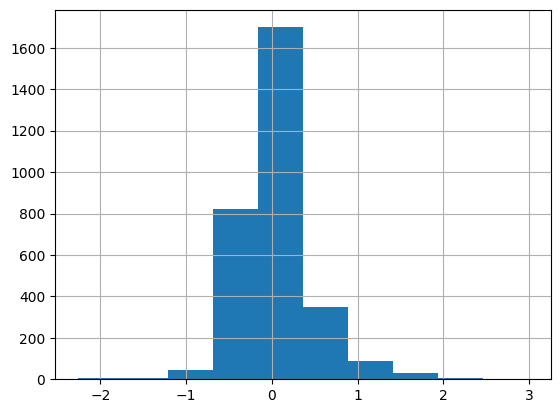

In [376]:
df_trends['%trend_slope'].hist()

In [349]:
def calculate_price_elasticity_proxy(df):
    items = []
    elasticities = []

    # Agrupamos por item
    for item_id, group in df.groupby('item'):
        # Validación crítica: ¿El precio cambió alguna vez?
        if group['sell_price'].std() == 0:
            # Si el precio es fijo, la elasticidad es "neutral" (0) para fines prácticos
            # o podrías marcarlo como un valor aparte. Usaremos 0 por simplicidad.
            elasticity = 0
        else:
            # Usamos Spearman porque captura relaciones no lineales mejor
            elasticity = group['sale'].corr(group['sell_price'], method='spearman')

            # Si da NaN por alguna razón matemática rara, lo volvemos 0
            if pd.isna(elasticity):
                elasticity = 0

        items.append(item_id)
        elasticities.append(elasticity)

    return pd.DataFrame({'item': items, 'price_elasticity': elasticities})

In [350]:
df_elasticity = calculate_price_elasticity_proxy(df)

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


In [351]:
df_elasticity.sort_values('price_elasticity', ascending=True)

item  price_elasticity
1778  SUPERMARKET_1_170         -0.642578
345    ACCESORIES_1_354         -0.640369
2402  SUPERMARKET_3_178         -0.627901
2719  SUPERMARKET_3_495         -0.604628
314    ACCESORIES_1_323         -0.594151
...                 ...               ...
2164  SUPERMARKET_2_338          0.529441
2058  SUPERMARKET_2_232          0.533430
2082  SUPERMARKET_2_256          0.610185
2754  SUPERMARKET_3_530          0.639092
153    ACCESORIES_1_158          0.666544

[3049 rows x 2 columns]

<Axes: >

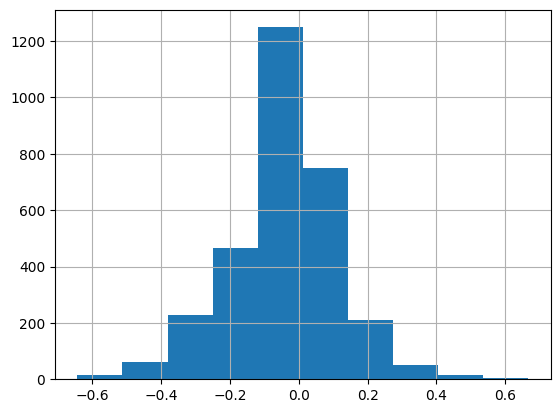

In [352]:
df_elasticity['price_elasticity'].hist()

In [399]:
df_cluster = pd.merge(df_cluster, df_trends, on='item', how='left')
df_cluster = pd.merge(df_cluster, df_elasticity, on='item', how='left')

In [400]:
df_cluster

item  sale_mean  sale_relative_std  price_mean  \
0      ACCESORIES_1_001   2.769283           0.857783   11.032755   
1      ACCESORIES_1_002   1.881369           1.193173    5.275708   
2      ACCESORIES_1_003   1.266549           1.282652    3.944125   
3      ACCESORIES_1_004  14.152818           0.920167    5.983299   
4      ACCESORIES_1_005   5.559316           0.937182    3.832119   
...                 ...        ...                ...         ...   
3044  SUPERMARKET_3_823   5.767616           1.693232    3.344609   
3045  SUPERMARKET_3_824   2.983871           1.209534    3.026692   
3046  SUPERMARKET_3_825   4.853247           1.142279    4.934385   
3047  SUPERMARKET_3_826   7.612742           0.753482    1.535790   
3048  SUPERMARKET_3_827  11.480323           1.317505    1.199395   

      price_relative_std  total_supply  Sociability  Regionality  Seasonality  \
0               0.020250          1478            0     0.400899     0.150287   
1               0.019748          2689            0     0.366412     0.127449   
2               0.050452          1133            0     0.178200     0.104309   
3               0.045653          2768            1     0.315894     0.030596   
4               0.059570          2630            0     0.212243     0.097256   
...                  ...           ...          ...          ...          ...   
3044            0.068441          2668            1     0.426184     0.178674   
3045            0.084561          2790            9     0.255315     0.181700   
3046            0.048968          2787           17     0.087434     0.102321   
3047            0.005468          1601            0     0.128765     0.141586   
3048            0.015891           991            0     0.365767     0.145406   

      %trend_slope  price_elasticity  
0         0.364498         -0.289755  
1         0.046532         -0.113930  
2         0.978326         -0.003030  
3         0.030561          0.069675  
4        -0.037274         -0.095893  
...            ...               ...  
3044      0.127681         -0.162802  
3045     -0.582225         -0.014319  
3046      0.089460         -0.290361  
3047     -0.053887         -0.112970  
3048      1.168236         -0.028246  

[3049 rows x 11 columns]

Iteracion 1, cantidad de features: 5, features: ['Regionality', 'Sociability', 'price_elasticity', 'sale_mean', '%trend_slope']
Iteracion 2, cantidad de features: 6, features: ['Regionality', '%trend_slope', 'price_elasticity', 'Seasonality', 'sale_mean', 'Sociability']
Iteracion 3, cantidad de features: 5, features: ['Seasonality', '%trend_slope', 'sale_mean', 'Sociability', 'price_elasticity']
Iteracion 4, cantidad de features: 5, features: ['Seasonality', 'price_elasticity', 'sale_mean', 'Sociability', '%trend_slope']
Iteracion 5, cantidad de features: 5, features: ['price_elasticity', 'sale_relative_std', 'sale_mean', 'Seasonality', 'Sociability']
Iteracion 6, cantidad de features: 4, features: ['sale_mean', 'Sociability', 'Seasonality', '%trend_slope']
Iteracion 7, cantidad de features: 3, features: ['Sociability', 'sale_relative_std', '%trend_slope']
Iteracion 8, cantidad de features: 4, features: ['Seasonality', 'Sociability', 'sale_mean', '%trend_slope']
Iteracion 9, cantidad d

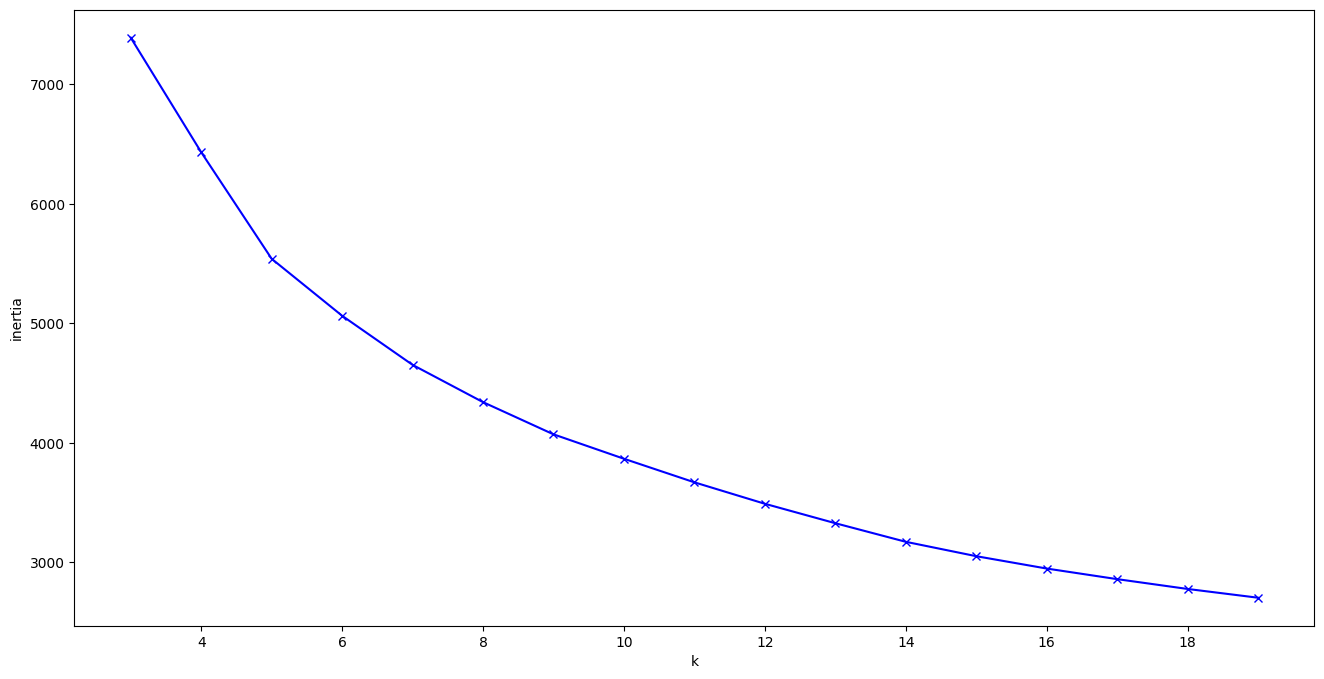

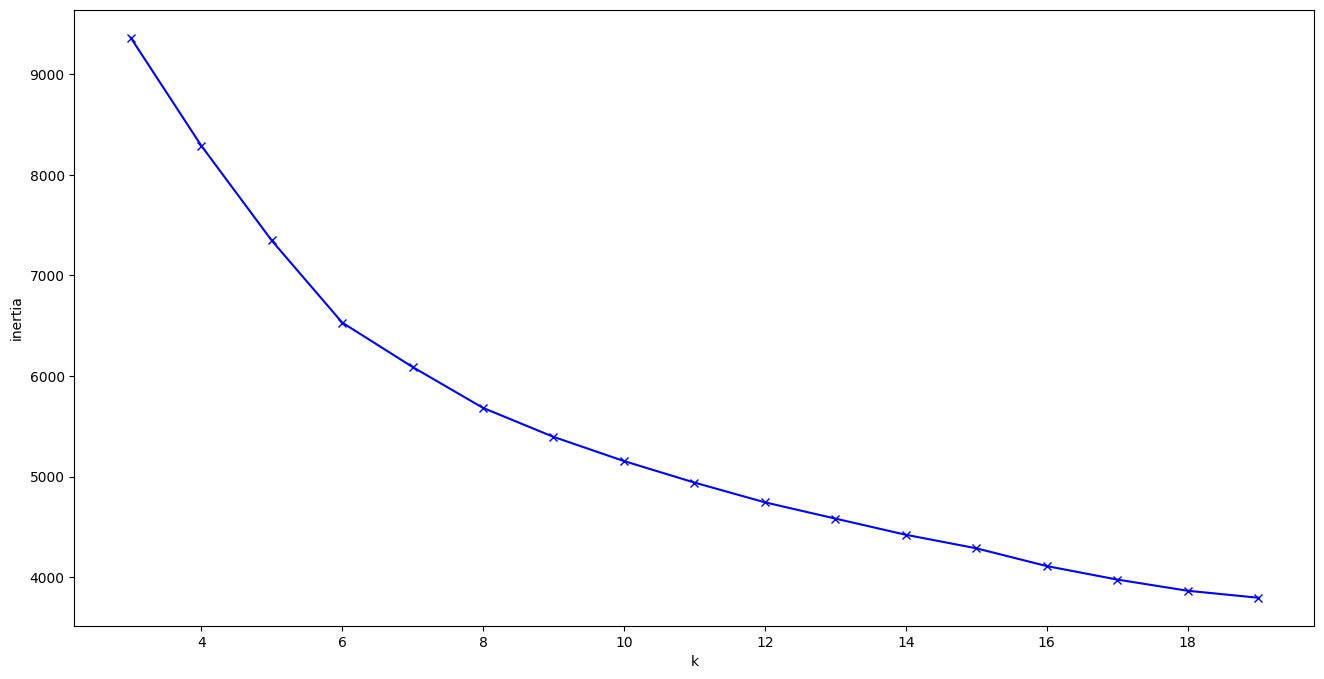

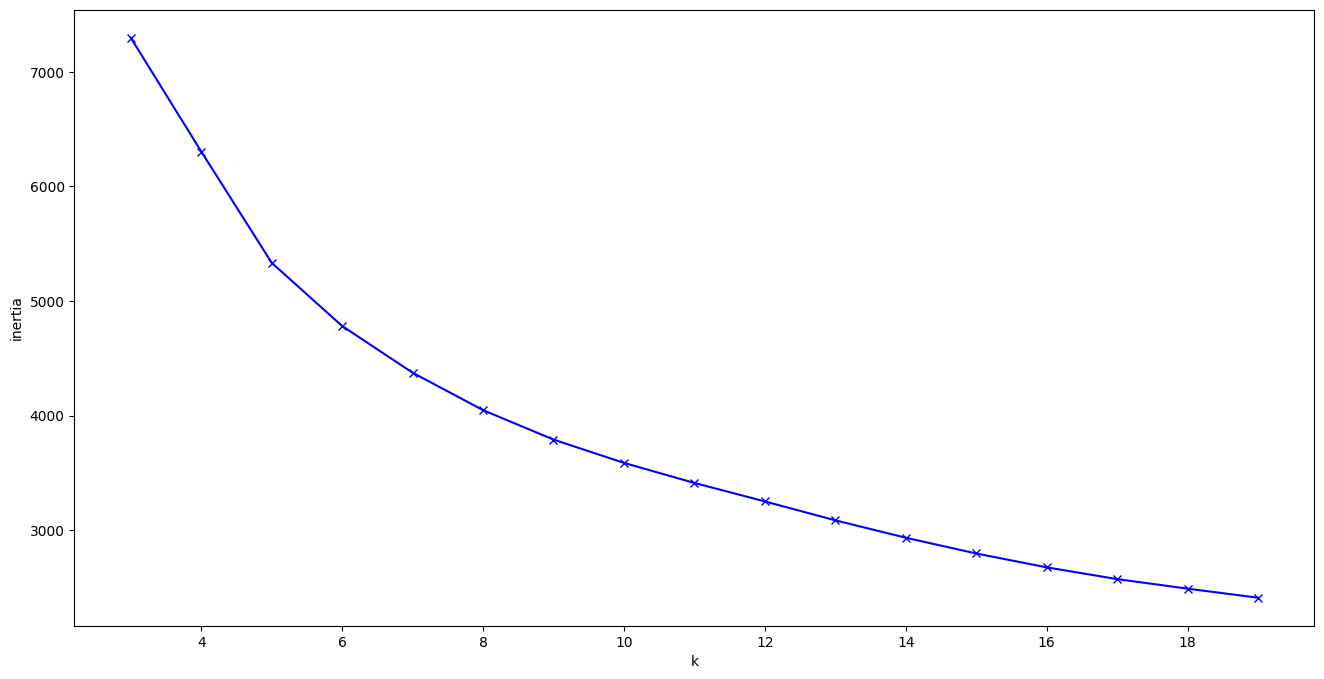

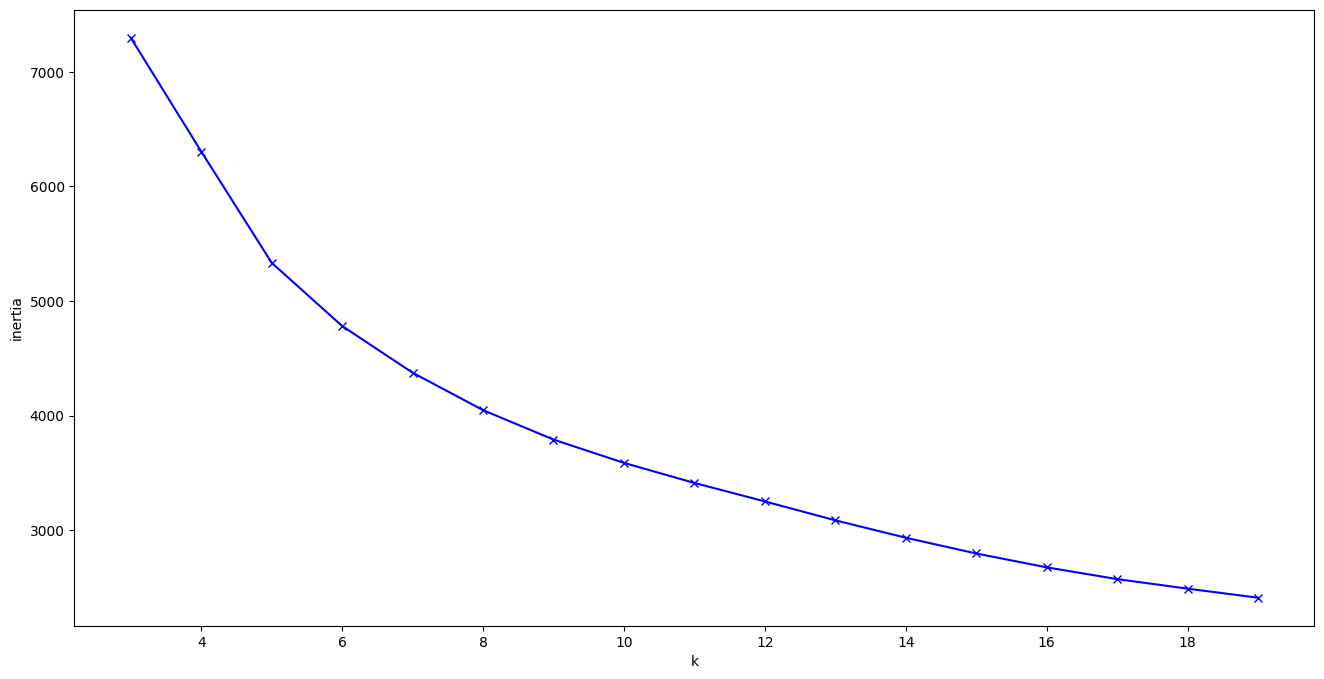

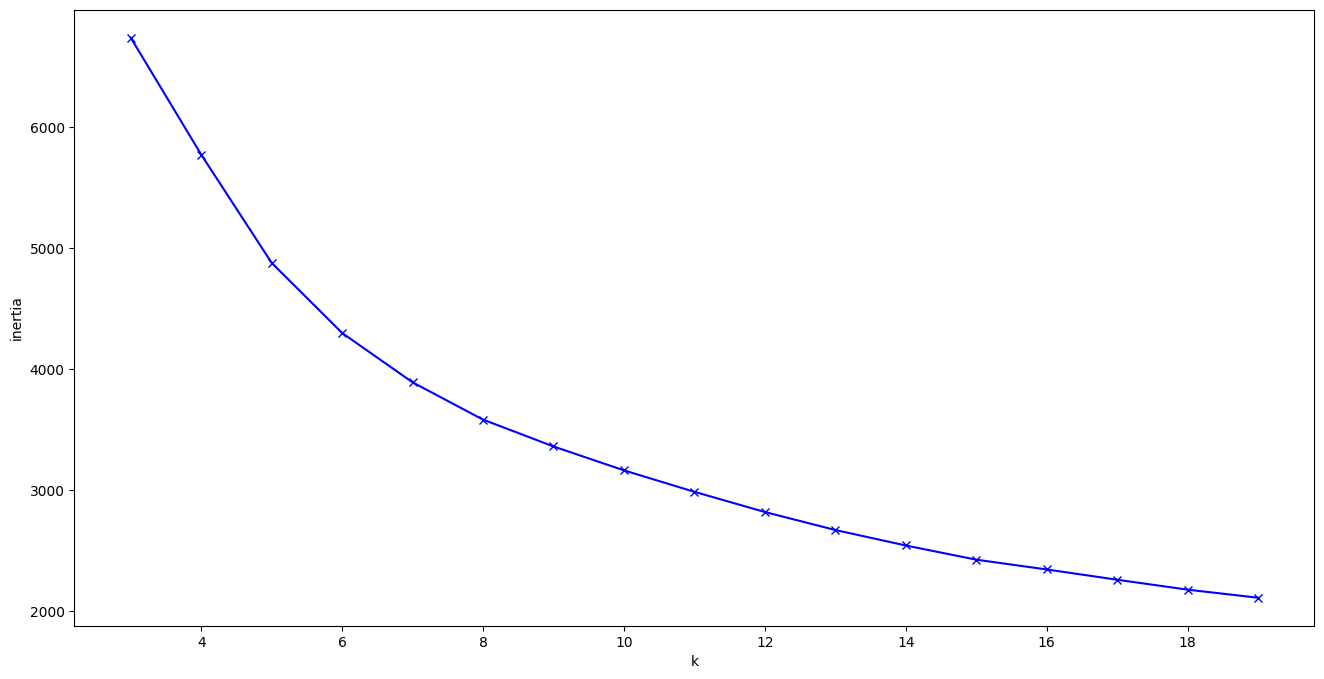

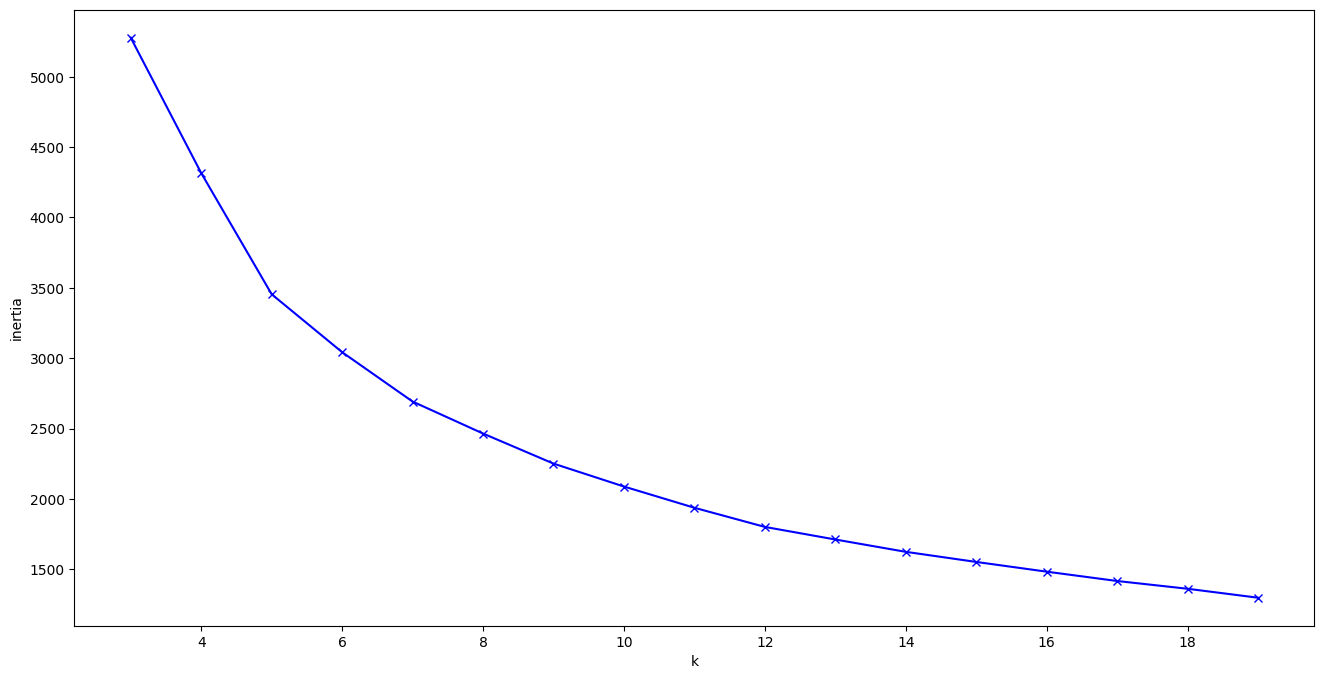

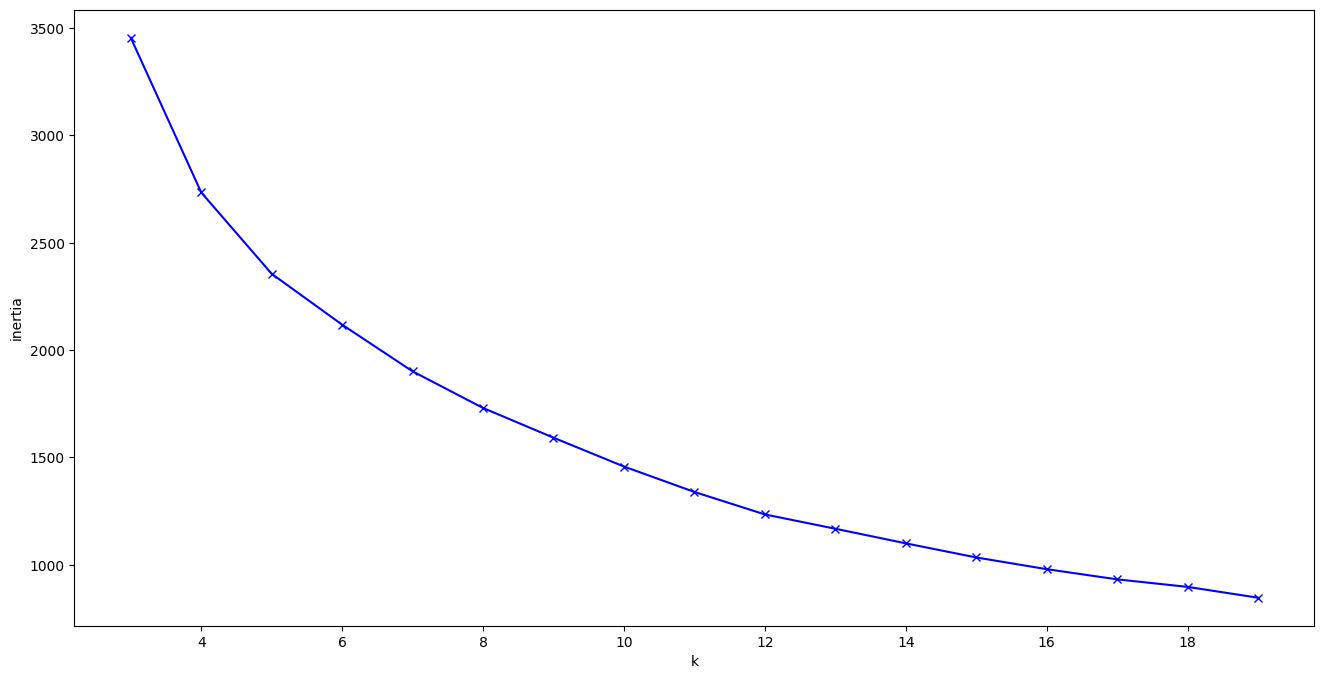

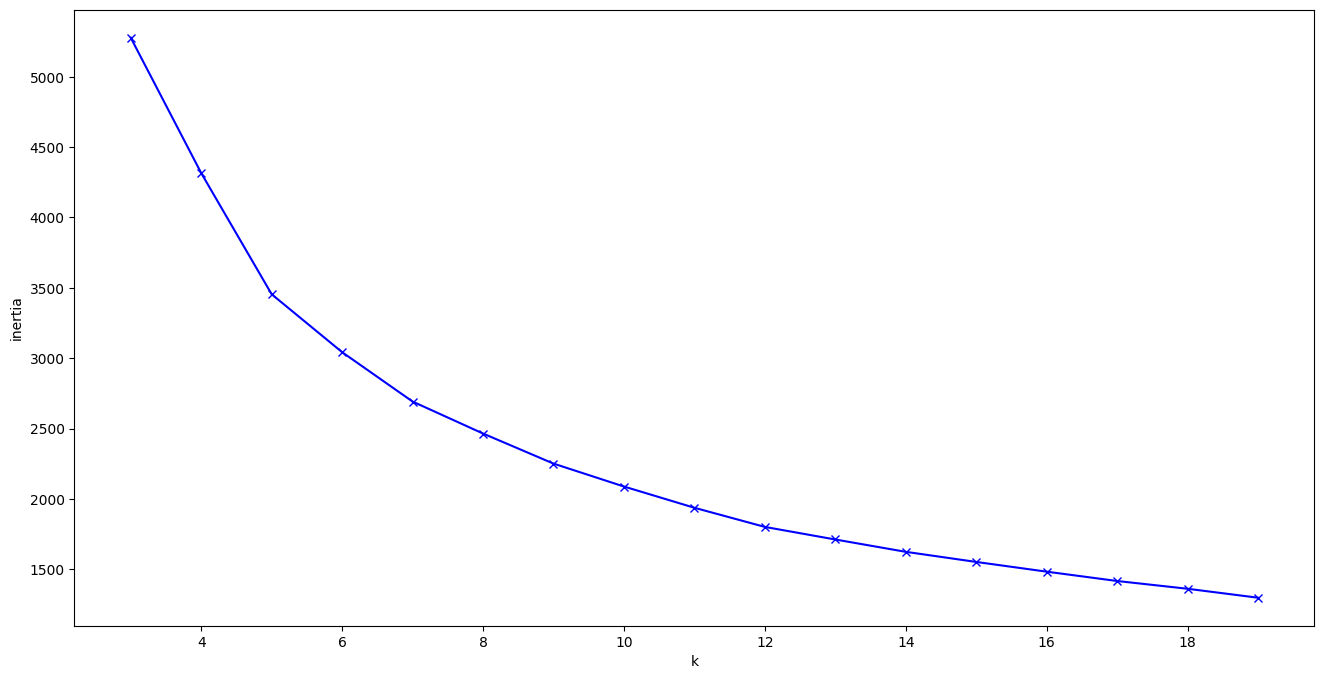

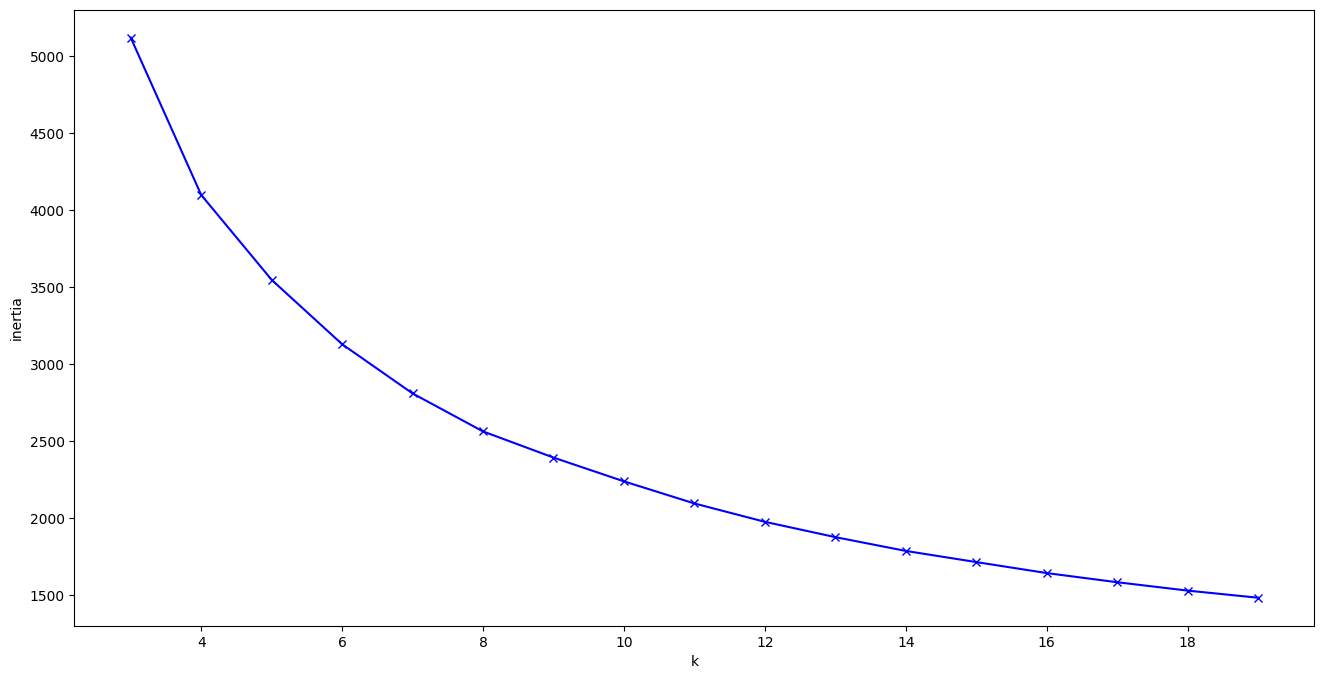

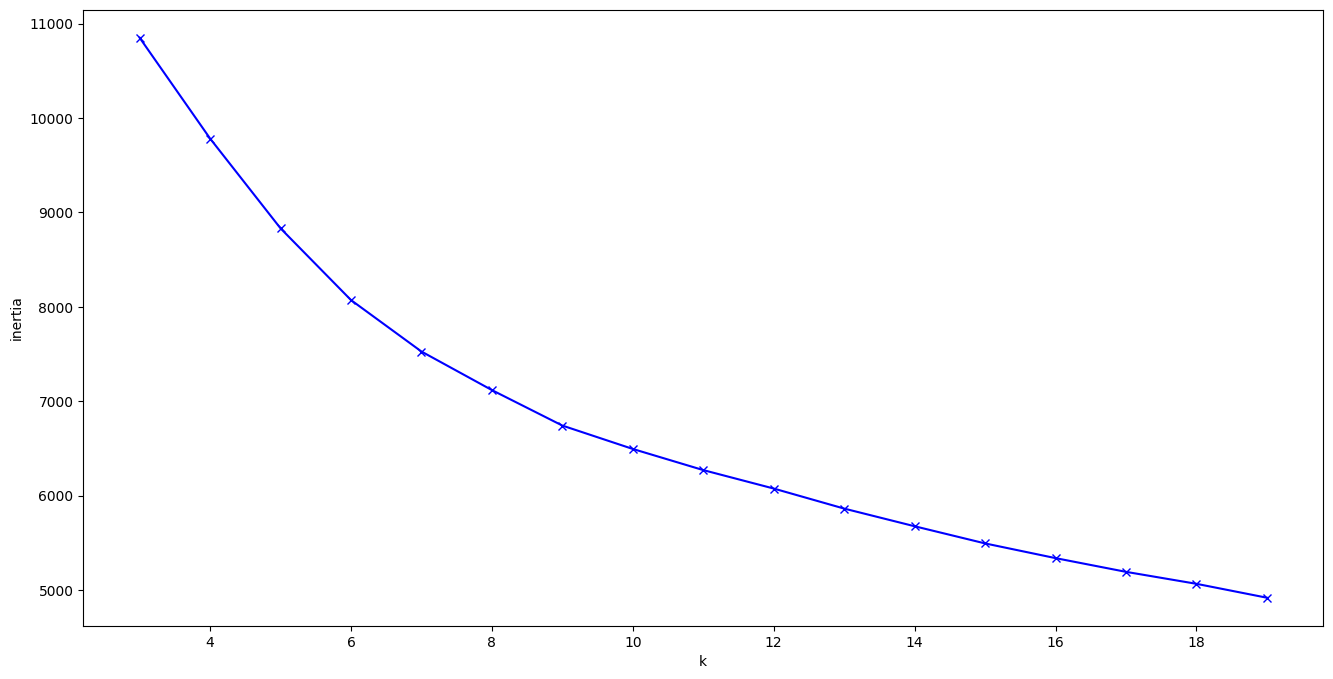

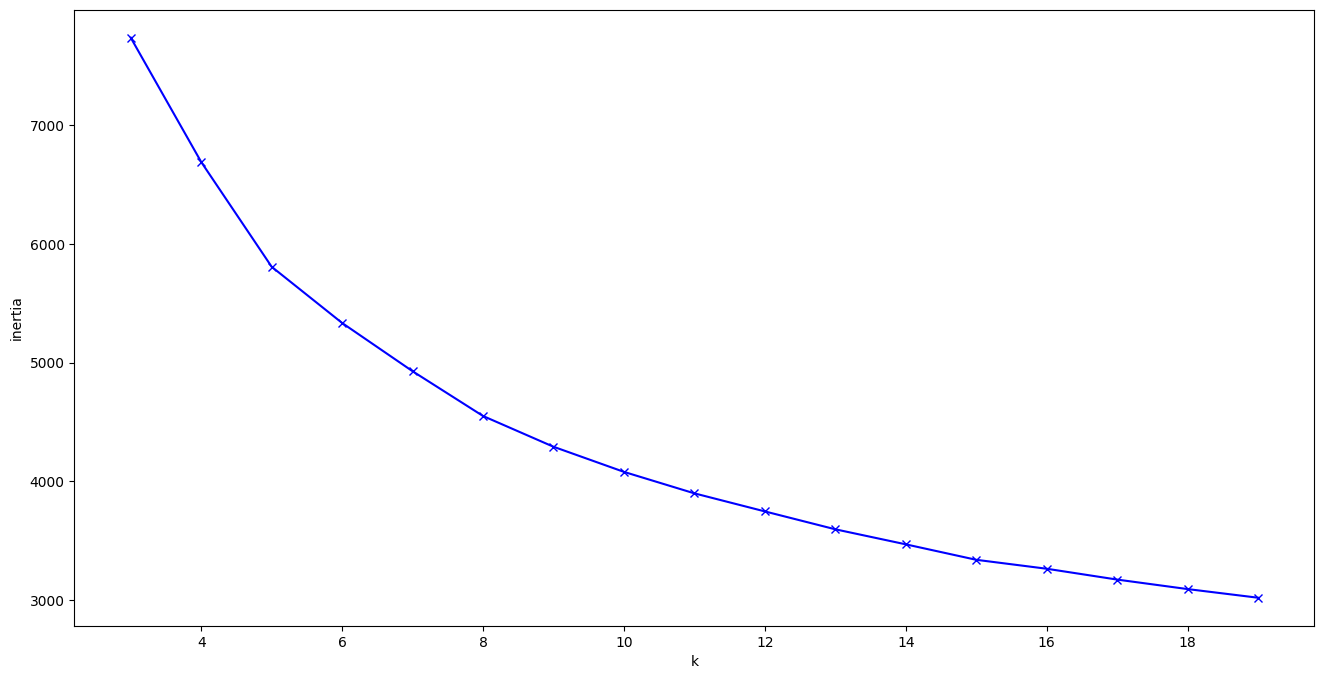

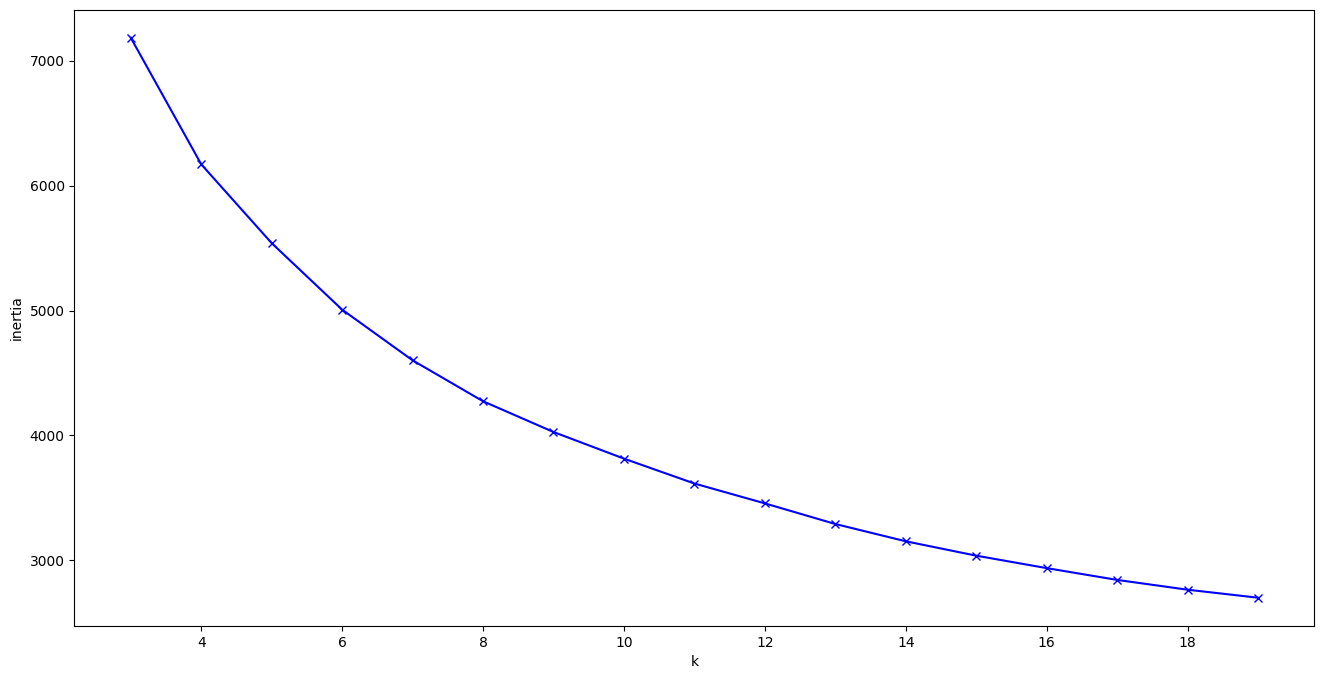

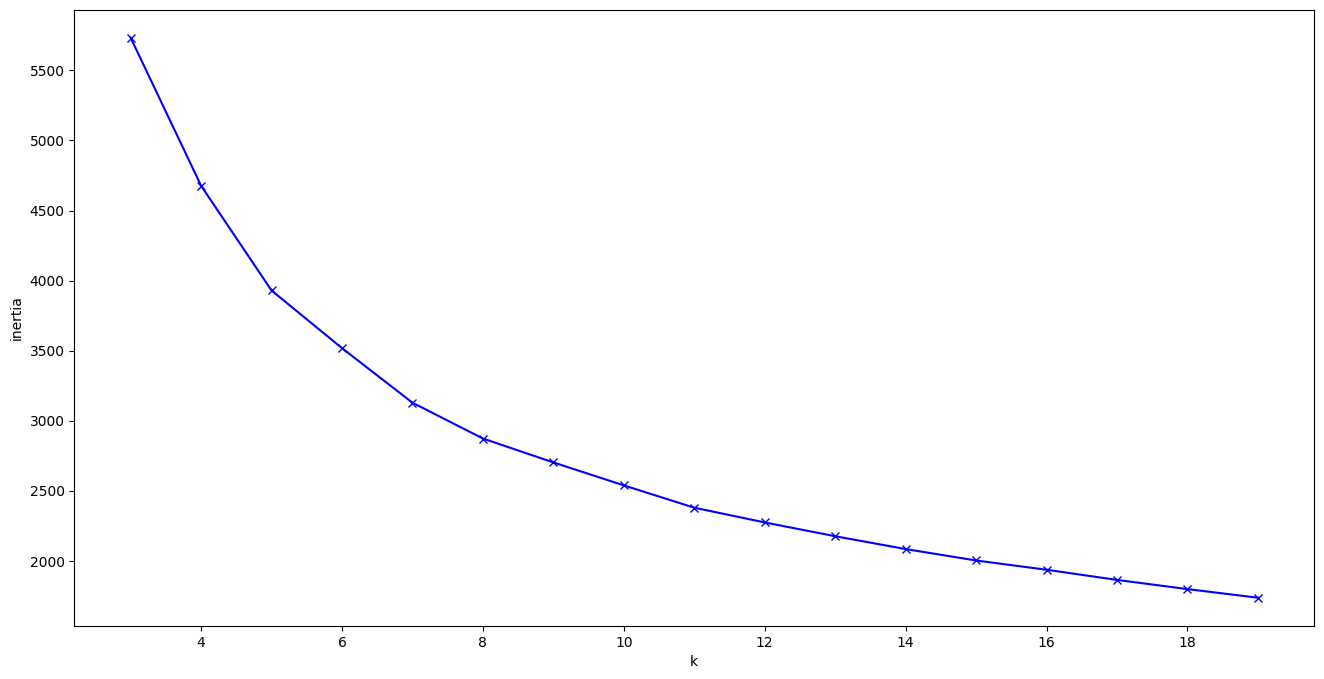

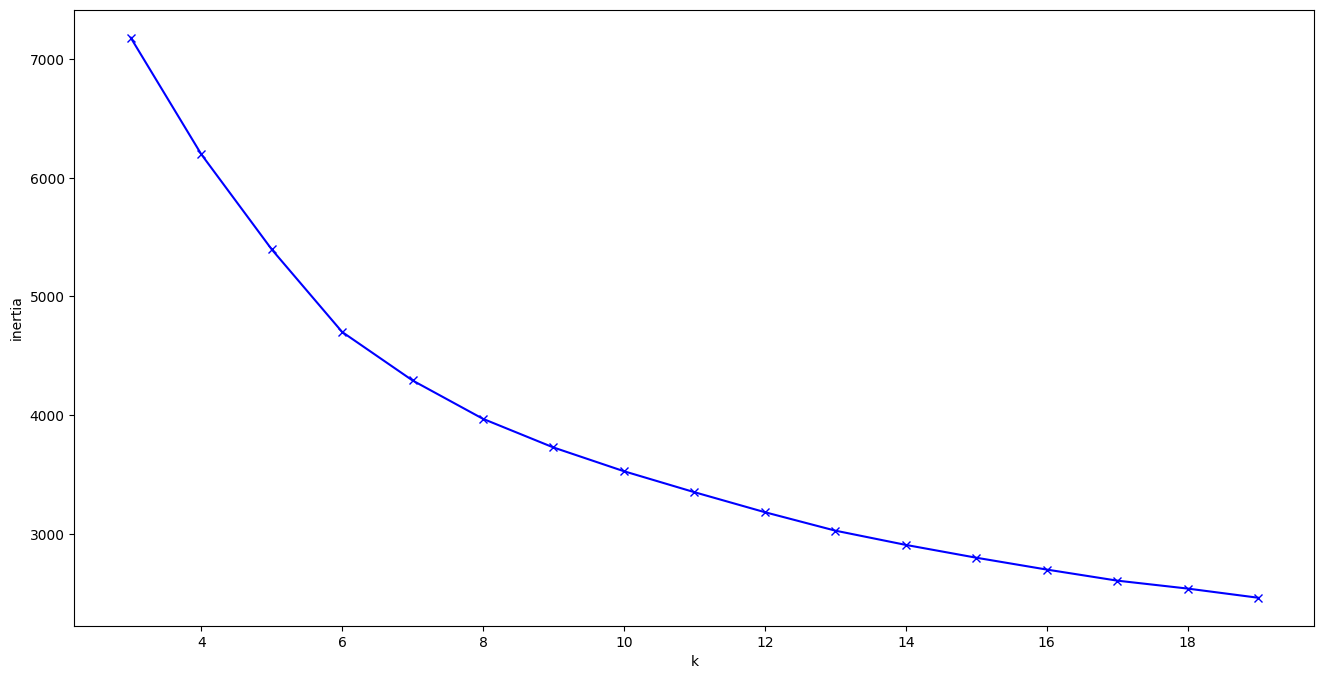

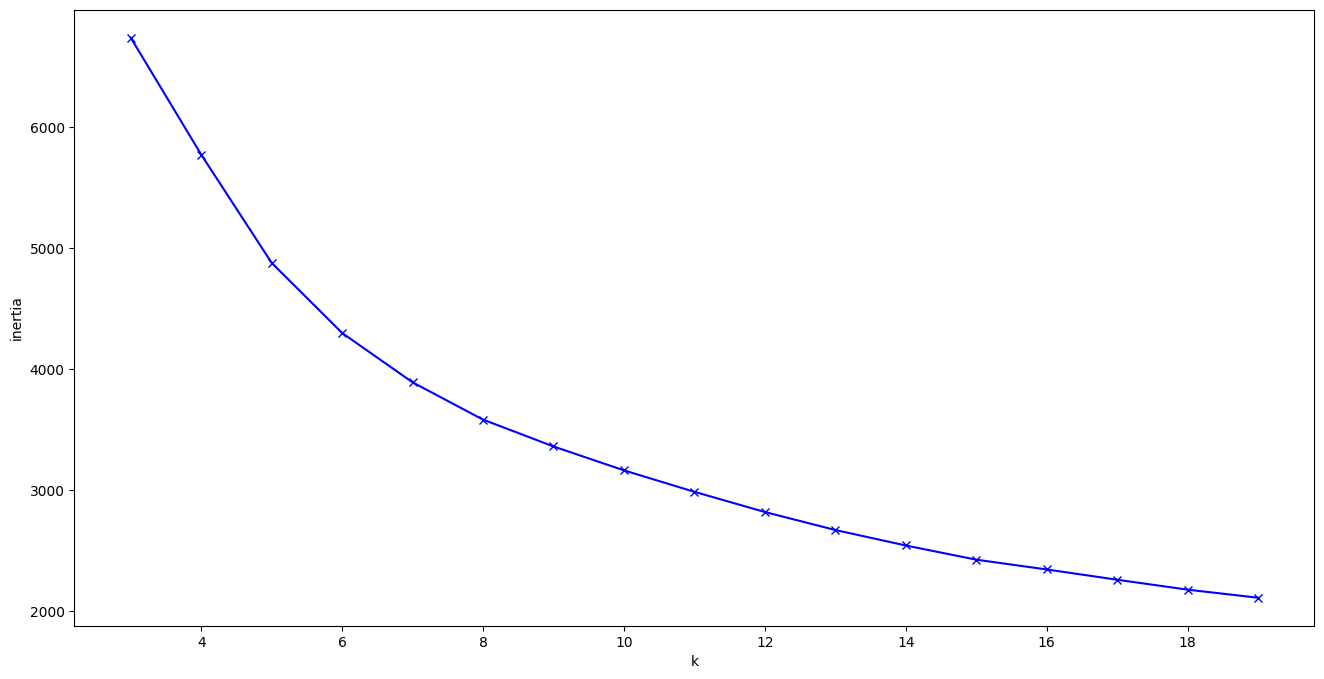

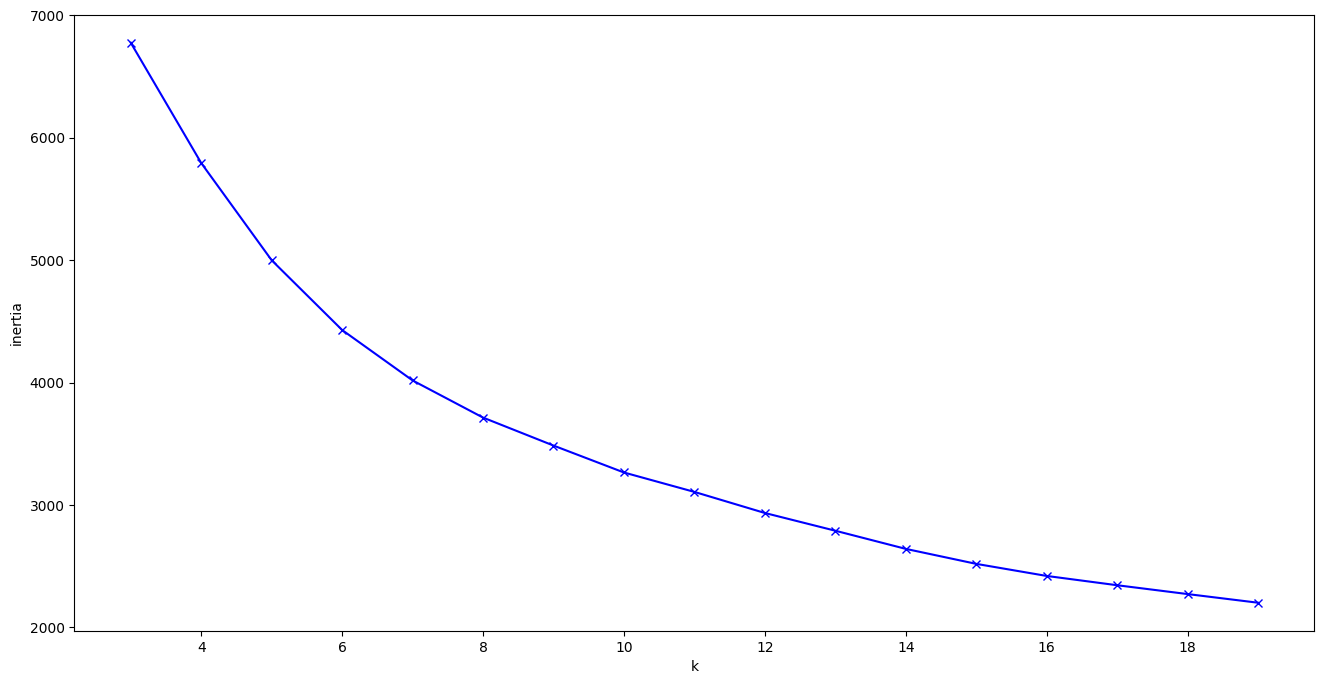

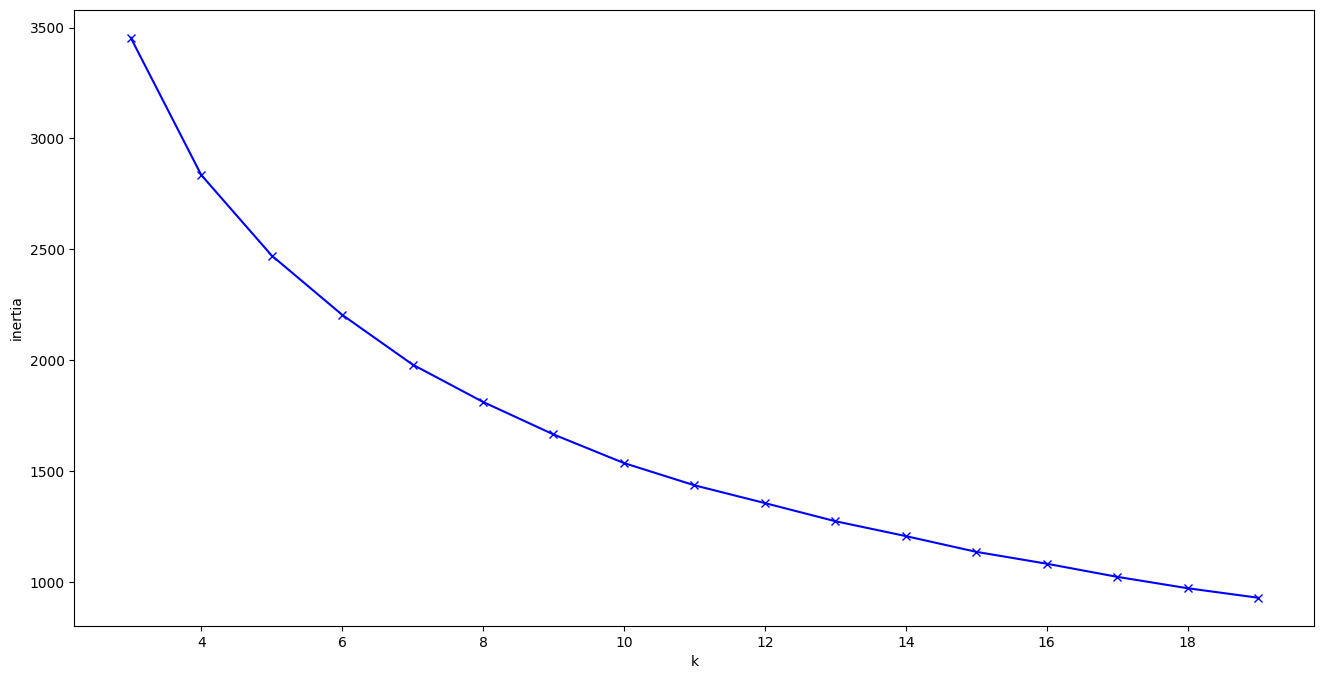

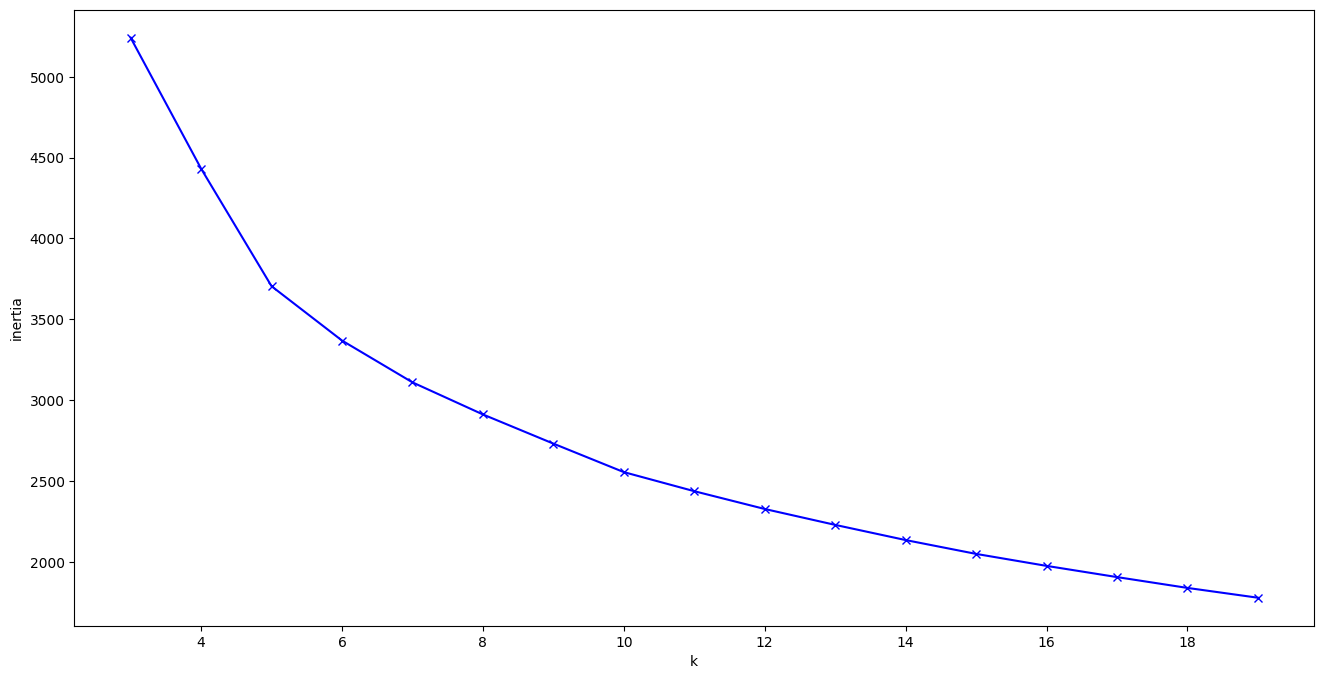

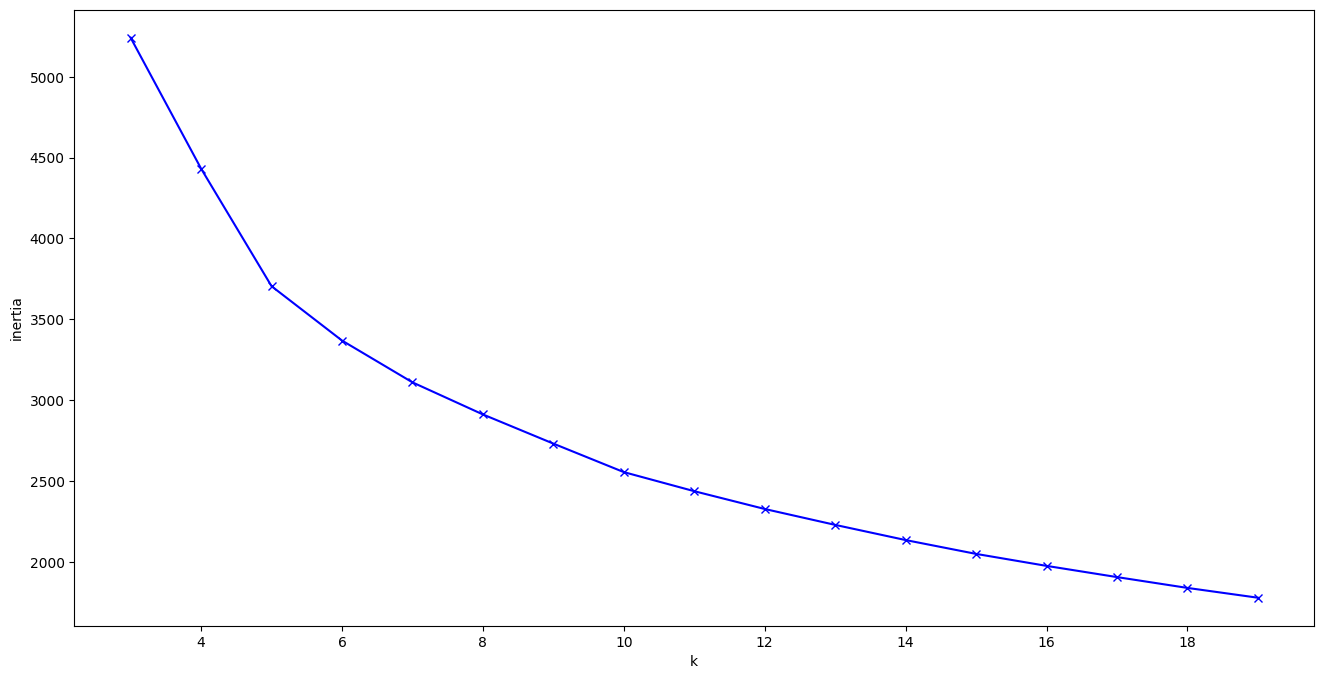

In [443]:
import time
import random

df_cluster['item'] = df_items['item']
df_cluster.set_index('item', inplace=True)

if 'cluster' in df_cluster.columns:
  df_cluster.drop(columns='cluster', inplace=True)

features_clusters = df_cluster.columns

forbidden_features = ['total_supply', 'price_mean']
basic_features = ['price_relative_std']

features_clusters = list(set(features_clusters) - set(forbidden_features))
features_clusters = list(set(features_clusters) - set(basic_features))

df_cluster_filtred = df_cluster[df_cluster['total_supply'] > 2000]

pipe_line = Pipeline([('scaler', StandardScaler())])

df_cluster_scaled_filtred = pipe_line.fit_transform(df_cluster_filtred)

n_tries = 19
set_k = range(3, 20)
dict_clustering = {}
dict_try = {}
n_inizializations = 50
full_experiment = 0


for i_try in range(n_tries):
  n_features = random.randint(3, len(features_clusters) - full_experiment)
  if (n_features == len(features_clusters) and (full_experiment == 0)) :
    full_experiment = 1
  selected_features = random.sample(list(features_clusters), n_features)
  df_cluster_reduced_filtred = df_cluster_scaled_filtred[selected_features]
  dict_clustering = {}
  inertia = 0
  for k in set_k:
    for i in range(n_inizializations):
      kmeans = KMeans(n_clusters=k, random_state=i).fit(df_cluster_reduced_filtred)
      if (i == 0 or kmeans.inertia_ < inertia):
#        print(f'best try {i}')
        inertia = kmeans.inertia_
        best_kmeans = kmeans
        dict_clustering[k] = [kmeans.inertia_, n_features, i, selected_features]

  #    dict_clustering[k] = [kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_, selected_features]
  #    dict_try[i_try] = [k, kmeans.inertia_, kmeans.score(df_cluster_scaled), kmeans.cluster_centers_, selected_features]

  dict_try[i_try] = dict_clustering

  fig = plt.figure(figsize= (16,8))
  plt.plot(set_k, [dict_clustering[k][0] for k in set_k], 'bx-')
  plt.xlabel('k')
  plt.ylabel('inertia')
  print(f'Iteracion {i_try + 1}, cantidad de features: {n_features}, features: {selected_features}')


In [444]:
df_tries = pd.DataFrame(dict_try)
df_tries.transpose()

3   \
0   [7390.085499947576, 5, 14, [Regionality, Socia...   
1   [9361.632207986295, 6, 27, [Regionality, %tren...   
2   [7297.420878002219, 5, 3, [Seasonality, %trend...   
3   [7297.420878002219, 5, 3, [Seasonality, price_...   
4   [6736.682736761327, 5, 39, [price_elasticity, ...   
5   [5277.487363375396, 4, 0, [sale_mean, Sociabil...   
6   [3454.6757554518344, 3, 35, [Sociability, sale...   
7   [5277.487363375396, 4, 0, [Seasonality, Sociab...   
8   [5118.342185032852, 4, 11, [Regionality, sale_...   
9   [10850.225355281376, 7, 33, [sale_mean, price_...   
10  [7734.755717283789, 5, 14, [price_elasticity, ...   
11  [7183.715954089971, 5, 42, [%trend_slope, sale...   
12  [5733.414007104167, 4, 26, [%trend_slope, sale...   
13  [7179.157534616058, 5, 32, [Sociability, sale_...   
14  [6736.682736761327, 5, 39, [sale_relative_std,...   
15  [6774.986364378548, 5, 30, [Seasonality, %tren...   
16  [3454.460908953283, 3, 5, [price_elasticity, S...   
17  [5241.99104870993, 4, 7, [sale_relative_std, p...   
18  [5241.99104870993, 4, 7, [sale_relative_std, S...   

                                                   4   \
0   [6431.640842077665, 5, 17, [Regionality, Socia...   
1   [8289.562265717677, 6, 20, [Regionality, %tren...   
2   [6304.610694102695, 5, 28, [Seasonality, %tren...   
3   [6304.610694102695, 5, 28, [Seasonality, price...   
4   [5770.828410679797, 5, 17, [price_elasticity, ...   
5   [4315.55518743241, 4, 47, [sale_mean, Sociabil...   
6   [2734.361149792376, 3, 15, [Sociability, sale_...   
7   [4315.55518743241, 4, 47, [Seasonality, Sociab...   
8   [4097.968648442104, 4, 0, [Regionality, sale_m...   
9   [9782.341267496691, 7, 8, [sale_mean, price_el...   
10  [6688.14074307715, 5, 8, [price_elasticity, %t...   
11  [6170.409839219091, 5, 40, [%trend_slope, sale...   
12  [4676.70054953387, 4, 47, [%trend_slope, sale_...   
13  [6198.489585551563, 5, 37, [Sociability, sale_...   
14  [5770.828410679797, 5, 17, [sale_relative_std,...   
15  [5792.524047532424, 5, 2, [Seasonality, %trend...   
16  [2835.547289973559, 3, 31, [price_elasticity, ...   
17  [4432.074482173971, 4, 8, [sale_relative_std, ...   
18  [4432.074482173971, 4, 8, [sale_relative_std, ...   

                                                   5   \
0   [5540.120890342291, 5, 25, [Regionality, Socia...   
1   [7346.640444051453, 6, 43, [Regionality, %tren...   
2   [5333.5629092688305, 5, 42, [Seasonality, %tre...   
3   [5333.5629092688305, 5, 42, [Seasonality, pric...   
4   [4876.5417567841205, 5, 12, [price_elasticity,...   
5   [3454.3322112076858, 4, 38, [sale_mean, Sociab...   
6   [2355.43904072177, 3, 4, [Sociability, sale_re...   
7   [3454.3322112076858, 4, 38, [Seasonality, Soci...   
8   [3547.0021260355707, 4, 15, [Regionality, sale...   
9   [8830.78340891504, 7, 30, [sale_mean, price_el...   
10  [5806.08045892175, 5, 7, [price_elasticity, %t...   
11  [5539.144578703173, 5, 4, [%trend_slope, sale_...   
12  [3929.1052790198273, 4, 2, [%trend_slope, sale...   
13  [5397.1689450070135, 5, 45, [Sociability, sale...   
14  [4876.5417567841205, 5, 12, [sale_relative_std...   
15  [4998.2695173278125, 5, 17, [Seasonality, %tre...   
16  [2472.0275141237166, 3, 33, [price_elasticity,...   
17  [3704.649955383616, 4, 3, [sale_relative_std, ...   
18  [3704.649955383616, 4, 3, [sale_relative_std, ...   

                                                   6   \
0   [5063.507127604709, 5, 9, [Regionality, Sociab...   
1   [6530.983290444296, 6, 45, [Regionality, %tren...   
2   [4781.949937214758, 5, 35, [Seasonality, %tren...   
3   [4781.9499372147575, 5, 35, [Seasonality, pric...   
4   [4297.558490910632, 5, 7, [price_elasticity, s...   
5   [3042.7713675557156, 4, 43, [sale_mean, Sociab...   
6   [2118.4482605560966, 3, 4, [Sociability, sale_...   
7   [3042.7713675557156, 4, 43, [Seasonality, Soci...   
8   [3129.413003887372, 4, 8, [Regionality, sale_m...   
9   [8071.2454339823835, 7, 2, [sale_mean, price_e...   
1

In [446]:
dict_try[9][9]

[6741.873535684254,
 7,
 14,
 ['sale_mean',
  'price_elasticity',
  'sale_relative_std',
  'Regionality',
  'Seasonality',
  'Sociability',
  '%trend_slope']]

In [449]:
# Examinamos un cluster particular

set_features_selected =       ['sale_mean',
  'price_elasticity',
  'sale_relative_std',
  'Regionality',
  'Seasonality',
  'Sociability',
  '%trend_slope']

k_selected = 9
seed = 14

print(set_features_selected)


df_cluster_filtered = df_cluster[df_cluster['total_supply'] > 2000]

pipe_line = Pipeline([('scaler', StandardScaler())])

df_cluster_scaled_filtered = pipe_line.fit_transform(df_cluster_filtered)


df_cluster_selected_filtered = df_cluster_scaled_filtered[set_features_selected]
kmeans = KMeans(n_clusters=k_selected, random_state=seed).fit(df_cluster_selected_filtered)

df_cluster_filtered['cluster'] = kmeans.labels_
df_cluster_filtered.reset_index(inplace=True)
df_cluster_filtered.groupby('cluster').agg({'item': 'count', 'sale_mean': 'mean', 'sale_relative_std': 'mean', 'price_mean': 'mean', 'price_relative_std': 'mean', 'total_supply': 'mean', 'Regionality': 'mean', 'Seasonality': 'mean', 'Sociability': 'mean', '%trend_slope': 'mean', 'price_elasticity': 'mean' })


['sale_mean', 'price_elasticity', 'sale_relative_std', 'Regionality', 'Seasonality', 'Sociability', '%trend_slope']


/tmp/ipython-input-3582471403.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_filtered['cluster'] = kmeans.labels_


item   sale_mean  sale_relative_std  price_mean  price_relative_std  \
cluster                                                                        
0         145    5.000311           1.539097    6.265406            0.060099   
1         376    7.467596           1.079602    6.552987            0.045613   
2         263    3.255706           1.277667    5.858048            0.047672   
3          78   69.167548           0.902047    1.644879            0.049199   
4         293    9.445660           0.935487    5.564871            0.059676   
5         576    8.915448           0.832090    5.270812            0.035055   
6         114   11.995533           1.169673    3.193167            0.067846   
7         226    4.539451           1.358674    5.949232            0.045880   
8           4  266.967473           0.746343    1.819645            0.053108   

         total_supply  Regionality  Seasonality  Sociability  %trend_slope  \
cluster                                                                      
0         2624.889655     0.235307     0.314980     1.731034     -0.056252   
1         2621.329787     0.371786     0.071377     1.045213     -0.028798   
2         2477.673004     0.171950     0.095096     0.638783      0.247408   
3         2626.320513     0.181542     0.086028     2.474359     -0.093555   
4         2651.218430     0.211700     0.073069     1.392491     -0.165802   
5         2592.055556     0.161632     0.059466     0.836806     -0.048069   
6         2666.008772     0.217743     0.105682    10.394737     -0.131410   
7         2600.654867     0.236949     0.117835     0.796460     -0.330886   
8         2790.000000     0.311767     0.065391     4.000000     -0.083841   

         price_elasticity  
cluster                    
0               -0.026140  
1                0.013373  
2               -0.002261  
3               -0.059975  
4               -0.270418  
5                0.004783  
6               -0.132424  
7               -0.048636  
8               -0.027576

In [448]:
df_cluster.reset_index(inplace=True)
df_cluster['item'] = df_items['item']
df_cluster.set_index('item', inplace=True)